# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan 
**JAYA JAYA INSTITUTE**

- Nama: ANDRI PATRIANTO

# Cakupan Proyek

1. *Business Understanding*: Mengidentifikasi tujuan proyek, menentukan pertanyaan bisnis yang harus dijawab, dan menyusun rencana proyek.

2. *Data Understanding*: 

    * Mengumpulkan data mahasiswa yang tersedia, termasuk data demografis, akademis, dan faktor-faktor lainnya. 

    * Melakukan analisis awal untuk memahami struktur data, mengidentifikasi pola dan distribusi, serta menemukan anomali dan *outliers*.

    * Mengecek kualitas data dengan mengidentifikasi *missing values*, data yang tidak valid, dan inkonsistensi.

3. *Data Preparation*

    * Membersihkan data dengan menangani *missing values*, mengoreksi data yang tidak valid, dan mengatasi inkonsistensi.

    * Melakukan transformasi data yang diperlukan, seperti *encoding* variabel kategorikal dan normalisasi fitur numerik.

    * Menyusun dataset yang akan digunakan untuk pemodelan dengan memilih fitur-fitur yang relevan dan membagi data menjadi set pelatihan dan pengujian.

4. *Modeling*

    * Memilih algoritma *machine learning* yang sesuai untuk masalah prediksi *dropout*, seperti *Logistic Regression*, *Decision Tree*, *Random Forest*, dan *Gradient Boosting*.

    * Mengevaluasi performa masing-masing model menggunakan data pengujian dengan metrik seperti *accuracy*, *precision*, *recall*, dan *F1 score*.

5. *Evaluation*

    * Menilai hasil dari model yang telah dibangun untuk memastikan bahwa model memenuhi tujuan bisnis dan memberikan prediksi yang akurat.

6. *Deployment*

    * Mengimplementasikan model terbaik ke dalam bentuk *prototype* yang dibuat menggunakan Streamlit untuk sistem deteksi dini yang dapat digunakan oleh Jaya Jaya Institut untuk mendeteksi mahasiswa yang berisiko tinggi *dropout*.

    * Mengembangkan *dashboard* interaktif menggunakan Tableau untuk membantu Jaya Jaya Institut dalam memantau performa mahasiswa, memahami data demografis dan akademis, serta memonitor *dropout*.

# **1. BUSINESS UNDERSTANDING**

## **1.1 Latar Belakang Bisnis**

Jaya Jaya Institut adalah sebuah institusi pendidikan yang telah berdiri sejak tahun 2000 yang telah banyak mencetak lulusan berprestasi dengan reputasi yang gemilang. Namun, di balik semua kesuksesan itu, ada satu masalah besar yang terus menghantui, yaitu tingginya angka *dropout* atau mahasiswa yang tidak menyelesaikan pendidikannya. Masalah ini tidak hanya berdampak pada reputasi institusi, tetapi juga merugikan para mahasiswa yang kehilangan kesempatan untuk meraih masa depan yang lebih baik.

## **1.2 Permasalahan Bisnis**

1. **Tingginya Angka Dropout**: Banyak mahasiswa yang tidak menyelesaikan pendidikan mereka. Hal ini bisa disebabkan oleh berbagai faktor seperti masalah akademis, finansial, atau personal.

2. **Minimnya Deteksi Dini**: Saat ini, institusi belum memiliki sistem yang efektif untuk mendeteksi mahasiswa yang berisiko dropout sejak dini. Tanpa deteksi dini, sulit untuk memberikan intervensi yang tepat waktu dan efektif.

3. **Kurangnya Intervensi yang Tepat**: Karena tidak ada sistem deteksi dini, intervensi yang diberikan seringkali terlambat atau tidak sesuai dengan kebutuhan mahasiswa, sehingga tidak berhasil menurunkan angka dropout.

# **2. LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import joblib
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer, Rotator

# **3. DATA UNDERSTANDING**

In [2]:
df = pd.read_csv("data.csv", sep=";")

df

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                            122.0            1                     19   
1                            160.0            1                      1   
2                            122.0            1                     37   
3                            122.0            1                     38   
4                            100.0            1                     37   
...                            ...          ...                    ...   
4419                         125.0            1                      1   
4420                         120.0          105                      1   
4421                         154.0            1                     37   
4422                         180.0            1                     37   
4423                         152.0           22                     38   

      Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                        12  ...                                  0   
1                         3  ...                                  0   
2                        37  ...                                  0   
3                        37  ...                                  0   
4                        38  ...                                  0   
...                     ...  ...                                ...   
4419                      1  ...                                  0   
4420                      1  ...                                  0   
4421                     37  ...                                  0   
4422                     37  ...                                  0   
4423                     37  ...                                  0   

      Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                     0                                     0   
1                                     6                                     6   
2                                     6                                     0   
3                                     6                                    10   
4                                     6                                     6   
...                                 ...                                   ...   
4419                                  6                                     8   
4420                                  6                           

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Diketahui pada informasi dataset di atas bahwa tidak ada *missing value* pada dataset tersebut sehingga tidak perlu dilakukan *handling missing values*.

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) | 


In [4]:
marital_status_dict = {'Single': 1, 'Married': 2, 'Widower': 3, 'Divorced': 4, 'Facto Union': 5, 'Legally Separated': 6}
application_mode_dict = {
    '1st phase - general contingent': 1, 'Ordinance No. 612/93': 2, '1st phase - special contingent (Azores Island)': 5, 
    'Holders of other higher courses': 7, 'Ordinance No. 854-B/99': 10, 'International student (bachelor)': 15, 
    '1st phase - special contingent (Madeira Island)': 16, '2nd phase - general contingent': 17, 
    '3rd phase - general contingent': 18, 'Ordinance No. 533-A/99, item b2) (Different Plan)': 26, 
    'Ordinance No. 533-A/99, item b3 (Other Institution)': 27, 'Over 23 years old': 39, 'Transfer': 42, 
    'Change of course': 43, 'Technological specialization diploma holders': 44, 'Change of institution/course': 51, 
    'Short cycle diploma holders': 53, 'Change of institution/course (International)': 57
}
course_dict = {
    'Biofuel Production Technologies': 33, 'Animation and Multimedia Design': 171, 'Social Service (evening attendance)': 8014, 
    'Agronomy': 9003, 'Communication Design': 9070, 'Veterinary Nursing': 9085, 'Informatics Engineering': 9119, 
    'Equinculture': 9130, 'Management': 9147, 'Social Service': 9238, 'Tourism': 9254, 'Nursing': 9500, 
    'Oral Hygiene': 9556, 'Advertising and Marketing Management': 9670, 'Journalism and Communication': 9773, 
    'Basic Education': 9853, 'Management (evening attendance)': 9991
}
daytime_evening_attendance_dict = {'Daytime': 1, 'Evening': 0}
previous_qualification_dict = {
    'Secondary education': 1, 'Higher education - bachelor\'s degree': 2, 'Higher education - degree': 3, 
    'Higher education - master\'s': 4, 'Higher education - doctorate': 5, 'Frequency of higher education': 6, 
    '12th year of schooling - not completed': 9, '11th year of schooling - not completed': 10, 
    'Other - 11th year of schooling': 12, '10th year of schooling': 14, '10th year of schooling - not completed': 15, 
    'Basic education 3rd cycle (9th/10th/11th year) or equiv.': 19, 'Basic education 2nd cycle (6th/7th/8th year) or equiv.': 38, 
    'Technological specialization course': 39, 'Higher education - degree (1st cycle)': 40, 
    'Professional higher technical course': 42, 'Higher education - master (2nd cycle)': 43
}
nacionality_dict = {
    'Portuguese': 1, 'German': 2, 'Spanish': 6, 'Italian': 11, 'Dutch': 13, 'English': 14, 'Lithuanian': 17, 
    'Angolan': 21, 'Cape Verdean': 22, 'Guinean': 24, 'Mozambican': 25, 'Santomean': 26, 'Turkish': 32, 'Brazilian': 41, 
    'Romanian': 62, 'Moldova (Republic of)': 100, 'Mexican': 101, 'Ukrainian': 103, 'Russian': 105, 'Cuban': 108, 
    'Colombian': 109
}
mothers_qualification_dict = {
    'Secondary Education - 12th Year of Schooling or Eq.': 1, 'Higher Education - Bachelor\'s Degree': 2, 
    'Higher Education - Degree': 3, 'Higher Education - Master\'s': 4, 'Higher Education - Doctorate': 5, 
    'Frequency of Higher Education': 6, '12th Year of Schooling - Not Completed': 9, 
    '11th Year of Schooling - Not Completed': 10, '7th Year (Old)': 11, 'Other - 11th Year of Schooling': 12, 
    '10th Year of Schooling': 14, 'General commerce course': 18, 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.': 19, 
    'Technical-professional course': 22, '7th year of schooling': 26, '2nd cycle of the general high school course': 27, 
    '9th Year of Schooling - Not Completed': 29, '8th year of schooling': 30, 'Unknown': 34, 'Can\'t read or write': 35, 
    'Can read without having a 4th year of schooling': 36, 'Basic education 1st cycle (4th/5th year) or equiv.': 37, 
    'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.': 38, 'Technological specialization course': 39, 
    'Higher education - degree (1st cycle)': 40, 'Specialized higher studies course': 41, 
    'Professional higher technical course': 42, 'Higher Education - Master (2nd cycle)': 43, 
    'Higher Education - Doctorate (3rd cycle)': 44
}
fathers_qualification_dict = {
    'Secondary Education - 12th Year of Schooling or Eq.': 1, 
    'Higher Education - Bachelor\'s Degree': 2, 
    'Higher Education - Degree': 3, 
    'Higher Education - Master\'s': 4, 
    'Higher Education - Doctorate': 5, 
    'Frequency of Higher Education': 6, 
    '12th Year of Schooling - Not Completed': 9, 
    '11th Year of Schooling - Not Completed': 10, 
    '7th Year (Old)': 11, 
    'Other - 11th Year of Schooling': 12, 
    '2nd year complementary high school course': 13,
    '10th Year of Schooling': 14, 
    'General commerce course': 18, 
    'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.': 19, 
    'Complementary High School Course': 20, 
    'Technical-professional course': 22, 
    'Complementary High School Course - not concluded': 25, 
    '7th year of schooling': 26, 
    '2nd cycle of the general high school course': 27, 
    '9th Year of Schooling - Not Completed': 29, 
    '8th year of schooling': 30, 
    'General Course of Administration and Commerce': 31, 
    'Supplementary Accounting and Administration': 33, 
    'Unknown': 34, 
    'Can\'t read or write': 35, 
    'Can read without having a 4th year of schooling': 36, 
    'Basic education 1st cycle (4th/5th year) or equiv.': 37, 
    'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.': 38, 
    'Technological specialization course': 39, 
    'Higher education - degree (1st cycle)': 40, 
    'Specialized higher studies course': 41, 
    'Professional higher technical course': 42, 
    'Higher Education - Master (2nd cycle)': 43, 
    'Higher Education - Doctorate (3rd cycle)': 44
}
mothers_occupation_dict = {
    'Student': 0, 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers': 1, 
    'Specialists in Intellectual and Scientific Activities': 2, 'Intermediate Level Technicians and Professions': 3, 
    'Administrative staff': 4, 'Personal Services, Security and Safety Workers and Sellers': 5, 
    'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry': 6, 'Skilled Workers in Industry, Construction and Craftsmen': 7, 
    'Installation and Machine Operators and Assembly Workers': 8, 'Unskilled Workers': 9, 'Armed Forces Professions': 10, 
    'Other Situation': 90, '(blank)': 99, 'Health professionals': 122, 'teachers': 123, 
    'Specialists in information and communication technologies (ICT)': 125, 
    'Intermediate level science and engineering technicians and professions': 131, 
    'Technicians and professionals, of intermediate level of health': 132, 
    'Intermediate level technicians from legal, social, sports, cultural and similar services': 134, 
    'Office workers, secretaries in general and data processing operators': 141, 
    'Data, accounting, statistical, financial services and registry-related operators': 143, 
    'Other administrative support staff': 144, 
    'personal service workers': 151, 'sellers': 152, 
    'Personal care workers and the like': 153, 
    'Skilled construction workers and the like, except electricians': 171, 
    'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like': 173, 
    'Workers in food processing, woodworking, clothing and other industries and crafts': 175, 
    'cleaning workers': 191, 
    'Unskilled workers in agriculture, animal production, fisheries and forestry': 192, 
    'Unskilled workers in extractive industry, construction, manufacturing and transport': 193, 
    'Meal preparation assistants': 194
}
fathers_occupation_dict = {
    'Student': 0, 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers': 1, 
    'Specialists in Intellectual and Scientific Activities': 2, 'Intermediate Level Technicians and Professions': 3, 
    'Administrative staff': 4, 'Personal Services, Security and Safety Workers and Sellers': 5, 
    'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry': 6, 'Skilled Workers in Industry, Construction and Craftsmen': 7, 
    'Installation and Machine Operators and Assembly Workers': 8, 'Unskilled Workers': 9, 'Armed Forces Professions': 10, 
    'Other Situation': 90, '(blank)': 99, 'Armed Forces Officers': 101, 'Armed Forces Sergeants': 102, 'Other Armed Forces personnel': 103, 
    'Directors of administrative and commercial services': 112, 'Hotel, catering, trade and other services directors': 114, 
    'Specialists in the physical sciences, mathematics, engineering and related techniques': 121, 
    'Health professionals': 122, 'teachers': 123, 'Specialists in finance, accounting, administrative organization, public and commercial relations': 124, 
    'Intermediate level science and engineering technicians and professions': 131, 
    'Technicians and professionals, of intermediate level of health': 132, 
    'Intermediate level technicians from legal, social, sports, cultural and similar services': 134, 
    'Information and communication technology technicians': 135, 
    'Office workers, secretaries in general and data processing operators': 141, 
    'Data, accounting, statistical, financial services and registry-related operators': 143, 'Other administrative support staff': 144, 
    'personal service workers': 151, 'sellers': 152, 'Personal care workers and the like': 153, 
    'Protection and security services personnel': 154, 
    'Market-oriented farmers and skilled agricultural and animal production workers': 161, 
    'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence': 163, 
    'Skilled construction workers and the like, except electricians': 171, 'Skilled workers in metallurgy, metalworking and similar': 172, 
    'Skilled workers in electricity and electronics': 174, 'Workers in food processing, woodworking, clothing and other industries and crafts': 175, 
    'Fixed plant and machine operators': 181, 'assembly workers': 182, 'Vehicle drivers and mobile equipment operators': 183, 
    'Unskilled workers in agriculture, animal production, fisheries and forestry': 192, 
    'Unskilled workers in extractive industry, construction, manufacturing and transport': 193, 
    'Meal preparation assistants': 194, 'Street vendors (except food) and street service providers': 195
}
displaced_dict = {'Yes': 1, 'No': 0}
educational_special_needs_dict = {'Yes': 1, 'No': 0}
debtor_dict = {'Yes': 1, 'No': 0}
tuition_fees_up_to_date_dict = {'Yes': 1, 'No': 0}
gender_dict = {'Male': 1, 'Female': 0}
scholarship_holder = {'Yes': 1, 'No': 0}
international_dict = {'Yes': 1, 'No': 0}
combined_dict = {
    'Marital_status': marital_status_dict,
    'Application_mode': application_mode_dict,
    'Course': course_dict,
    'Previous_qualification': previous_qualification_dict,
    'Nacionality': nacionality_dict,
    'Mothers_qualification': mothers_qualification_dict,
    'Fathers_qualification': fathers_qualification_dict,
    'Mothers_occupation': mothers_occupation_dict,
    'Fathers_occupation': fathers_occupation_dict,
    'Daytime_evening_attendance': daytime_evening_attendance_dict,
    'Displaced': displaced_dict,
    'Educational_special_needs': educational_special_needs_dict,
    'Debtor': debtor_dict,
    'Tuition_fees_up_to_date': tuition_fees_up_to_date_dict,
    'Gender': gender_dict,
    'Scholarship_holder': scholarship_holder,
    'International': international_dict
}

def replace_values(df, column_name, replacement_dict):
    inverse_dict = {v: k for k, v in replacement_dict.items()}
    df[column_name] = df[column_name].map(inverse_dict)
    return df

modified_df = df.copy()

for column, replacement_dict in combined_dict.items():
    if column in modified_df.columns:
        modified_df = replace_values(modified_df, column, replacement_dict)

modified_df.to_csv("modified_data.csv", index=False)

In [5]:
modified_df

Marital_status                  Application_mode  Application_order  \
0            Single    2nd phase - general contingent                  5   
1            Single  International student (bachelor)                  1   
2            Single    1st phase - general contingent                  5   
3            Single    2nd phase - general contingent                  2   
4           Married                 Over 23 years old                  1   
...             ...                               ...                ...   
4419         Single    1st phase - general contingent                  6   
4420         Single    1st phase - general contingent                  2   
4421         Single    1st phase - general contingent                  1   
4422         Single    1st phase - general contingent                  1   
4423         Single            Ordinance No. 854-B/99                  1   

                                   Course Daytime_evening_attendance  \
0         Animation and Multimedia Design                    Daytime   
1                                 Tourism                    Daytime   
2                    Communication Design                    Daytime   
3            Journalism and Communication                    Daytime   
4     Social Service (evening attendance)                    Evening   
...                                   ...                        ...   
4419         Journalism and Communication                    Daytime   
4420         Journalism and Communication                    Daytime   
4421                              Nursing                    Daytime   
4422                           Management                    Daytime   
4423         Journalism and Communication                    Daytime   

     Previous_qualification  Previous_qualification_grade   Nacionality  \
0       Secondary education                         122.0    Portuguese   
1       Secondary education                         160.0    Portuguese   
2       Secondary education                         122.0    Portuguese   
3       Secondary education                         122.0    Portuguese   
4       Secondary education                         100.0    Portuguese   
...                     ...                           ...           ...   
4419    Secondary education                         125.0    Portuguese   
4420    Secondary education                         120.0       Russian   
4421    Secondary education                         154.0    Portuguese   
4422    Secondary education                         180.0    Portuguese   
4423    Secondary education                         152.0  Cape Verdean   

                                  Mothers_qualification  \
0     Basic Education 3rd Cycle (9th/10th/11th Year)...   
1     Secondary Education - 12th Year of Schooling o...   
2     Basic education 1st cycle (4th/5th year) or eq...   
3     Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4     Basic education 1st cycle (4th/5th year) or eq...   
...                                                 ...   
4419  Secondary Education - 12th Year of Schooling o...   
4420  Secondary Education - 12th Year of Schooling o...   
4421  Basic education 1st cycle (4th/5th year) or eq...   
4422  Basic education 1st cycle (4th/5th year) or eq...   
4423  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                  Fathers_qualification  ...  \
0                        Other - 11th Year of Schooling  ...   
1                             Higher Education - Degree  ...   
2     Basic education 1st cycle (4th/5th year) or eq...  ...   
3     Basic education 1st cycle (4th/5th year) or eq...  ...   
4     Basic Education 2nd Cycle (6th/7th/8th Year) o...  ...   
...                                                 ...  ...   
4419  Secondary Education - 12th Year of Schooling o...  ...   
4420  Secondary Education - 12th Year of Schooling o...  ...   
4421  Basic education 1st cycle (4th/5th 

In [6]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

Diketahui bahwa tidak ada *missing values* pada dataset ini berdasarkan informasi dataset di atas, sehingga tidak perlu dilakukan *handling missing values*.

In [7]:
modified_df.describe(include='all')

Marital_status                Application_mode  Application_order  \
count            4424                            4424        4424.000000   
unique              6                              18                NaN   
top            Single  1st phase - general contingent                NaN   
freq             3919                            1708                NaN   
mean              NaN                             NaN           1.727848   
std               NaN                             NaN           1.313793   
min               NaN                             NaN           0.000000   
25%               NaN                             NaN           1.000000   
50%               NaN                             NaN           1.000000   
75%               NaN                             NaN           2.000000   
max               NaN                             NaN           9.000000   

         Course Daytime_evening_attendance Previous_qualification  \
count      4424                       4424                   4424   
unique       17                          2                     17   
top     Nursing                    Daytime    Secondary education   
freq        766                       3941                   3717   
mean        NaN                        NaN                    NaN   
std         NaN                        NaN                    NaN   
min         NaN                        NaN                    NaN   
25%         NaN                        NaN                    NaN   
50%         NaN                        NaN                    NaN   
75%         NaN                        NaN                    NaN   
max         NaN                        NaN                    NaN   

        Previous_qualification_grade Nacionality  \
count                    4424.000000        4424   
unique                           NaN          21   
top                              NaN  Portuguese   
freq                             NaN        4314   
mean                      132.613314         NaN   
std                        13.188332         NaN   
min                        95.000000         NaN   
25%                       125.000000         NaN   
50%                       133.100000         NaN   
75%                       140.000000         NaN   
max                       190.000000         NaN   

                                    Mothers_qualification  \
count                                                4424   
unique                                                 29   
top     Secondary Education - 12th Year of Schooling o...   
freq                                                 1069   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    Fathers_qualification  ...  \
count                                                4424  ...   
unique                                                 34  ...   
top     Basic education 1st cycle (4th/5th year) or eq...  ...   
freq                                                 1209  ...   
mean                                                  NaN  ...   
std                                                   NaN  ...   
min                                                   NaN  ...   
25%                                                   NaN  ...   
50%                                                   NaN  ...   
75%                                                   NaN  ...   
max                                                   NaN  ...   

       Curricular_units_2nd_sem_credited Curricular_units_2nd_sem_enrolled  \
count                        4424.00

* **Marital_status**: Mayoritas mahasiswa masih single.

* **Application_mode** dan **Application_order**: Kebanyakan mahasiswa berasal dari 1st phase - general contingent dan urutan aplikasi mahasiswa bervariasi.

* **Course**: Data menunjukkan mahasiswa lebih banyak mengambil course Nurse.

* **Daytime_evening_attendance**: Mayoritas mahasiswa adalah mahasiswa pagi.

* **Previous_qualification**: Kebanyakan mahasiswa adalah Secondary education yang menunjukkan kualifikasi sebelumnya dari mahasiswa tersebut.

* **Previous_qualification_grade**: Rata-rata nilai kualifikasi sebelumnya adalah 150.

* **Nacionality**: Kebanyakan mahasiswa berasal dari negara Portugal.

* **Parents' qualifications and occupations**: Terdapat variasi dalam kualifikasi dan pekerjaan orang tua mahasiswa.

* **Admission_grade**: Nilai rata-rata penerimaan adalah sekitar 133.

* **Age_at_enrollment**: Usia rata-rata saat pendaftaran adalah sekitar 22 tahun.

* **Curricular units**: Terdapat variasi dalam jumlah unit kurikuler yang diambil dan diselesaikan oleh mahasiswa di semester pertama dan kedua.

* **Economic indicators**: Rata-rata tingkat pengangguran adalah 11.6%, tingkat inflasi 1.2%, dan GDP sekitar 0.002.

* **Status**: Ada tiga kategori status mahasiswa, dengan mayoritas adalah "Graduate".

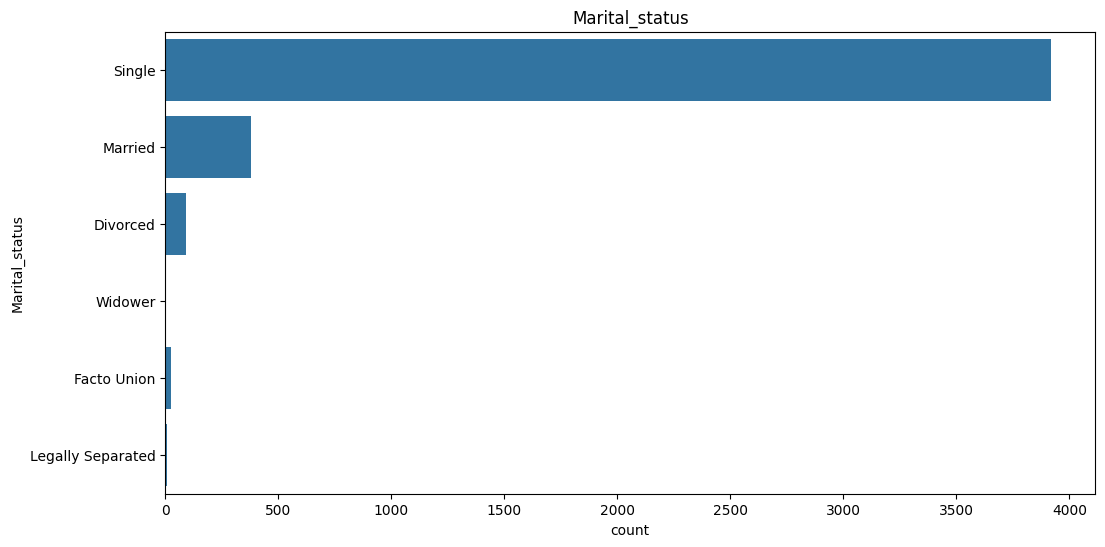

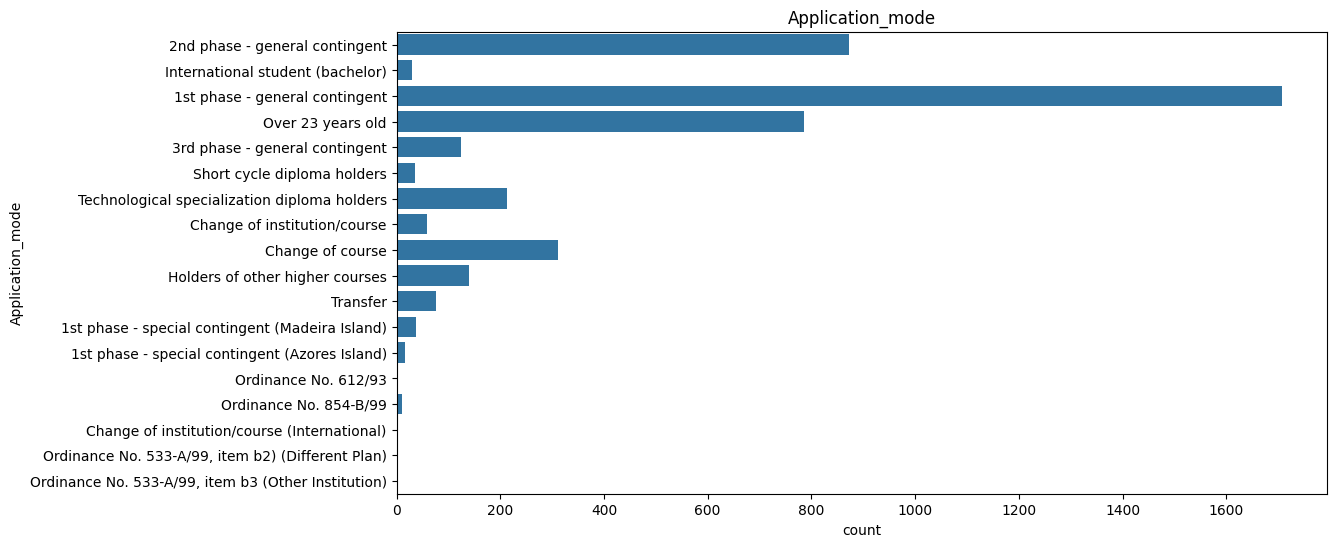

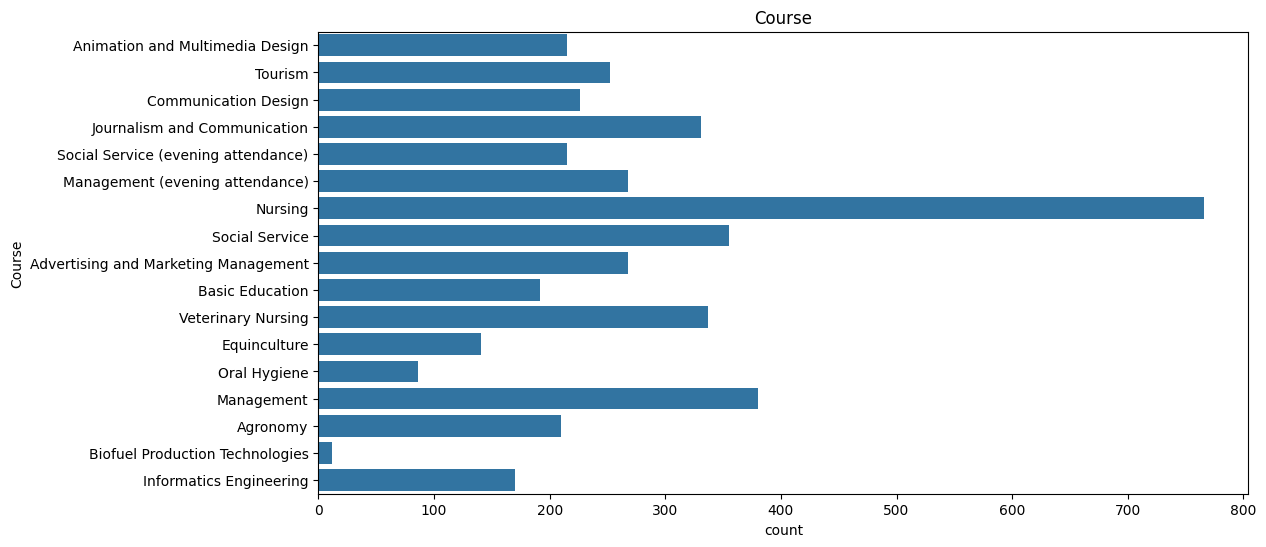

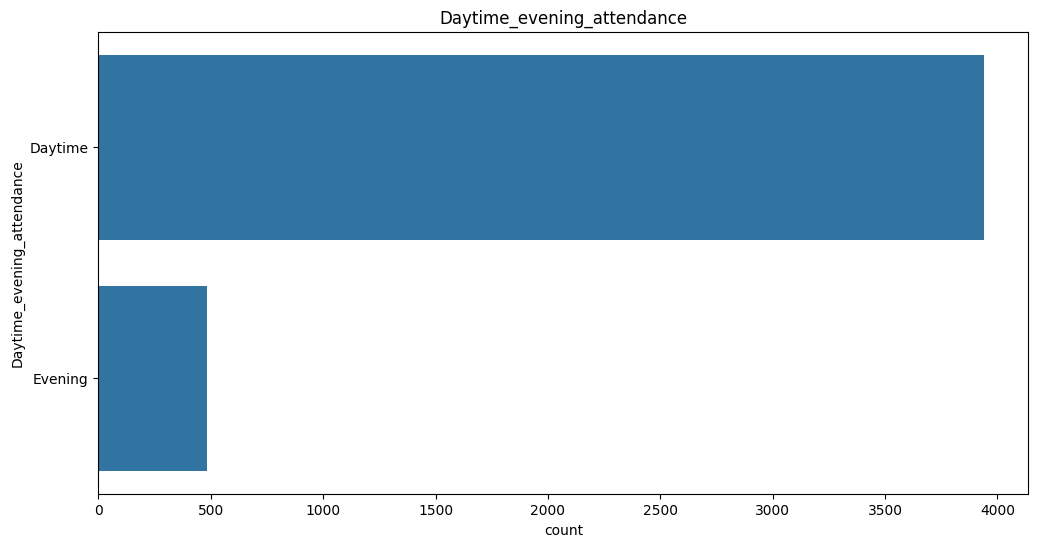

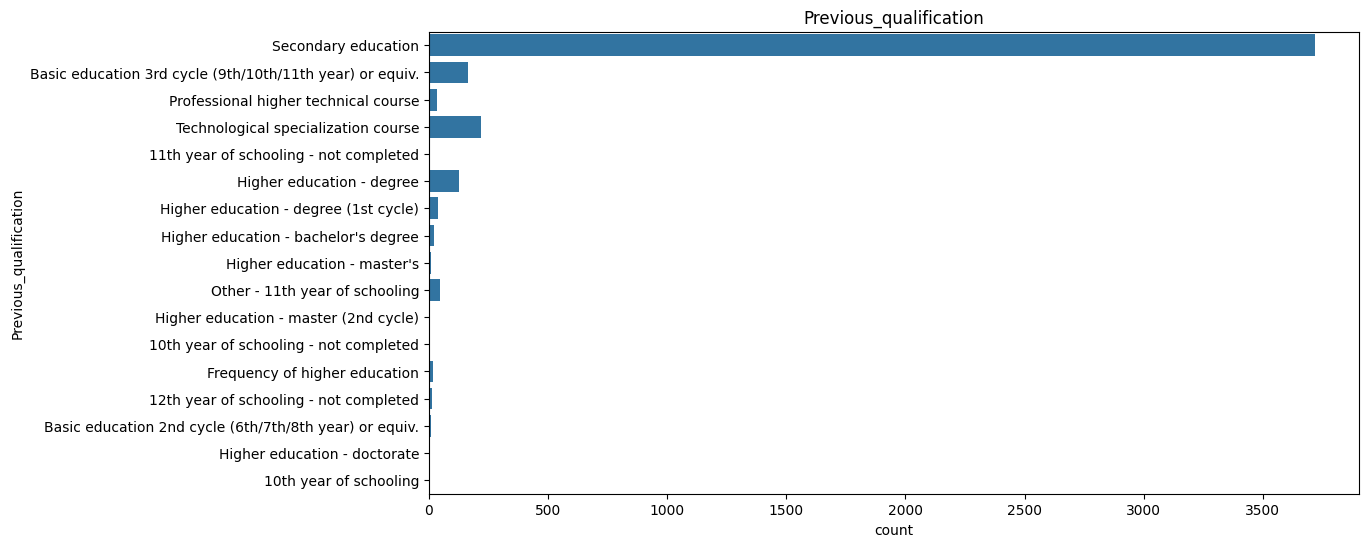

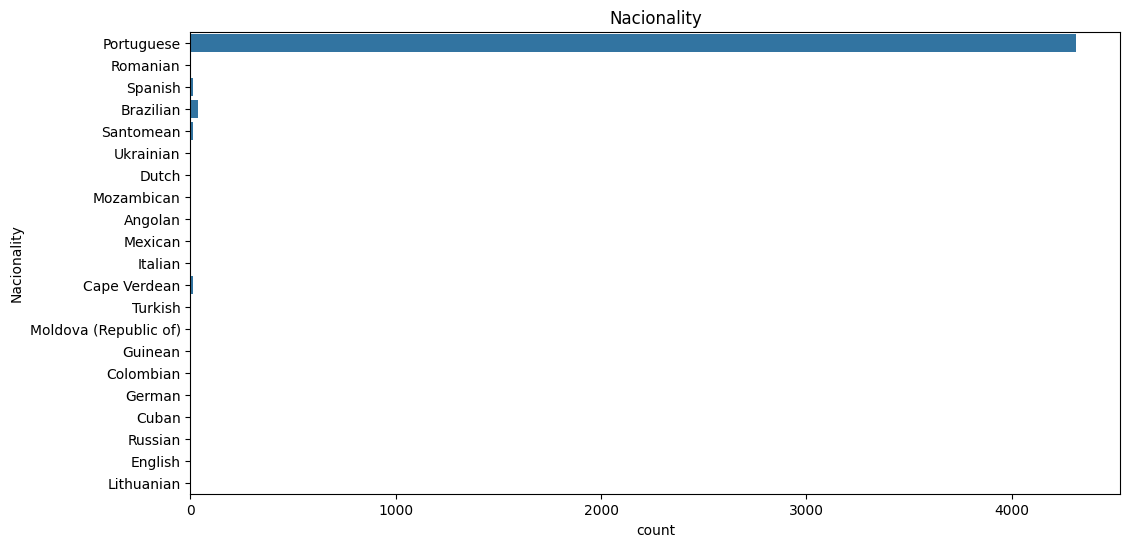

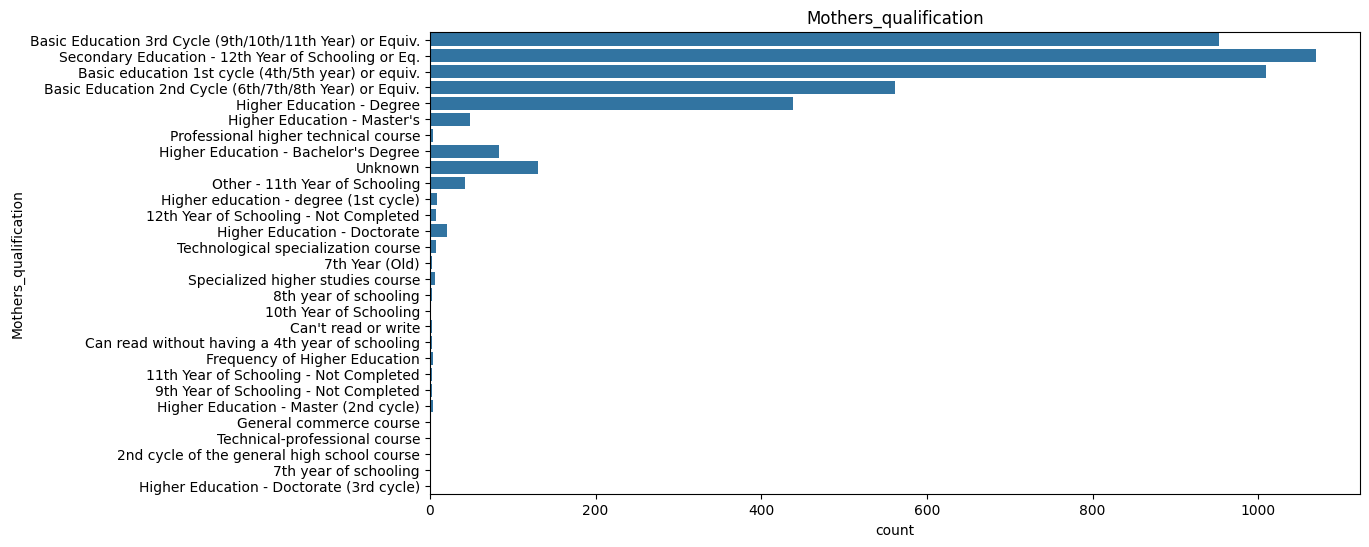

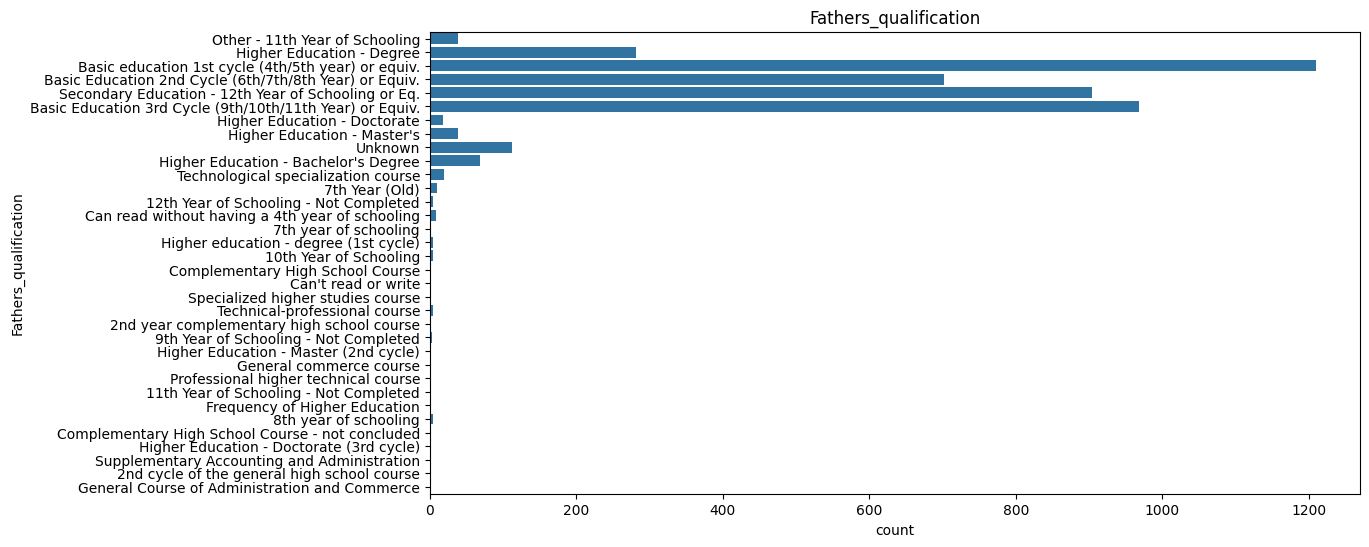

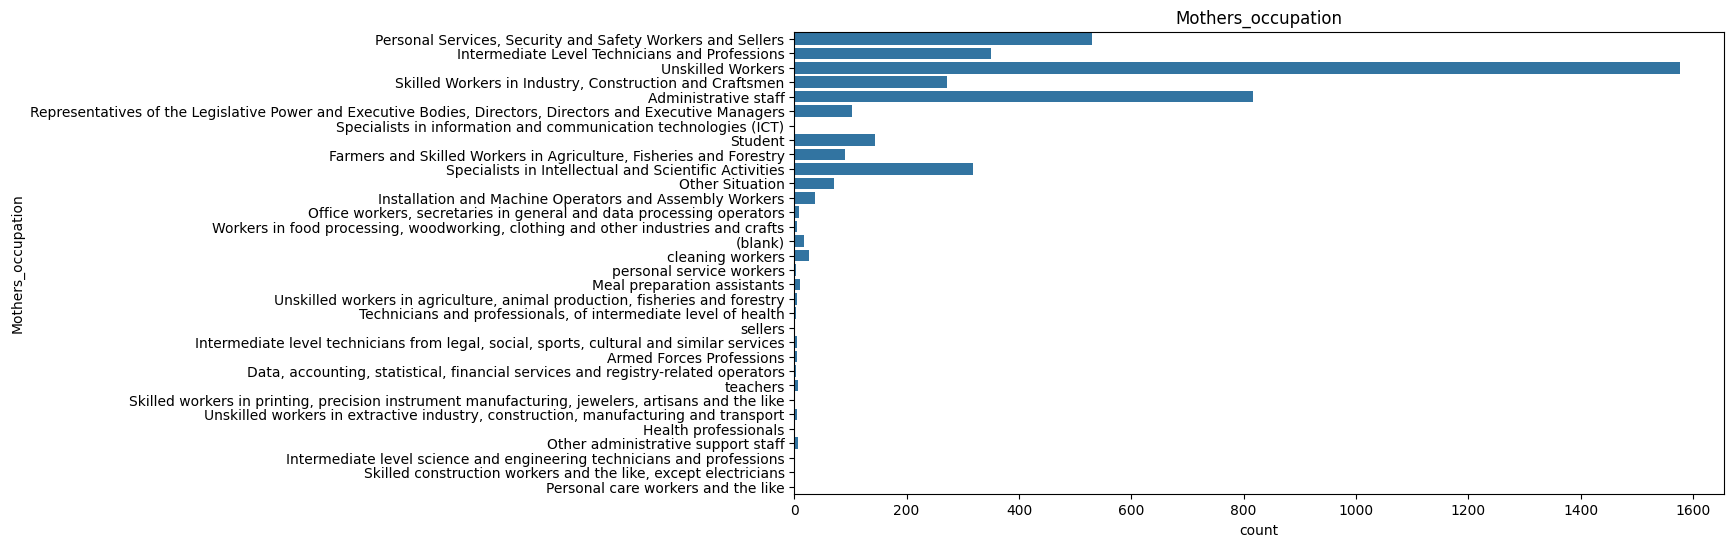

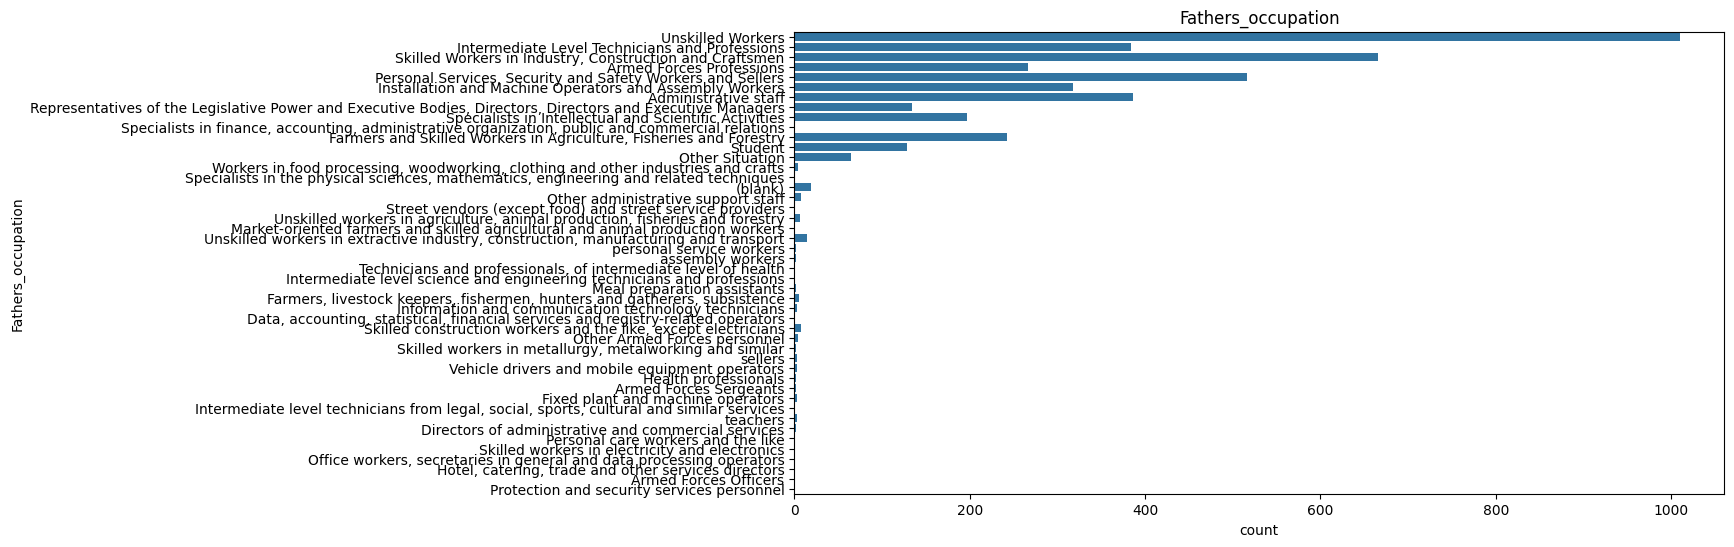

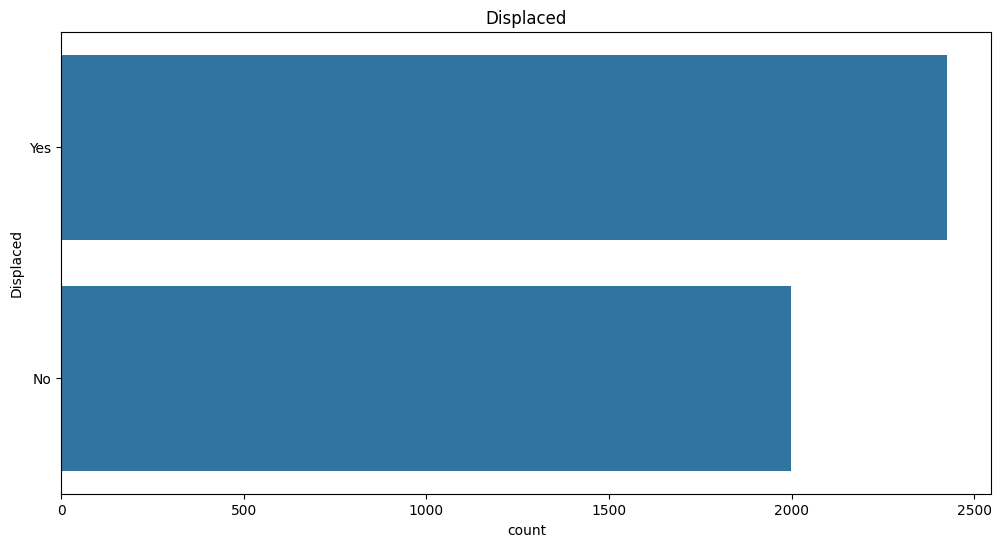

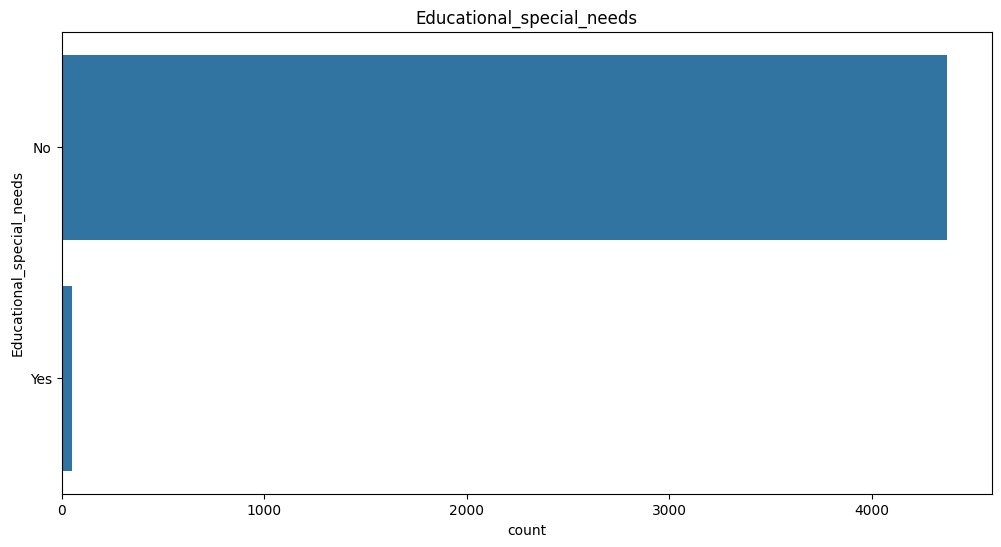

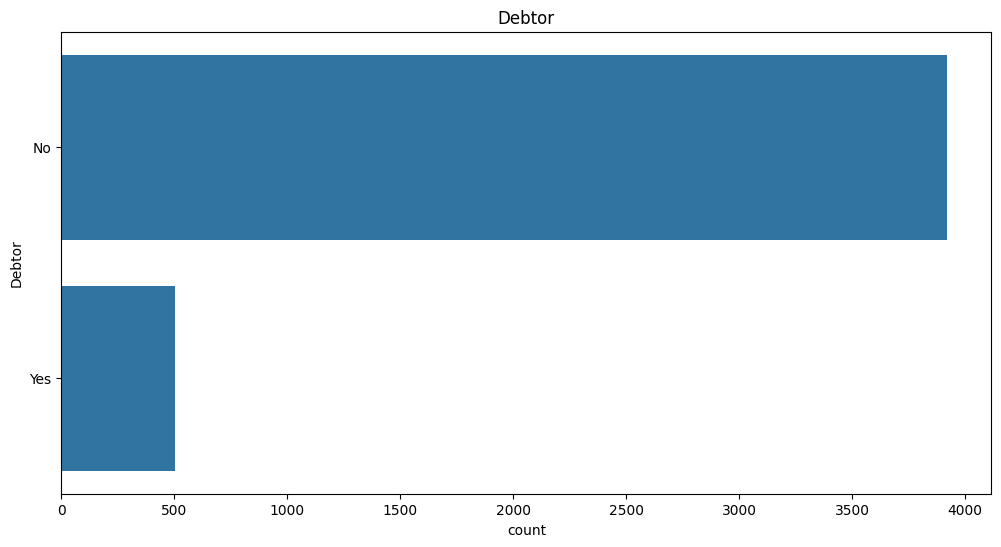

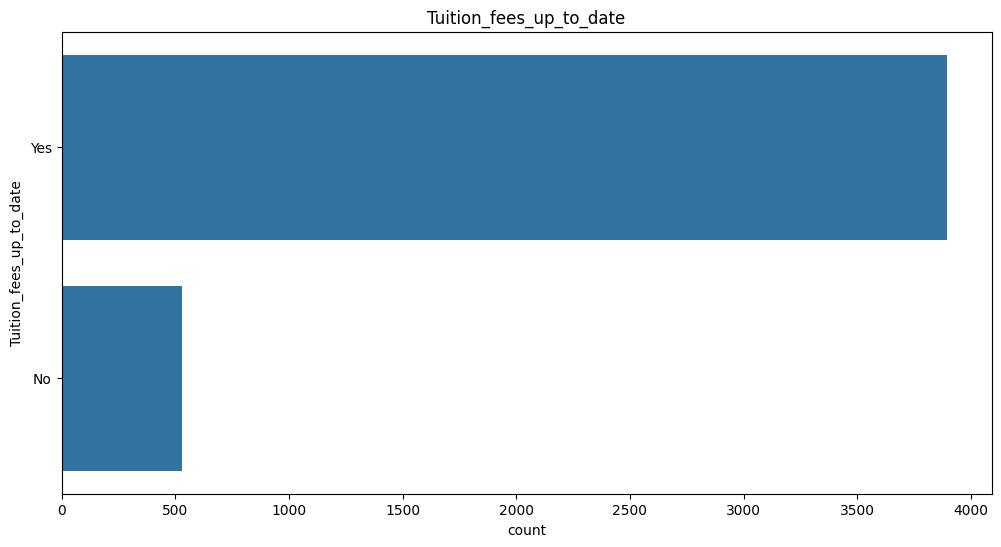

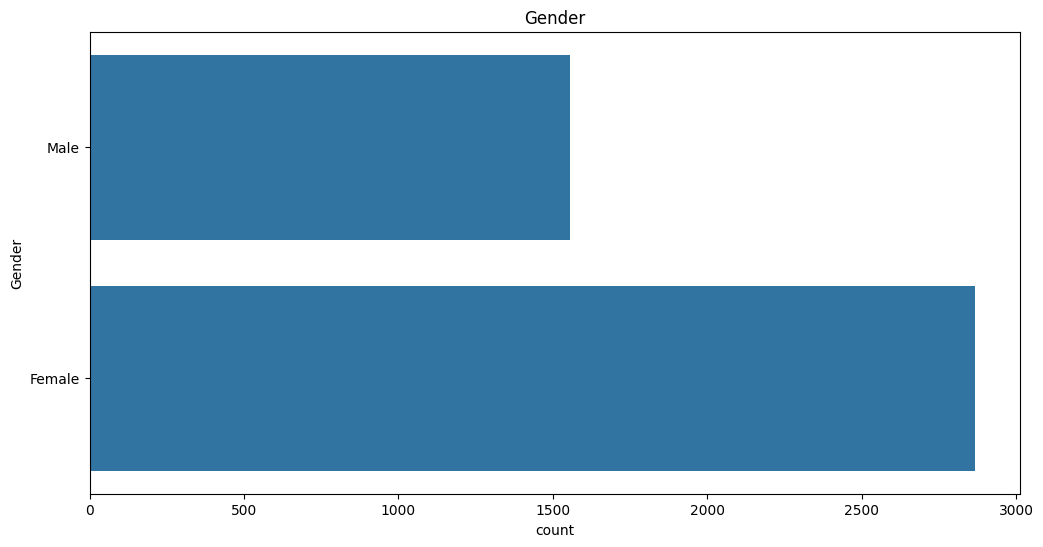

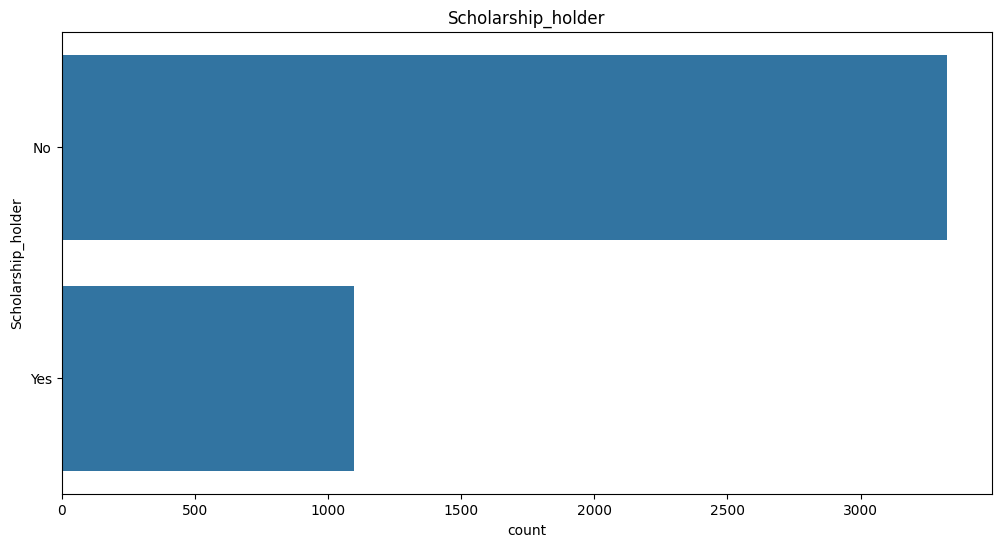

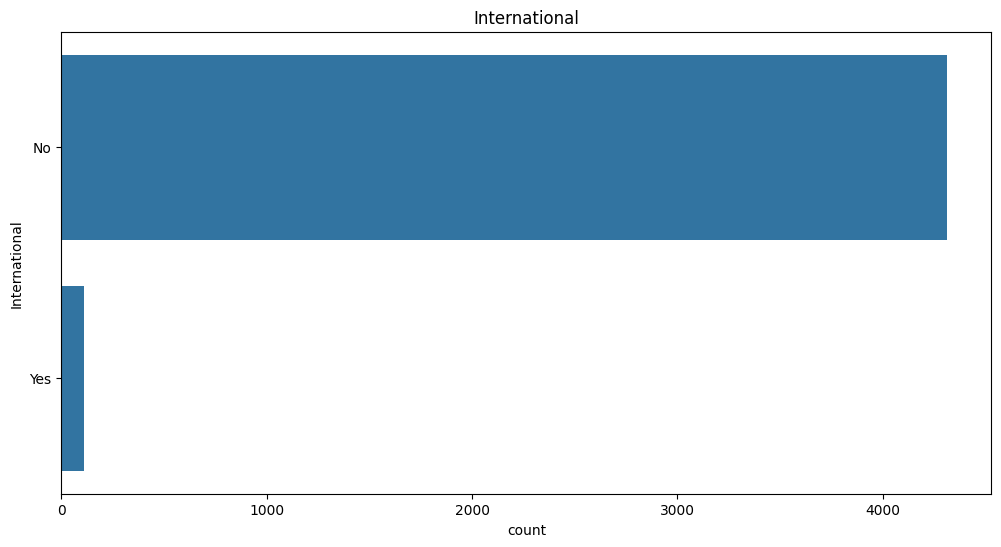

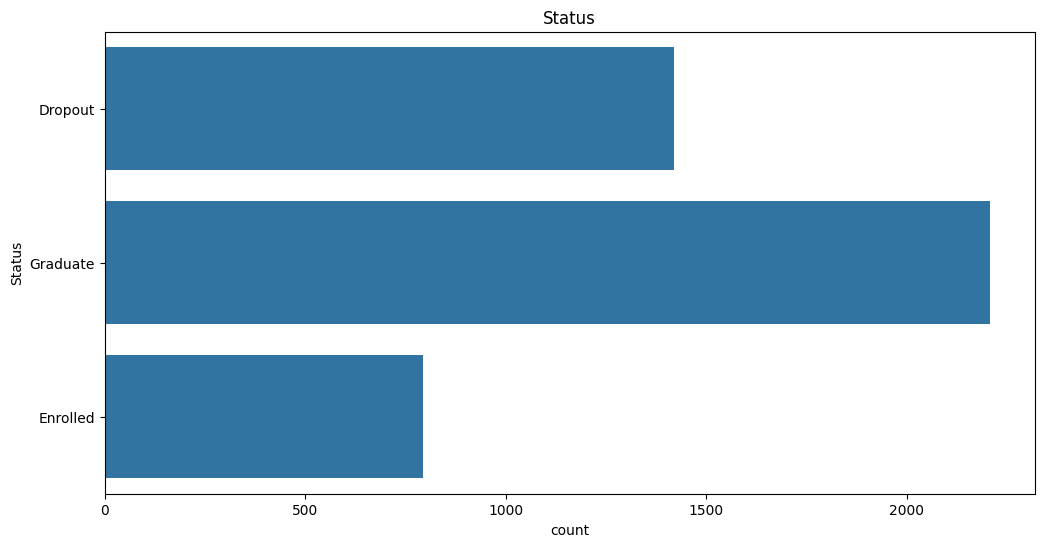

In [8]:
categorical_columns = modified_df.select_dtypes(include="object").columns.tolist()
 
for feature in categorical_columns:
    plt.figure(figsize=(12, 6))  # Ukuran plot yang besar untuk setiap kolom
    sns.countplot(data=modified_df, y=feature)
    plt.title(f'{feature}')
    plt.show()

Diketahui pada bar chart untuk masing-masing variabel di atas bahwa mahasiswa yang lulus lebih banyak daripada mahasiswa yang *Dropout* maupun *Enrolled*, hal tersebut menandakan bahwa dataset ini memiliki masalah *imbalanced data* untuk klasifikasi, sehingga nantinya akan dilakukan *handling imbalanced data* menggunakan salah satu metode, yaitu SMOTE.

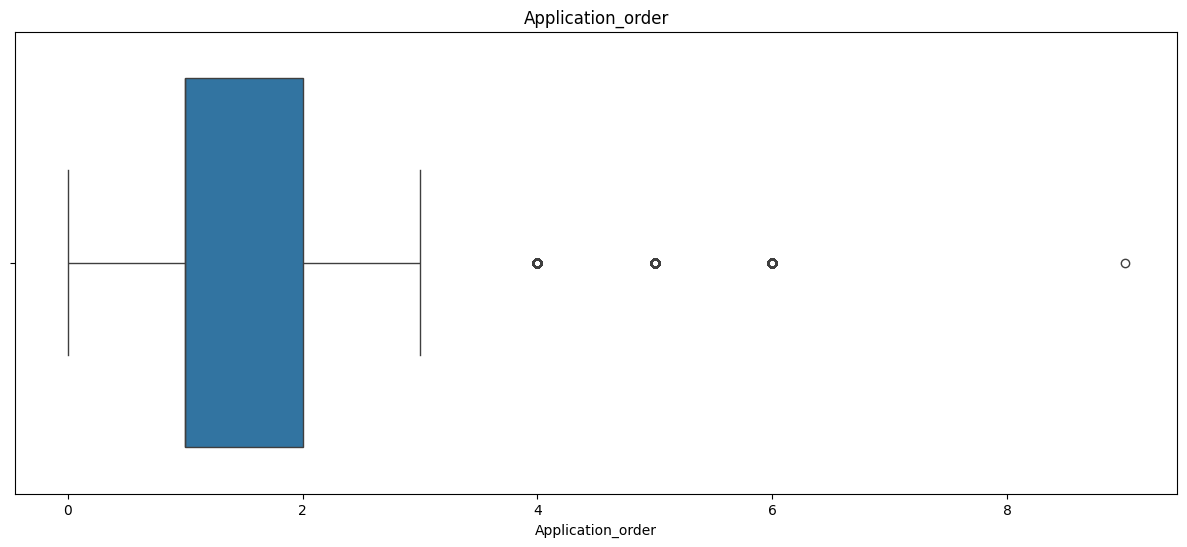

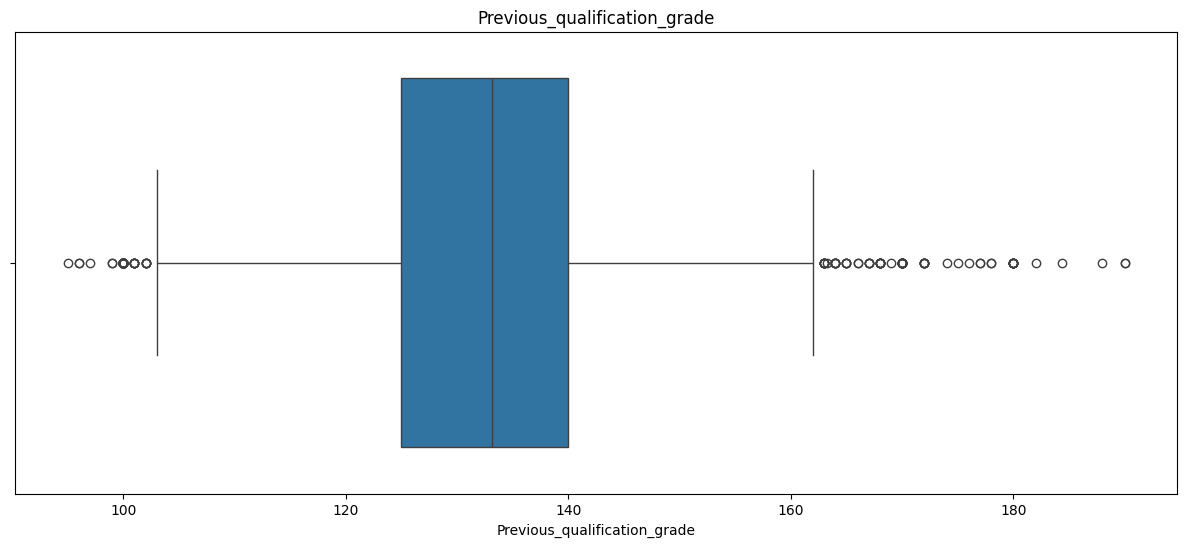

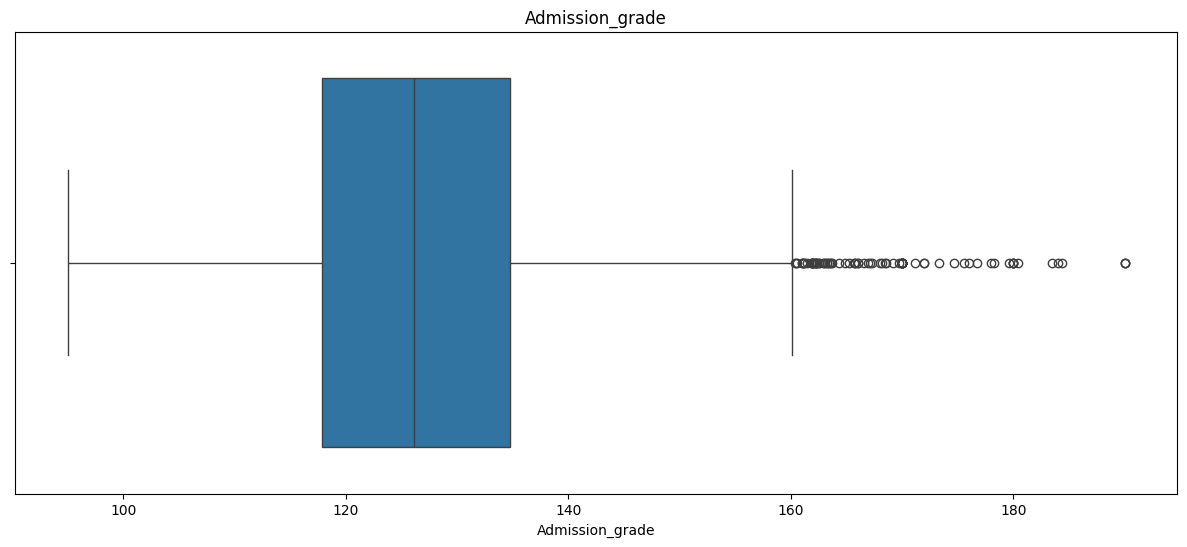

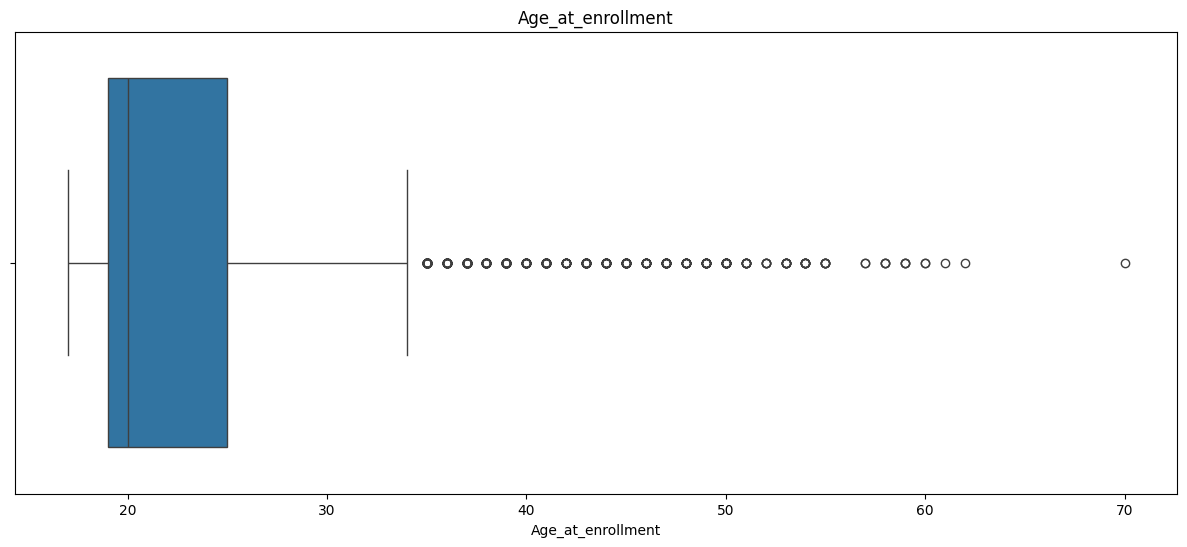

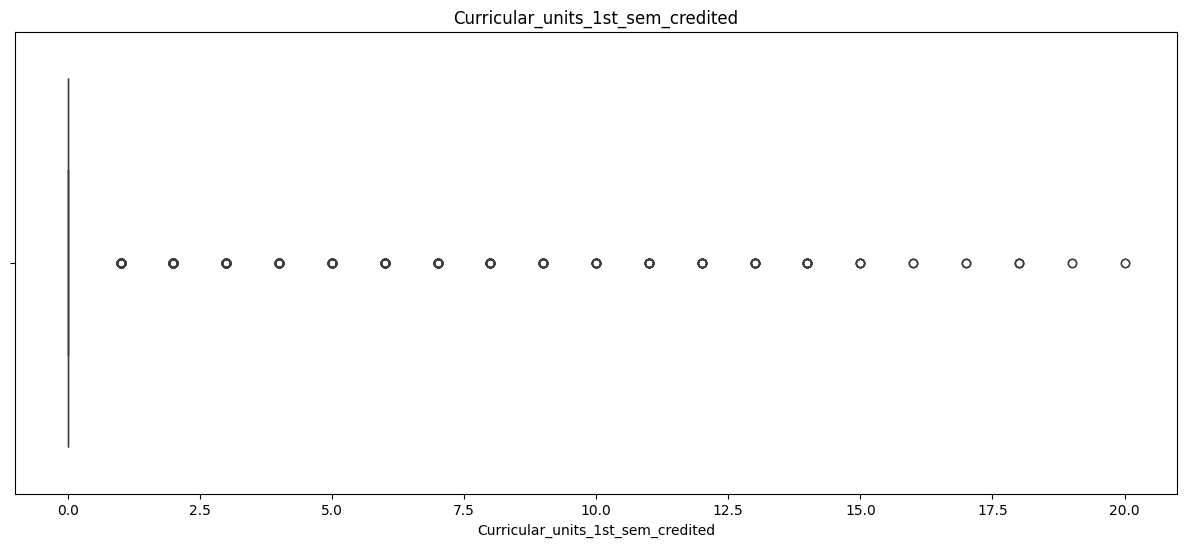

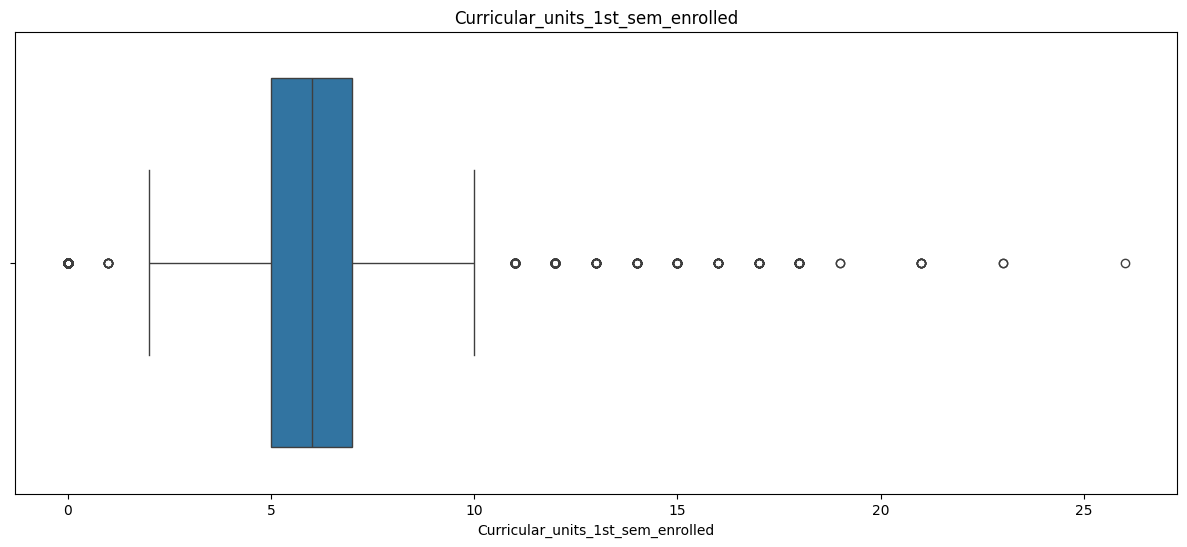

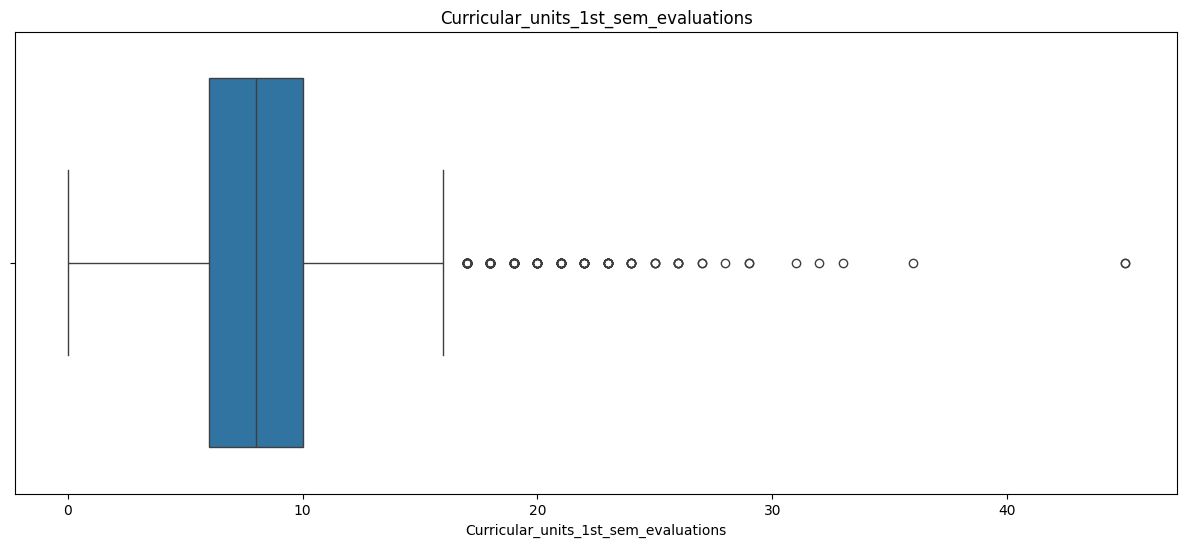

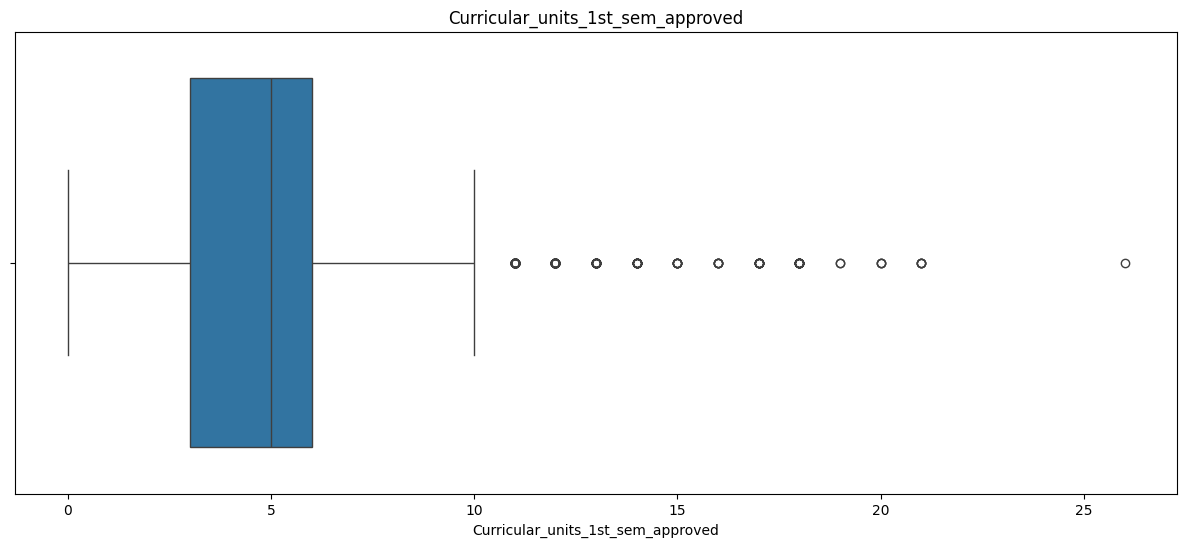

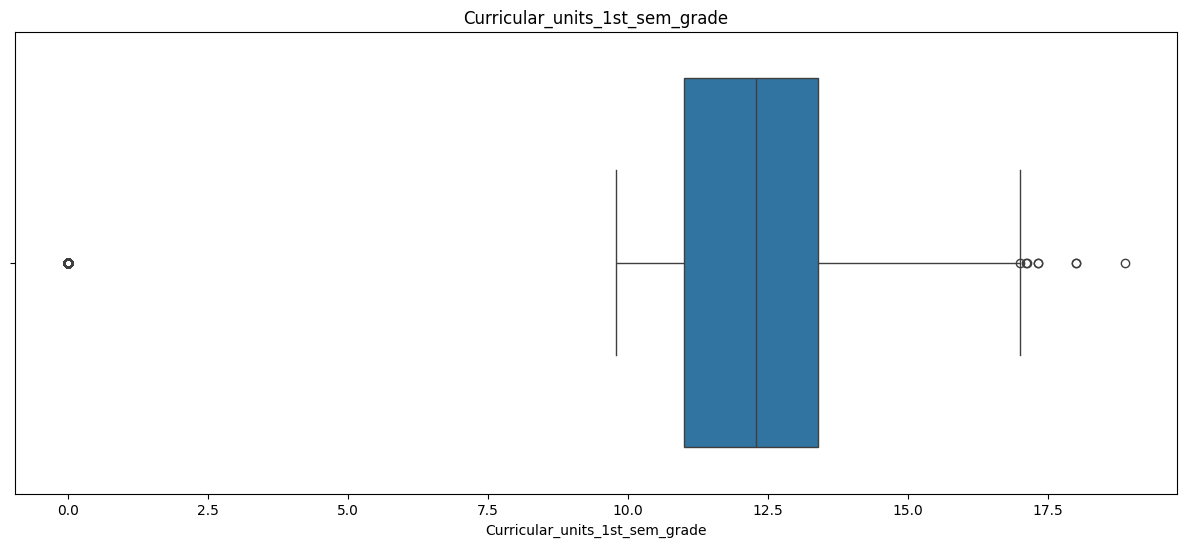

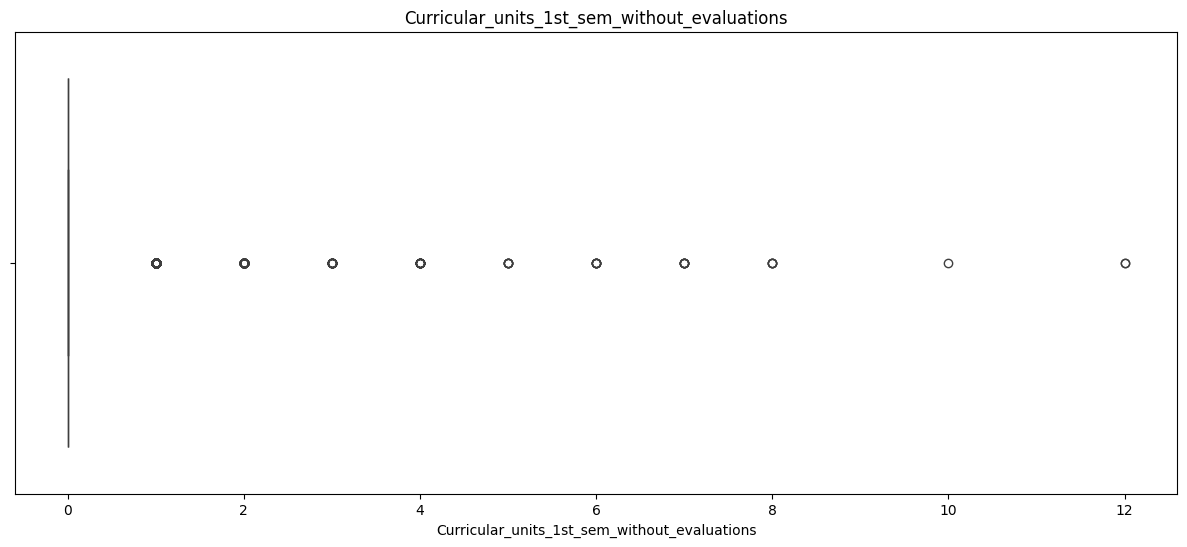

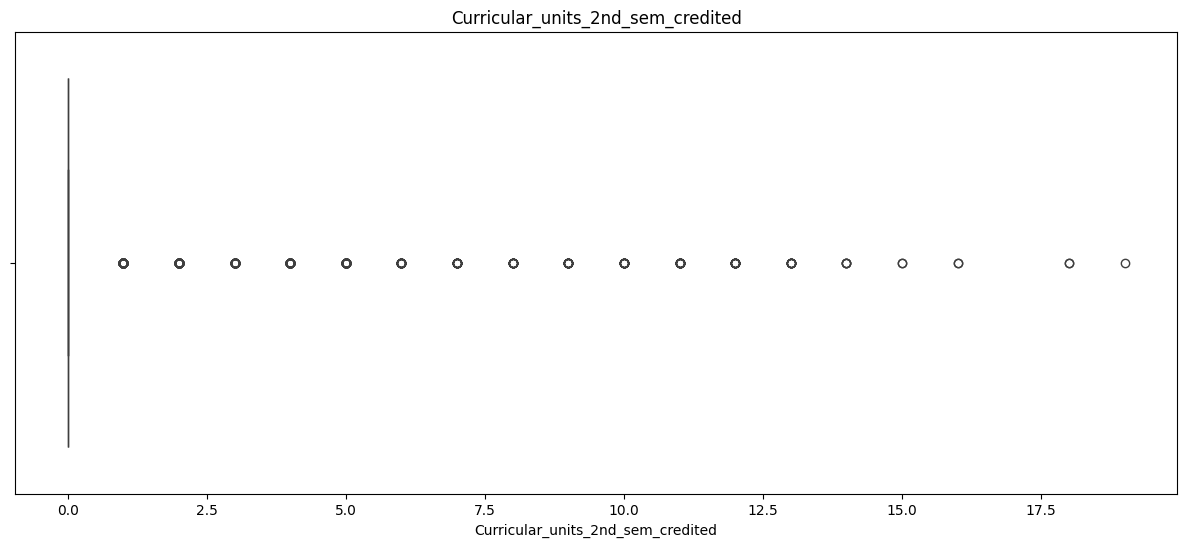

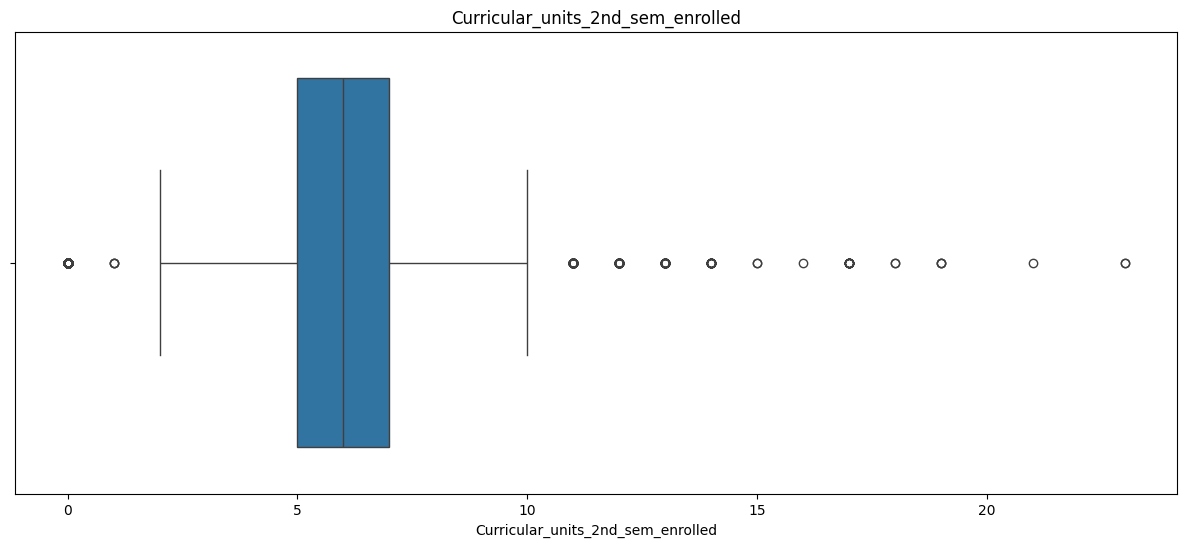

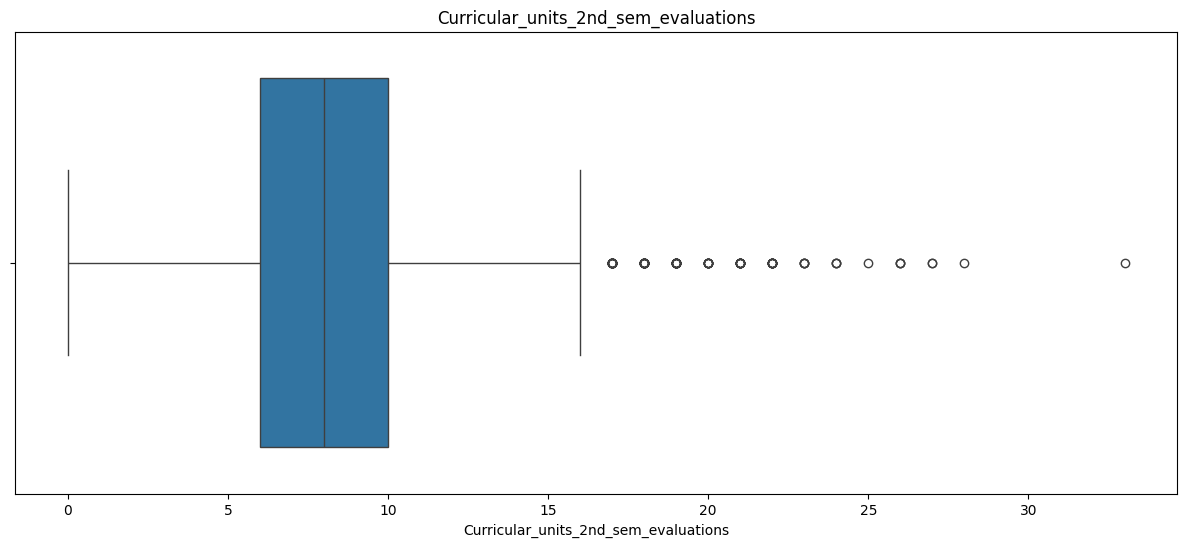

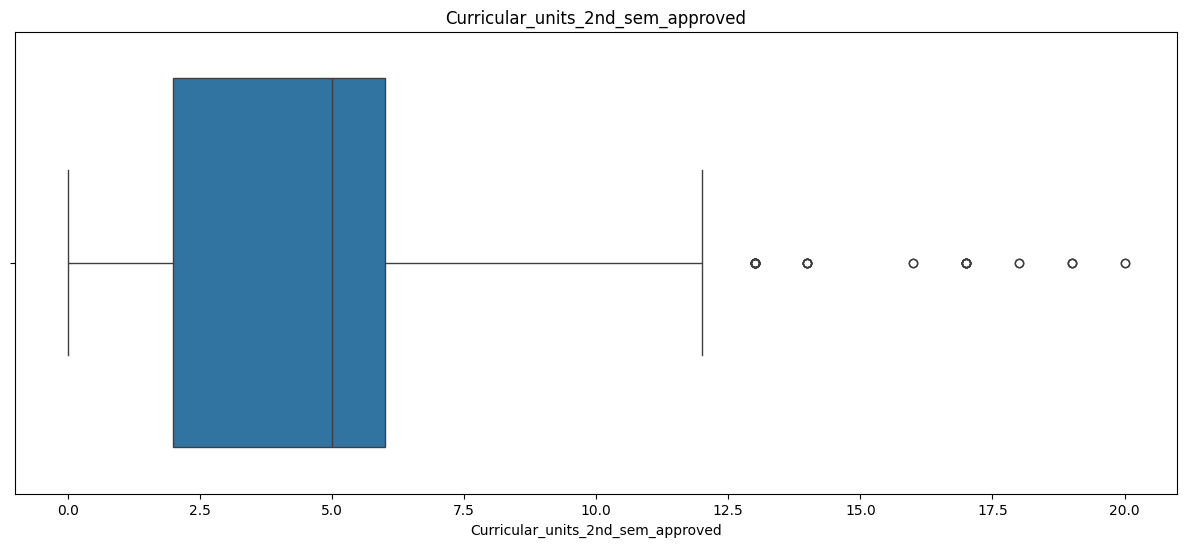

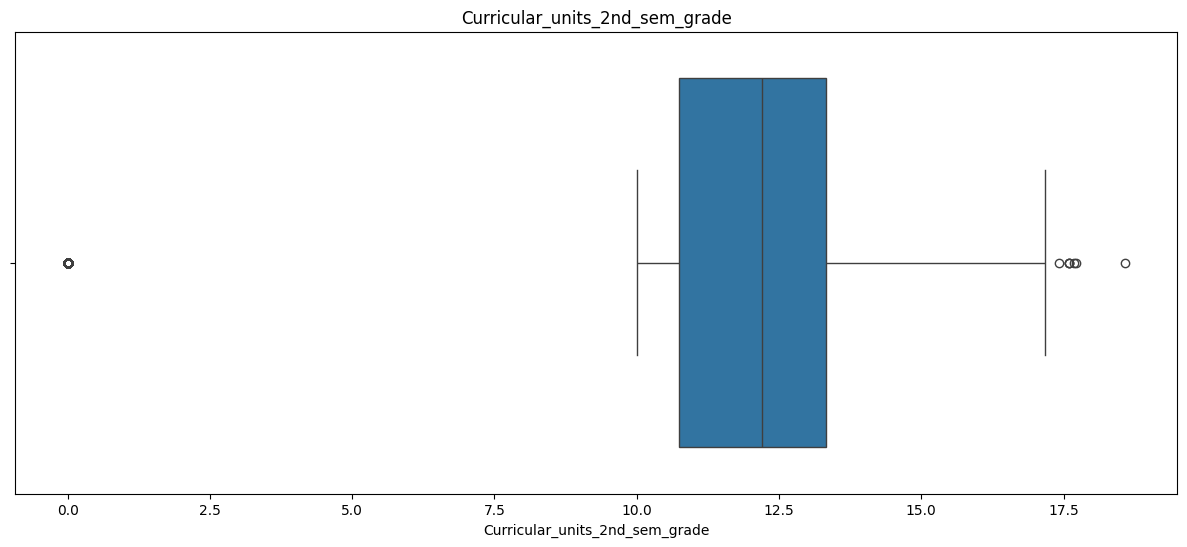

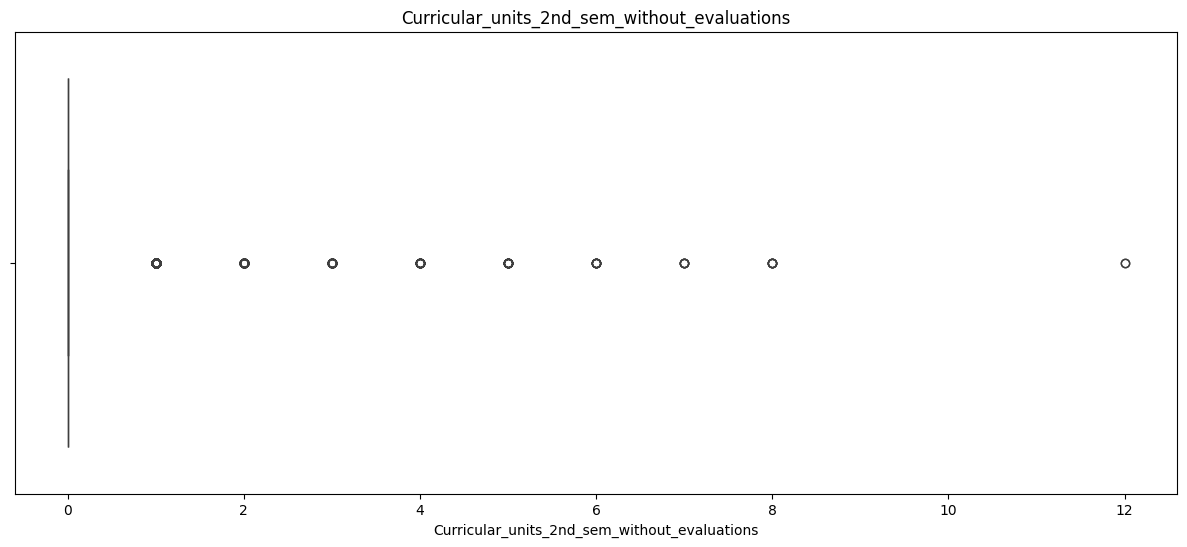

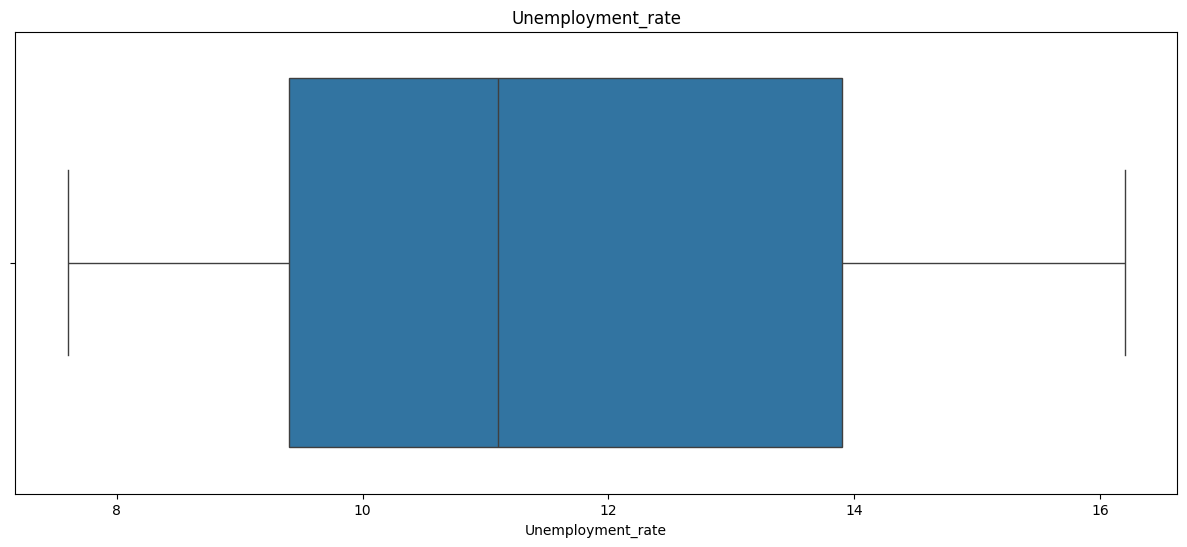

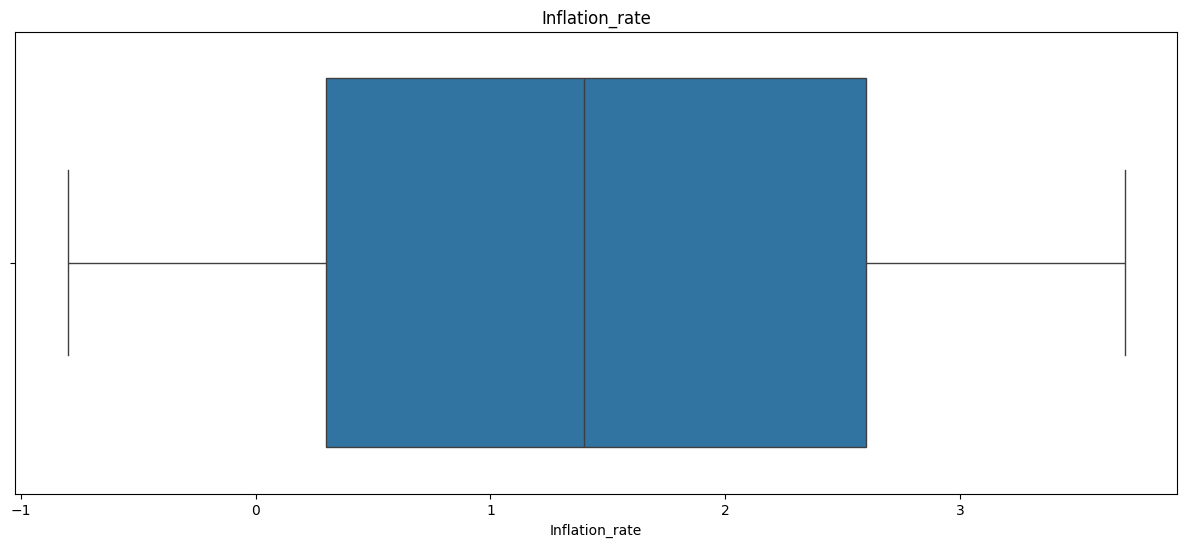

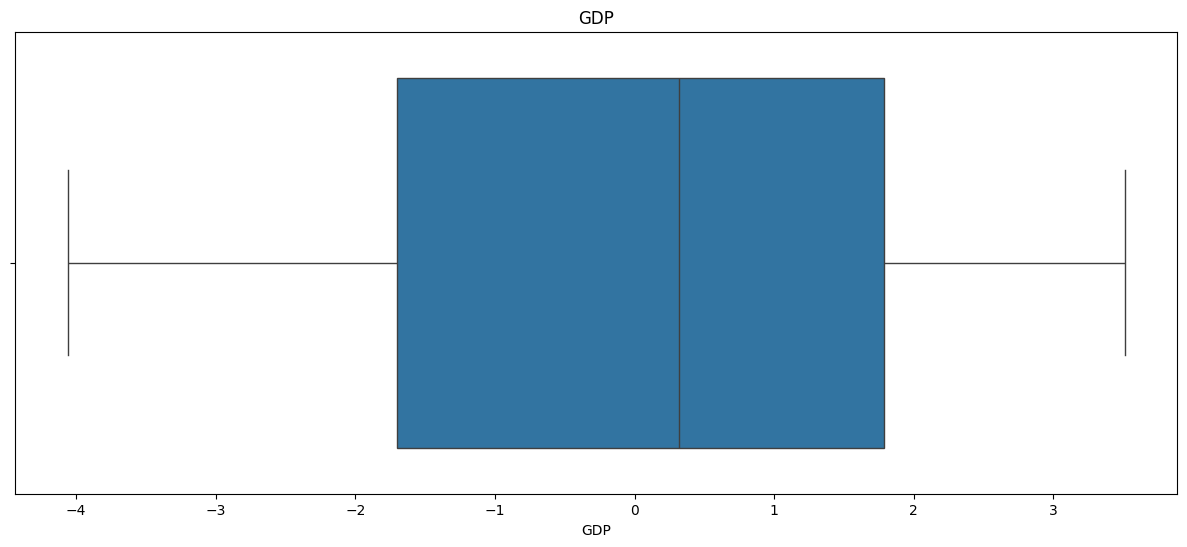

In [9]:
numerical_columns = modified_df.select_dtypes(include=["int64", "float64"]).columns.tolist()

def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    for feature in features:
        plt.figure(figsize=(15, 6))  # Ukuran plot yang besar untuk setiap kolom
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, showfliers=showfliers)
            plt.ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, showfliers=showfliers)
        plt.title(f'{feature}')
        plt.show()

# Contoh penggunaan fungsi
numerical_dis_plot(
    features=numerical_columns,
    df=modified_df
)

Diketahui terdapat *outliers* pada *box plot* untuk beberapa variabel numerik tertentu di atas, seperti variabel `Admission_grade` salah satu contohnya.

In [10]:
numerical_columns

['Application_order',
 'Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

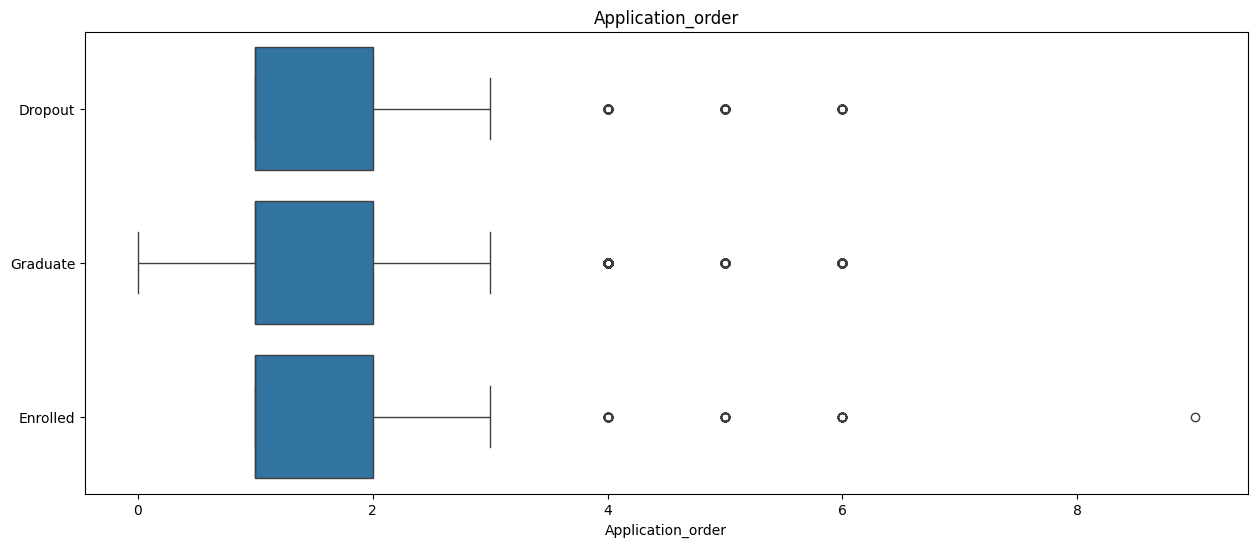

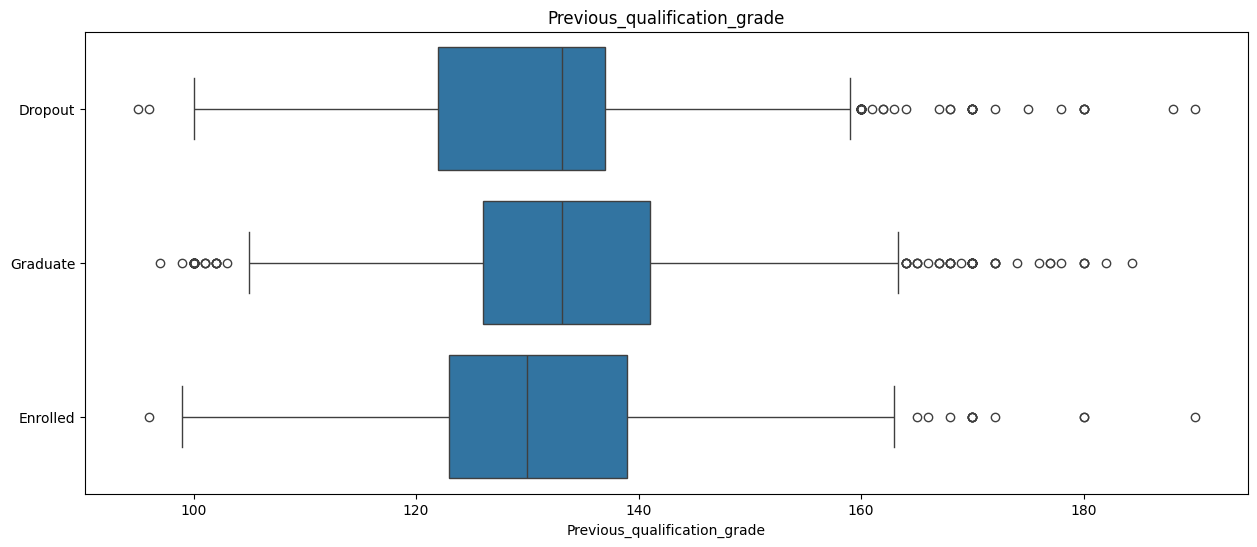

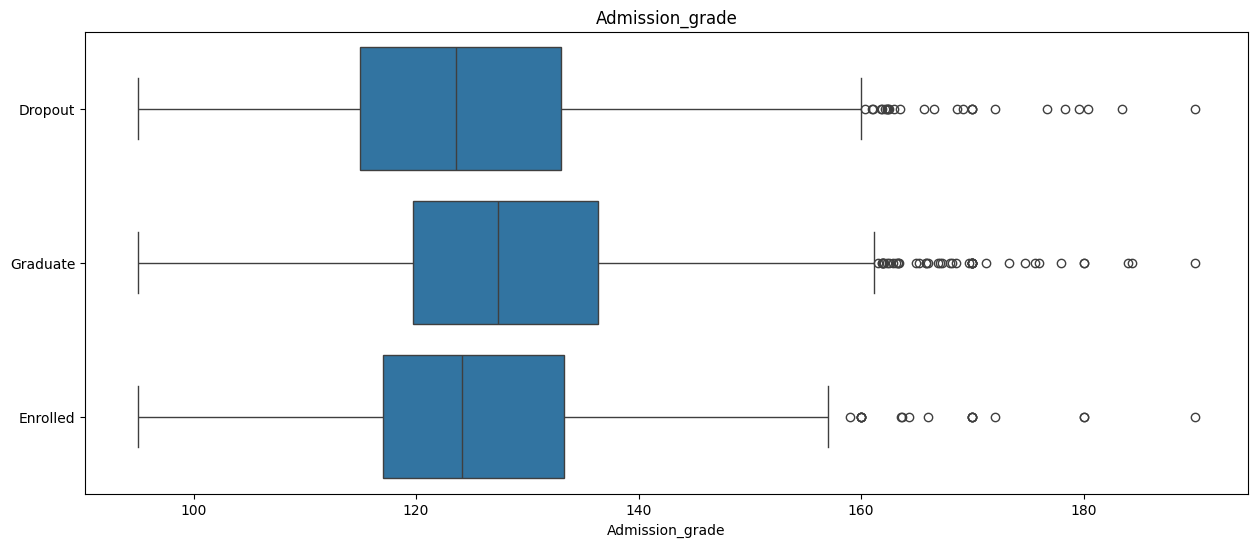

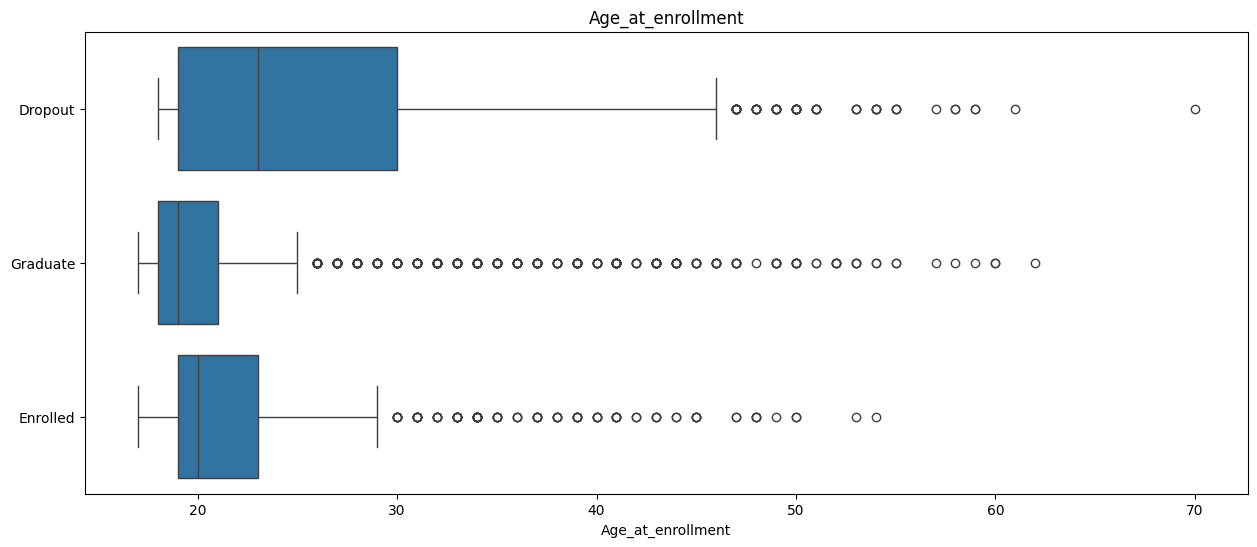

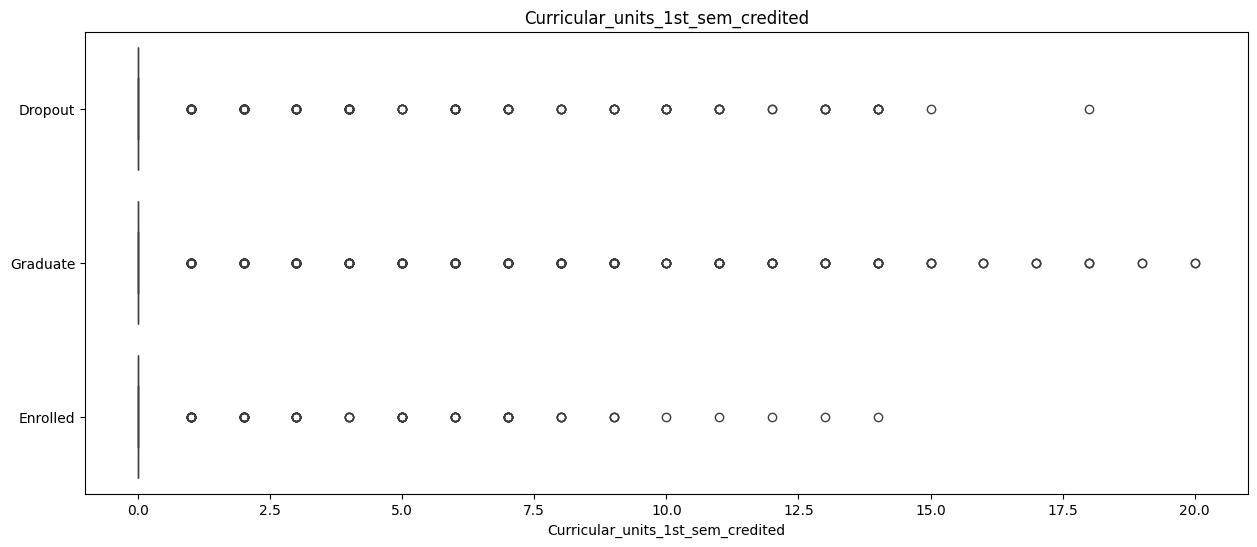

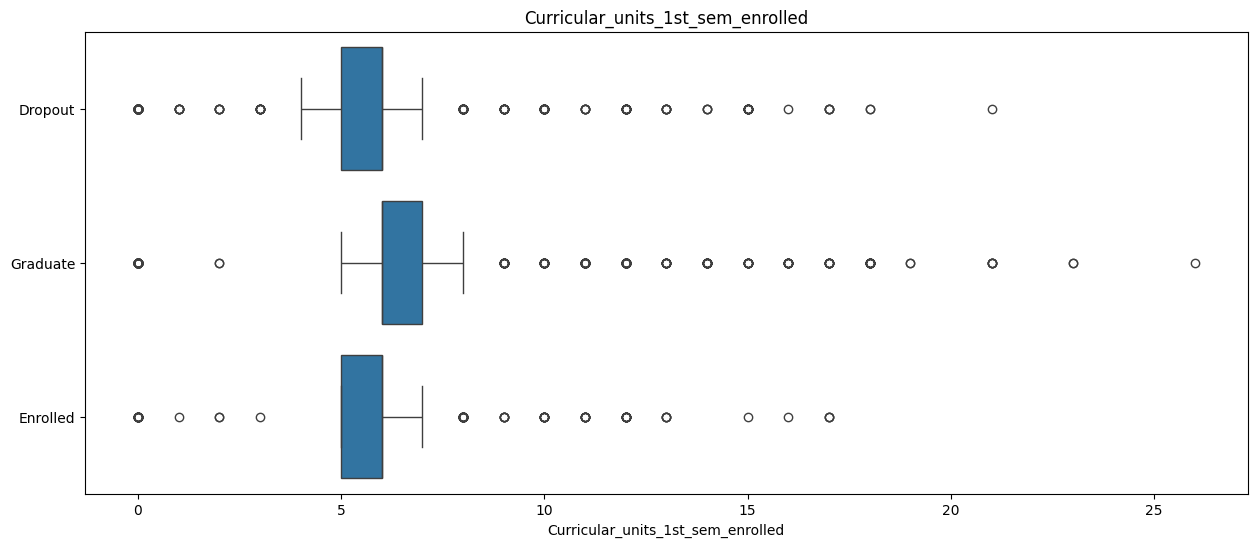

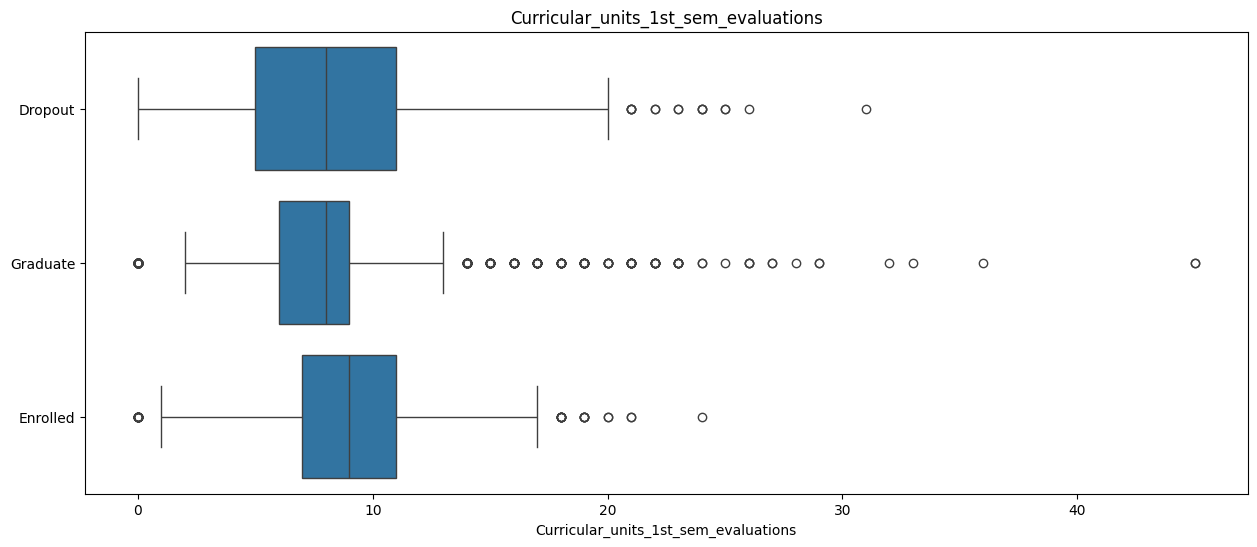

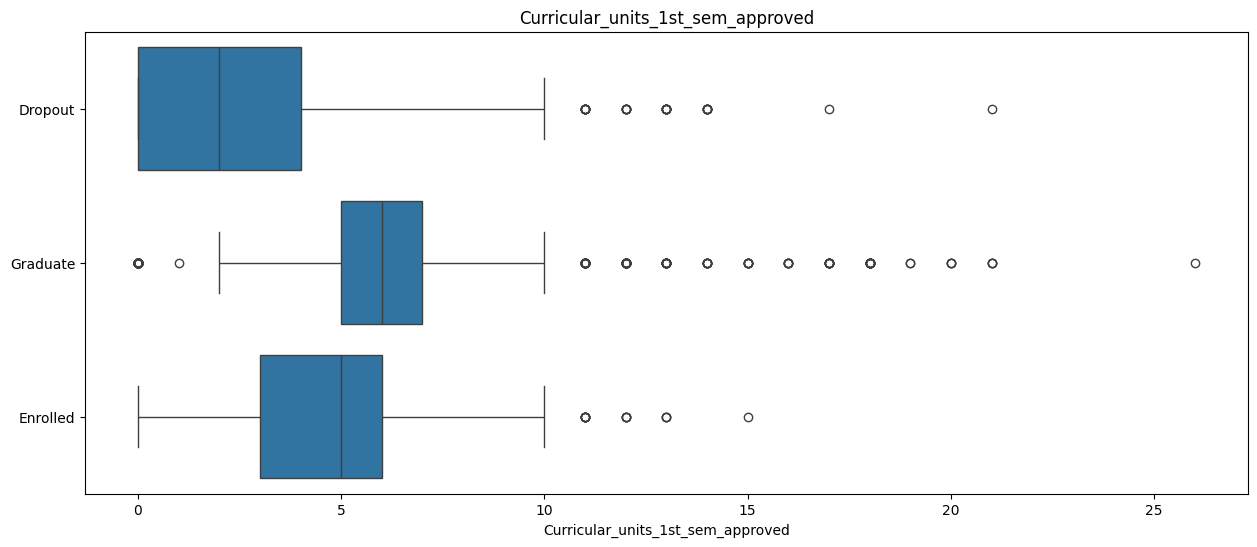

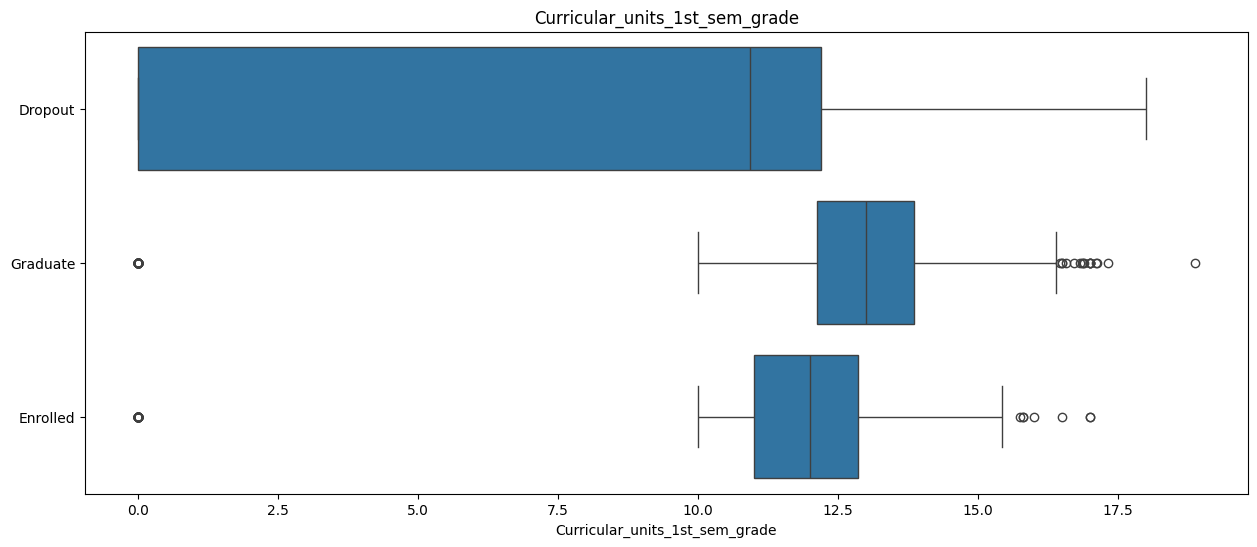

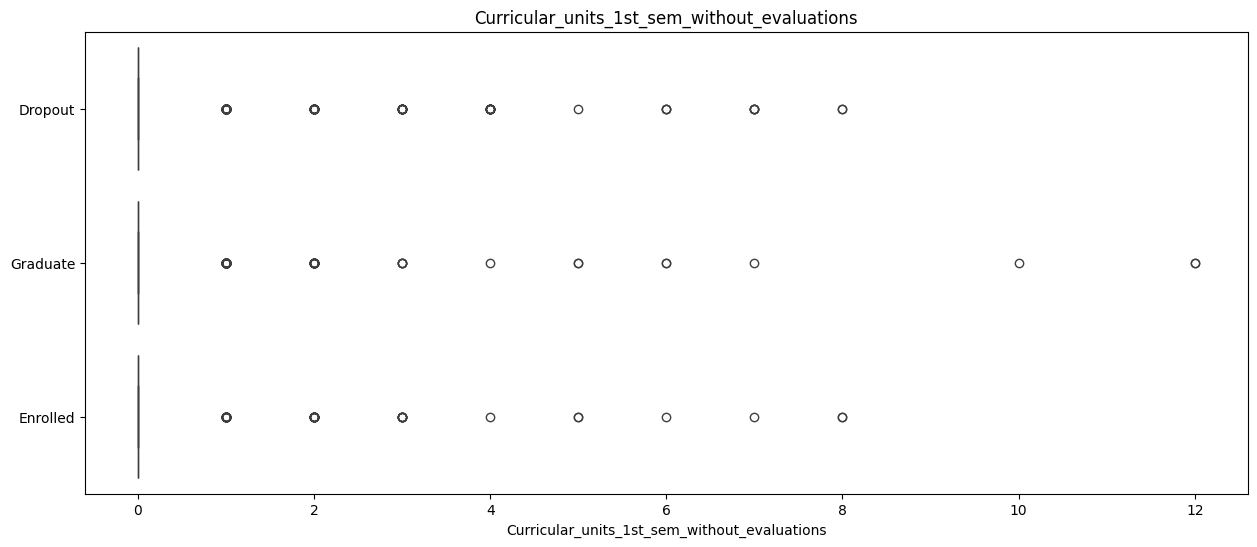

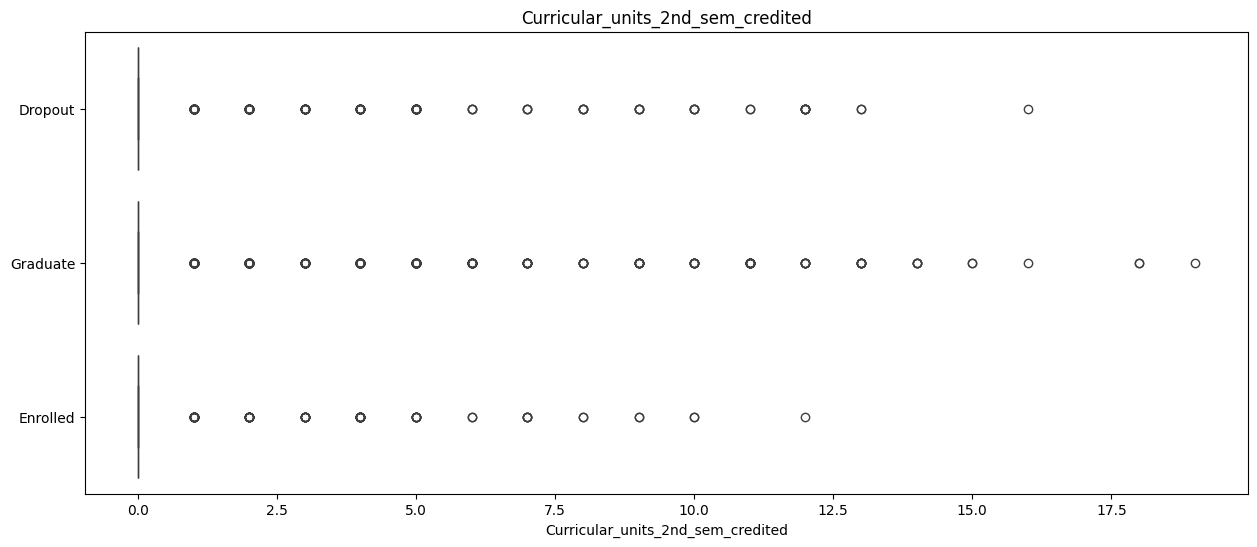

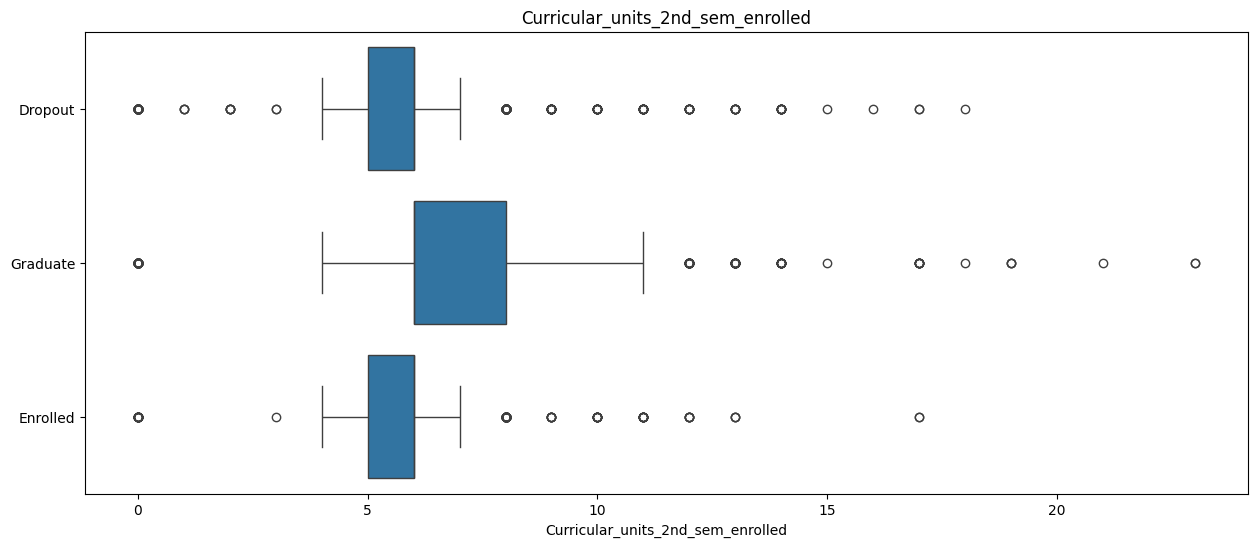

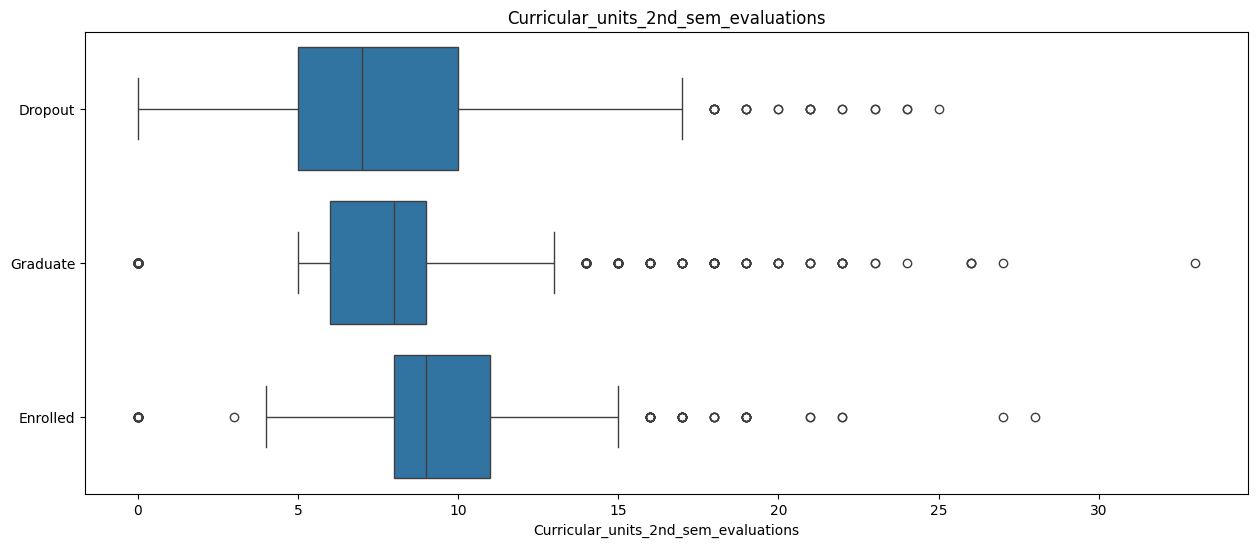

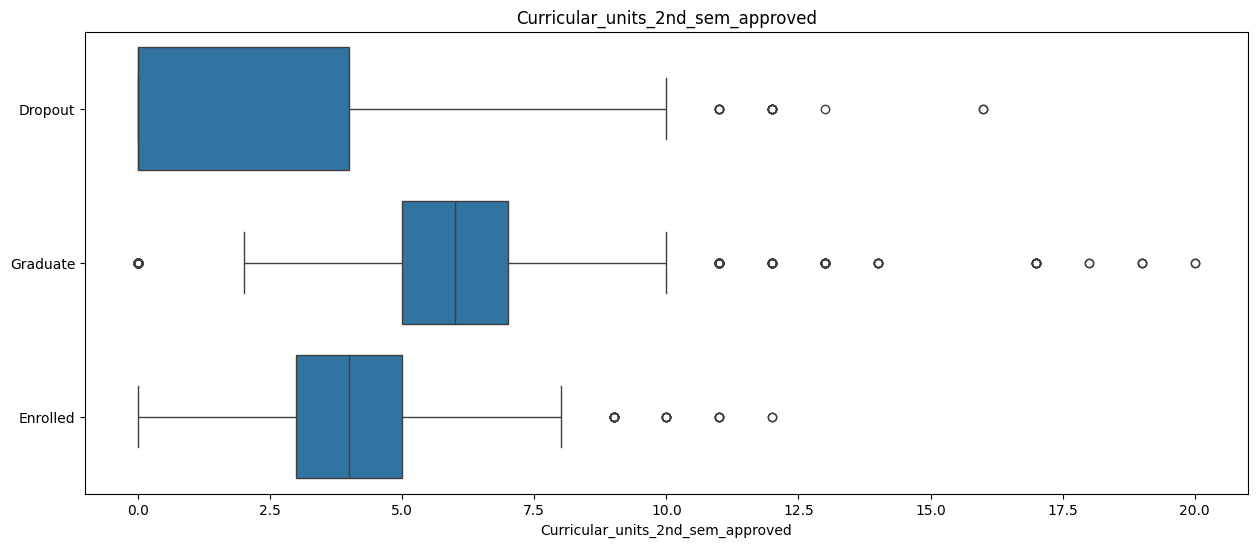

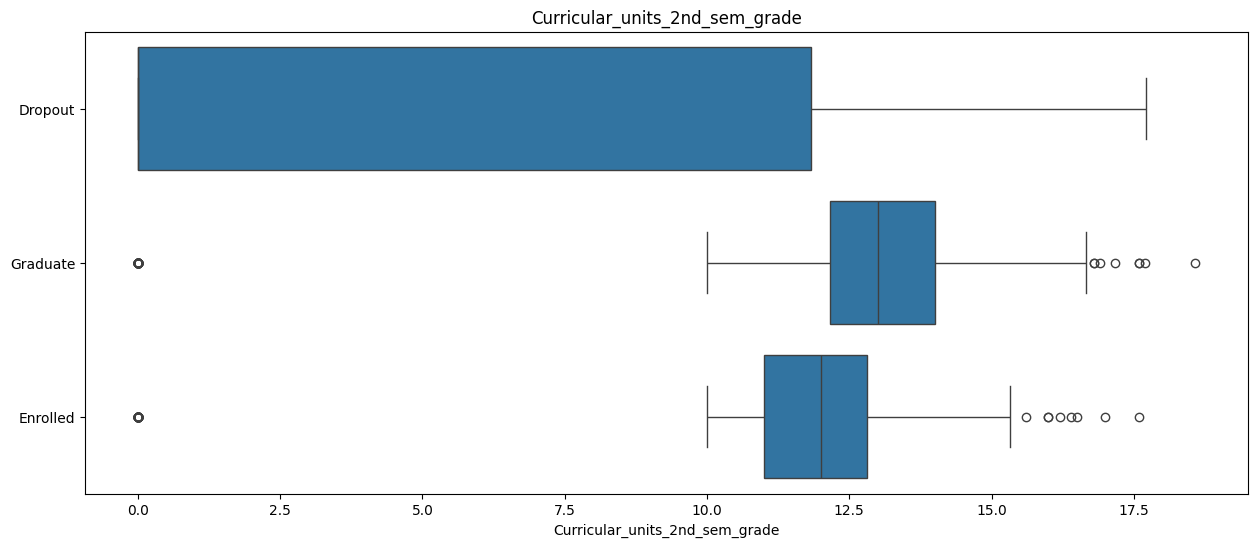

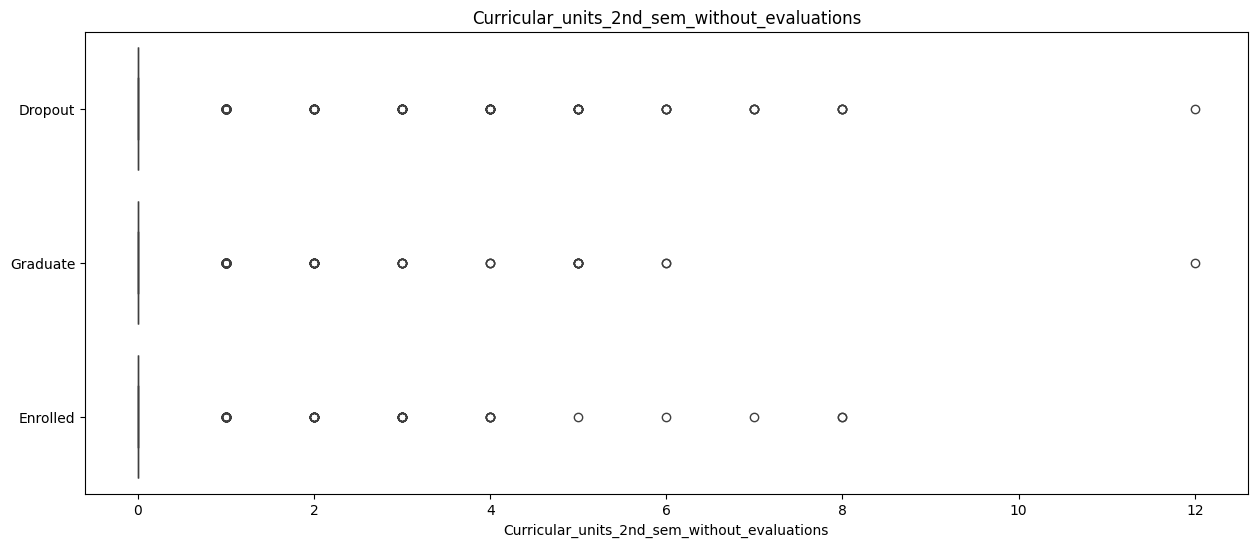

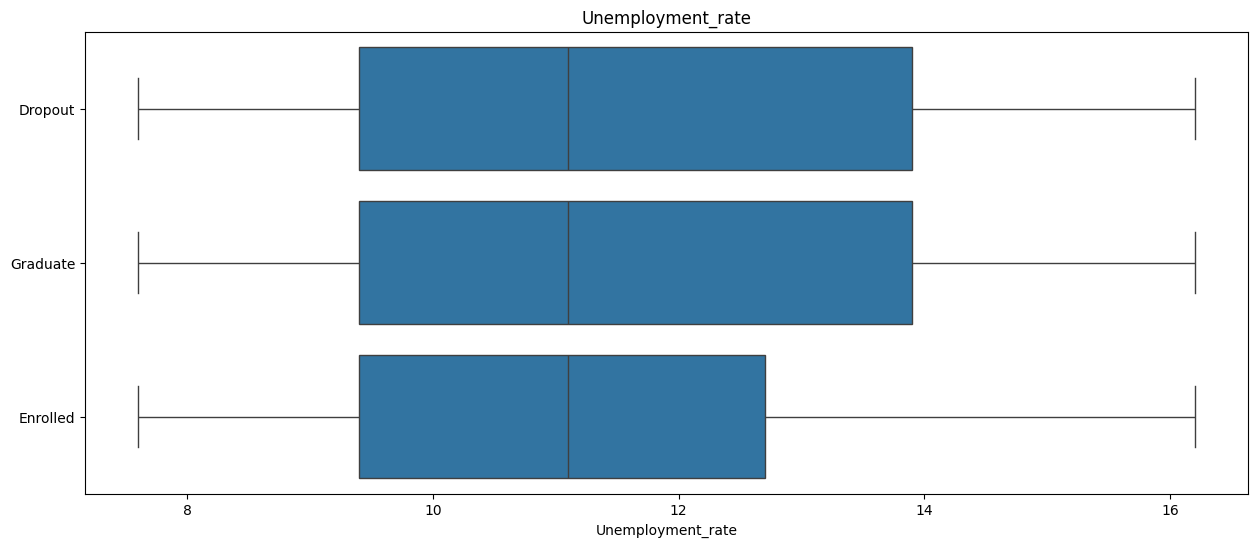

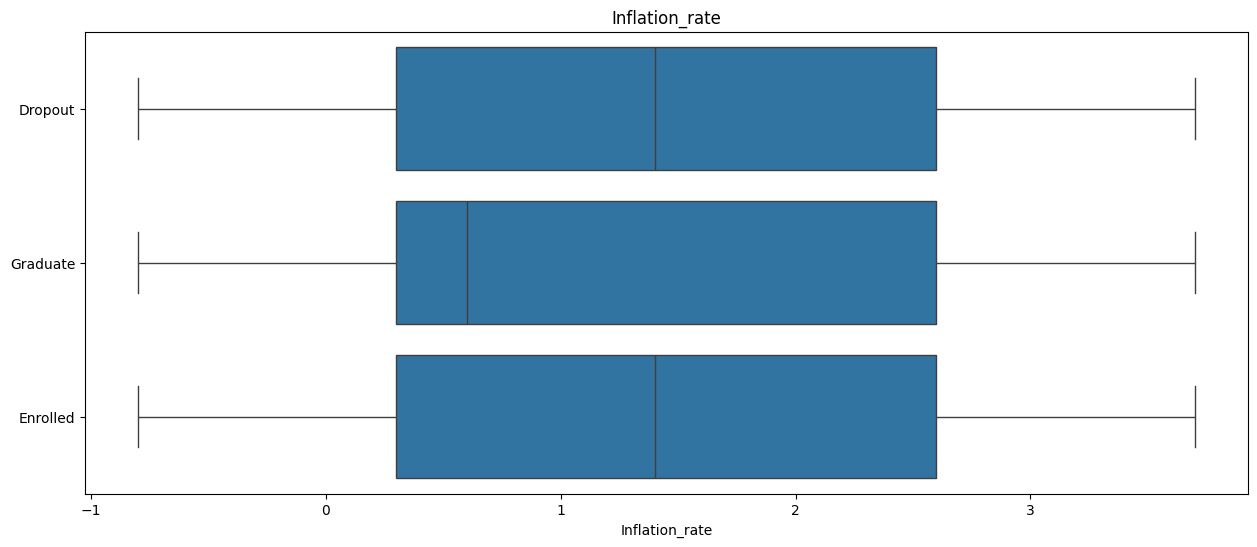

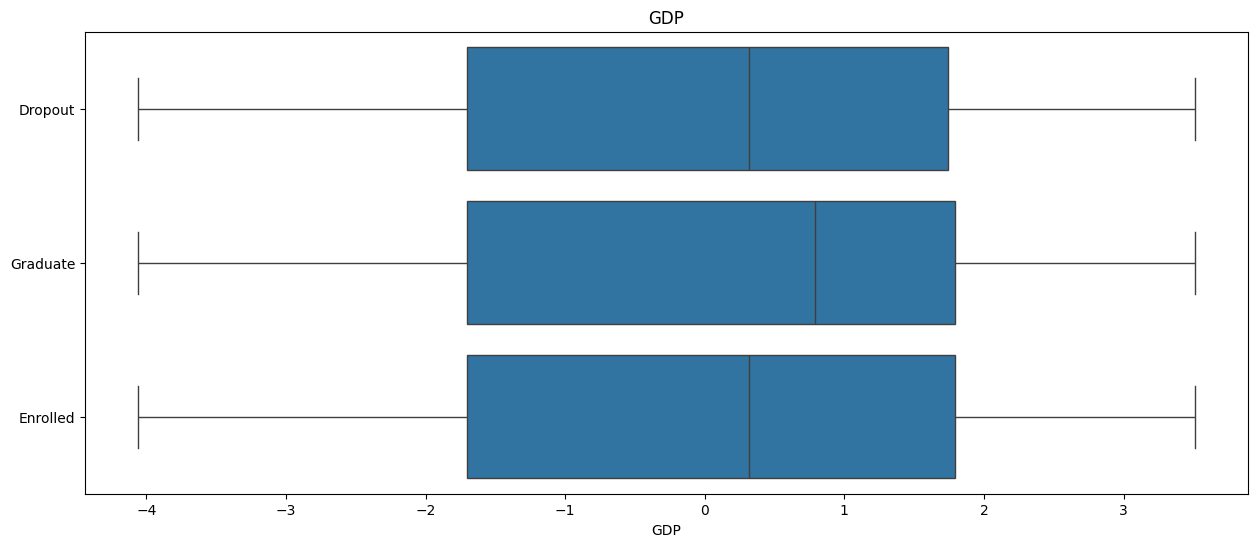

In [11]:
numerical_dis_plot(
    features=numerical_columns,
    df=modified_df,
    segment_feature="Status"
)

* Mahasiswa yang *dropout* adalah mahasiswa yang paling tua saat mereka mendaftar dan umumnya memiliki nilai rendah dalam berbagai aspek, seperti nilai kualifikasi sebelumnya, nilai masuk, jumlah evaluasi unit kurikuler dan jumlah unit yang disetujui serta nilai mereka, baik di semester pertama maupun kedua (`Age_at_enrollment`, `Previous_qualification_grade`, `Admission_grade`, `Curricular_units_1st_sem_evaluations`, `Curricular_units_1st_sem_approved`, `Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_evaluations`, `Curricular_units_2nd_sem_approved`, `Curricular_units_2nd_sem_grade`).

* Mahasiswa yang lulus (*Graduate*) adalah mereka yang memiliki nilai tinggi dalam aspek jumlah unit kurikuler yang diambil di semester pertama dan kedua (`Curricular_units_1st_sem_enrolled`, `Curricular_units_2nd_sem_enrolled`).

* Tidak terdapat pola yang menarik pada variabel-variabel `Application_order`, `Curricular_units_1st_sem_credited`, `Curricular_units_1st_sem_without_evaluations`, `Curricular_units_2nd_sem_credited`, `Curricular_units_2nd_sem_without_evaluations`, `Unemployment_rate`, `Inflation_rate`, `dan GDP`.

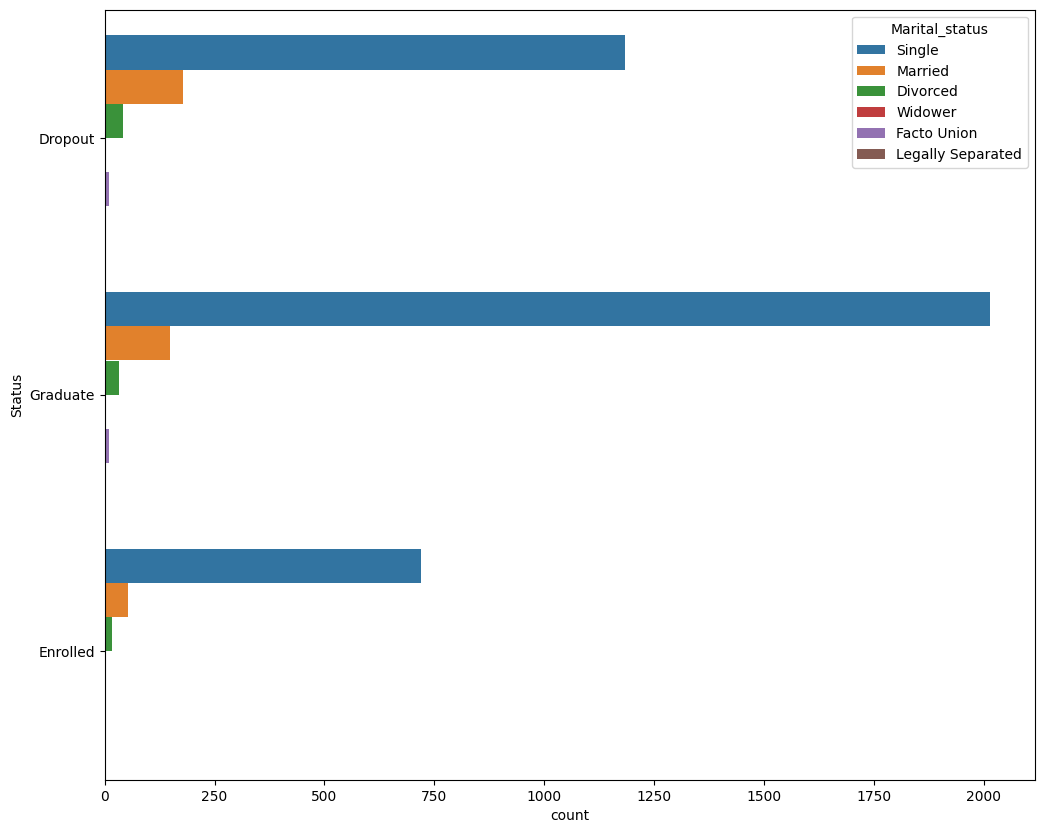

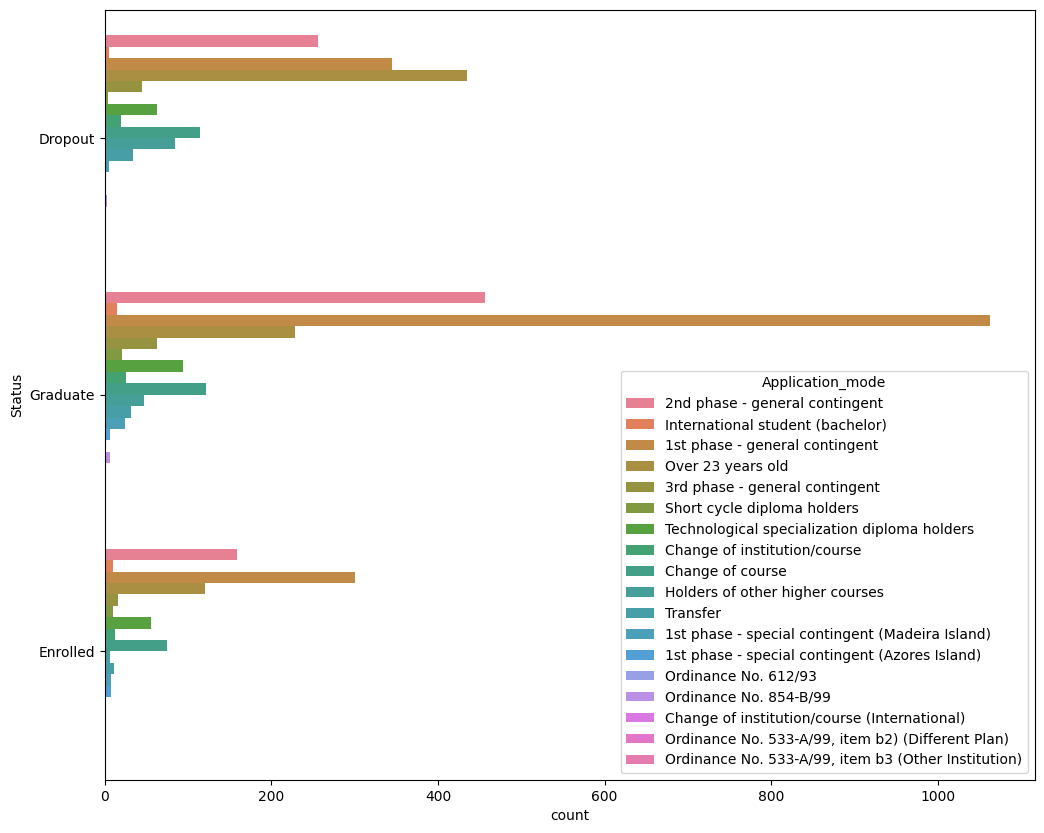

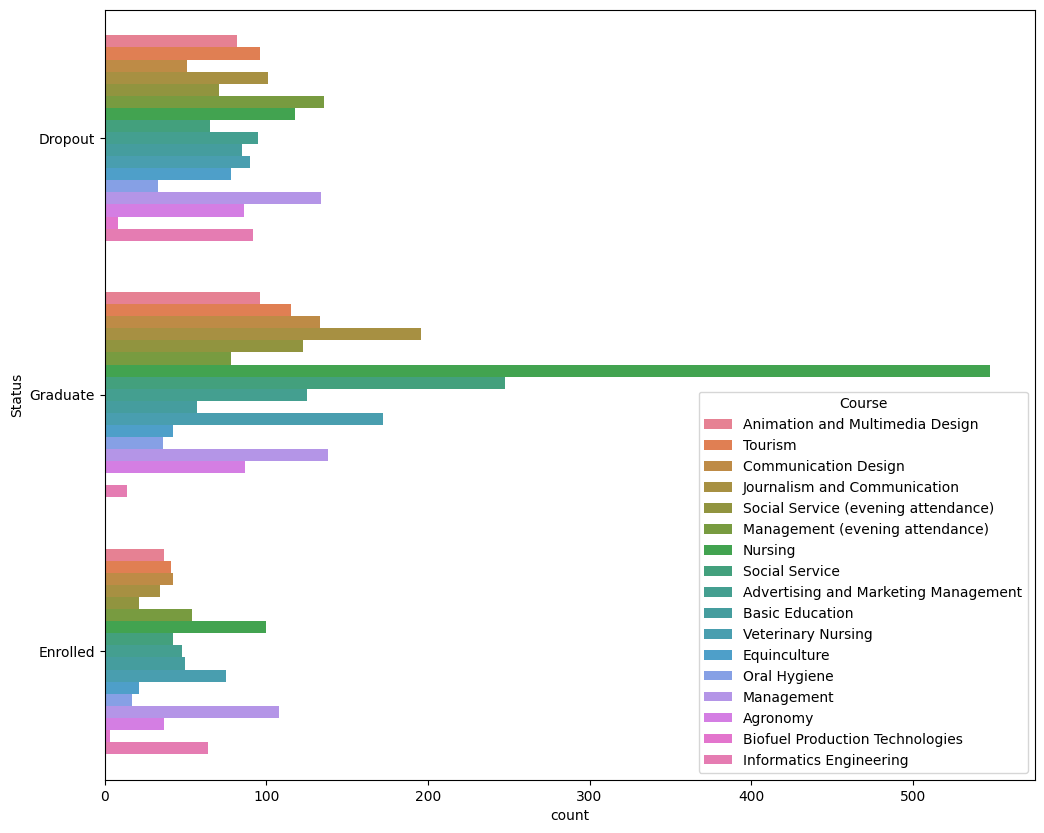

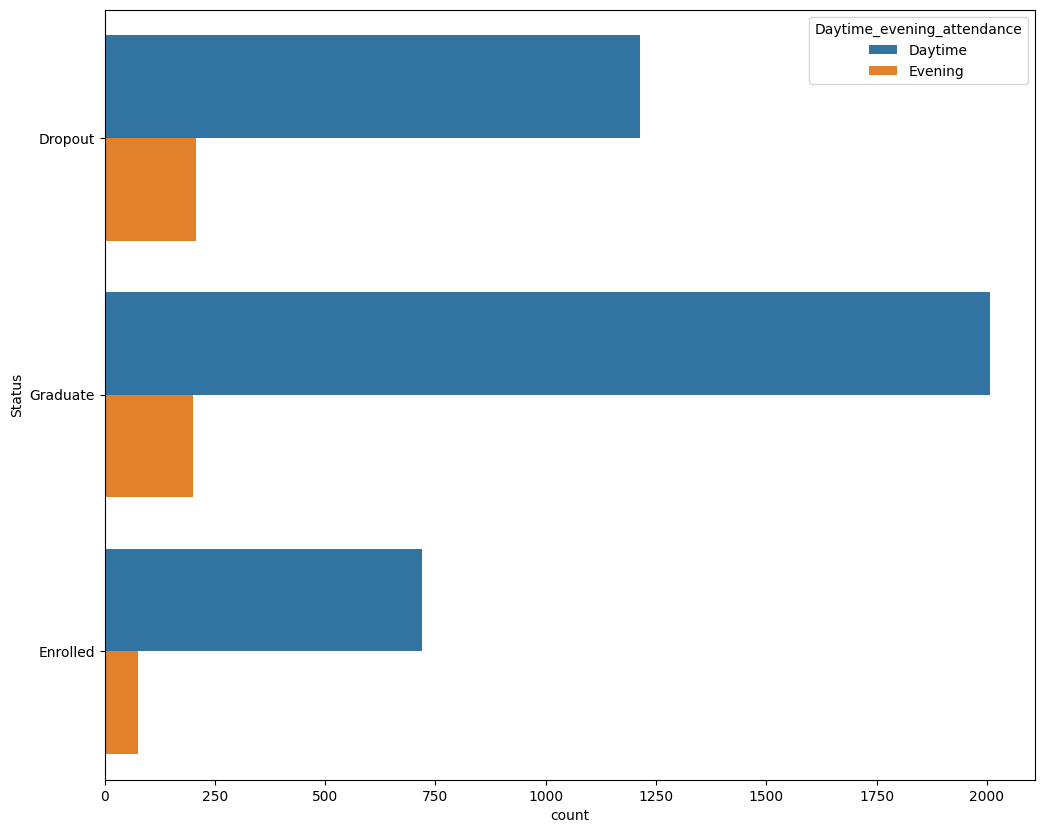

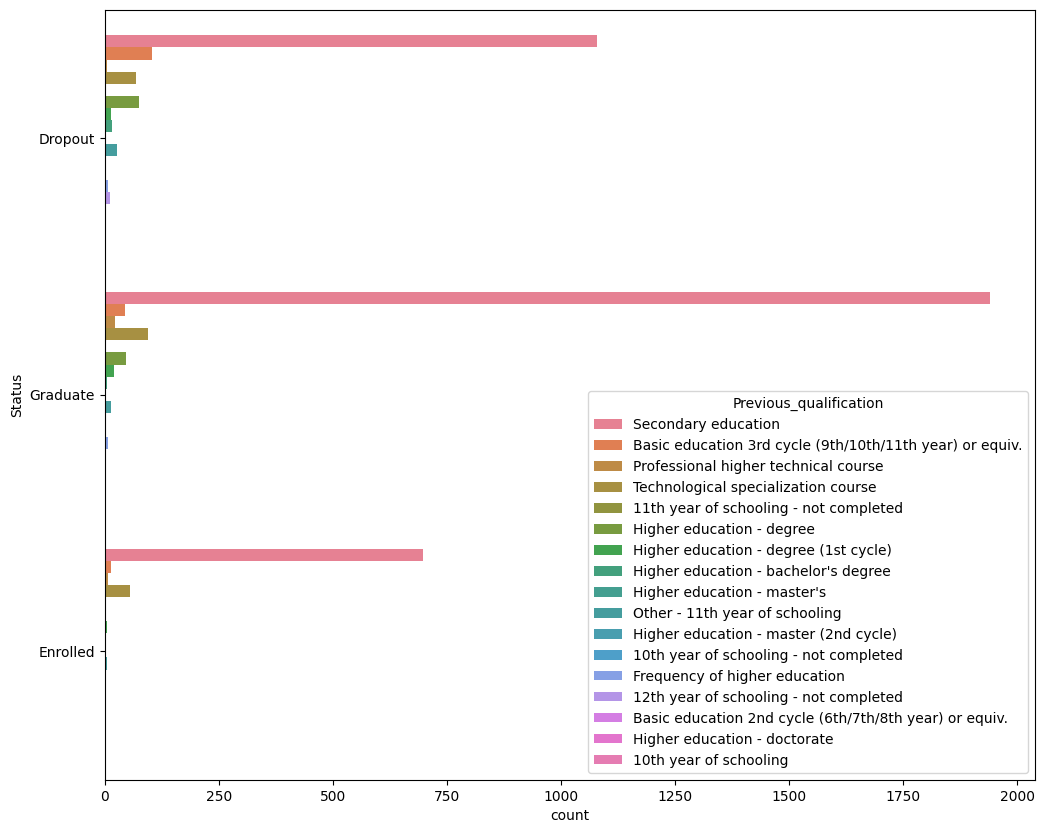

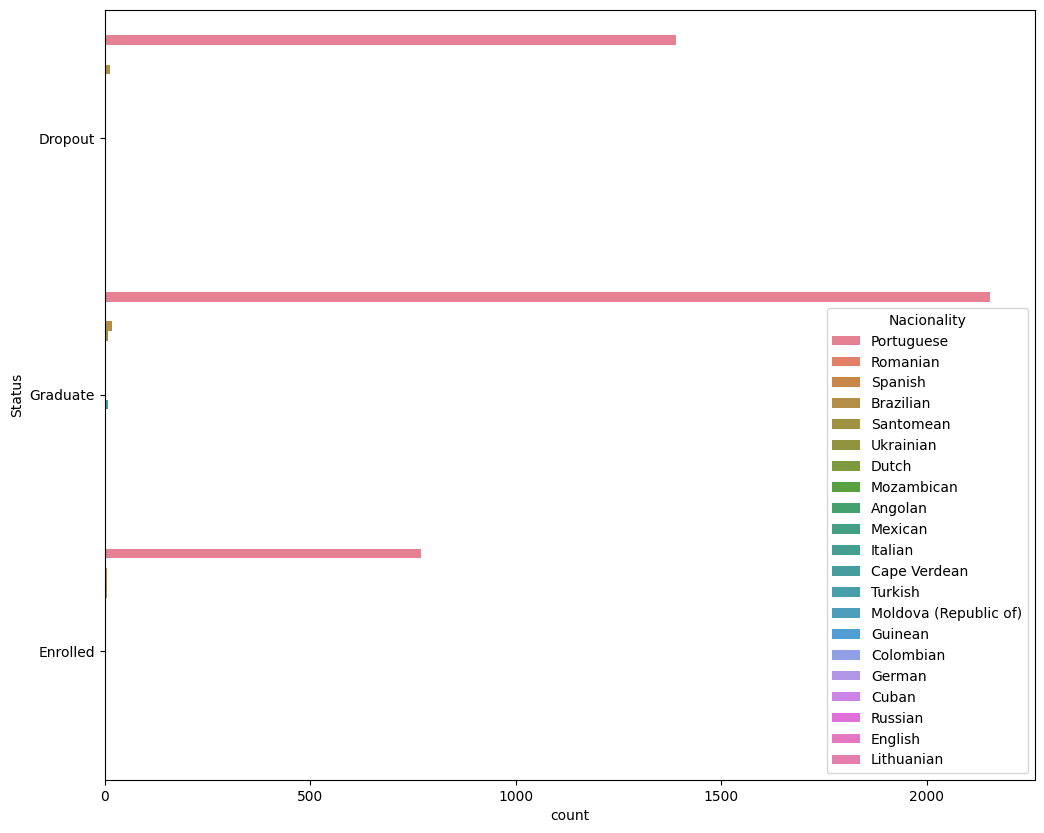

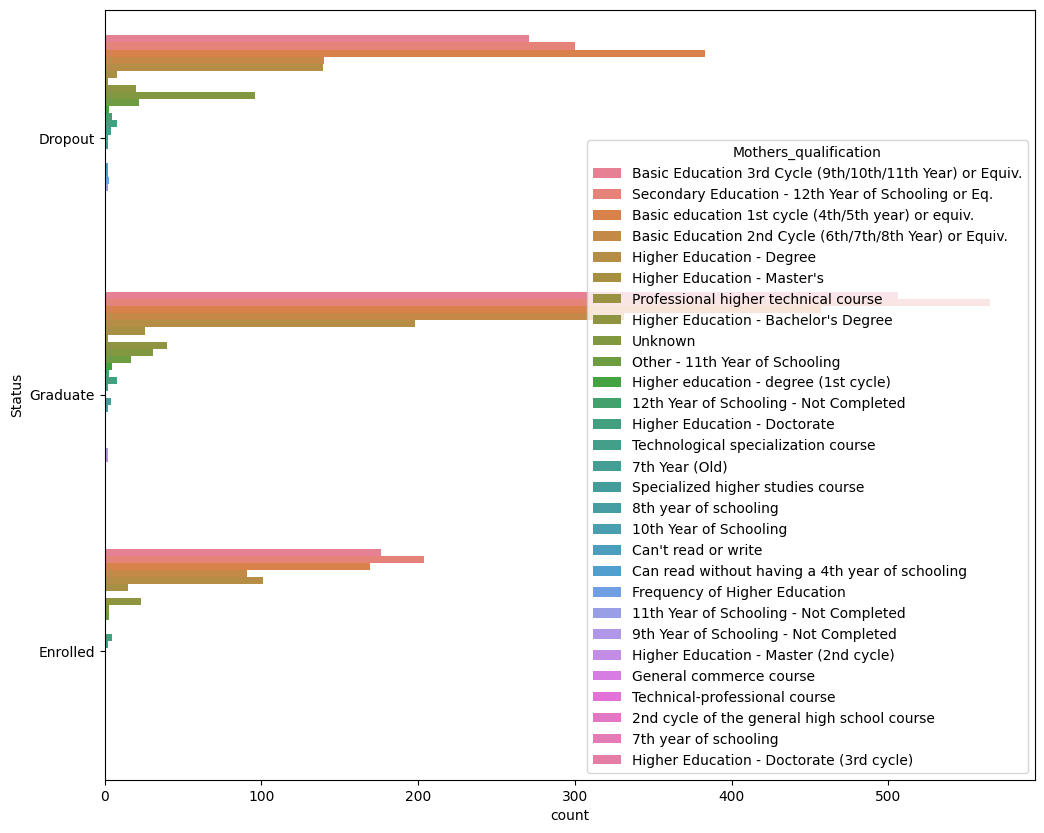

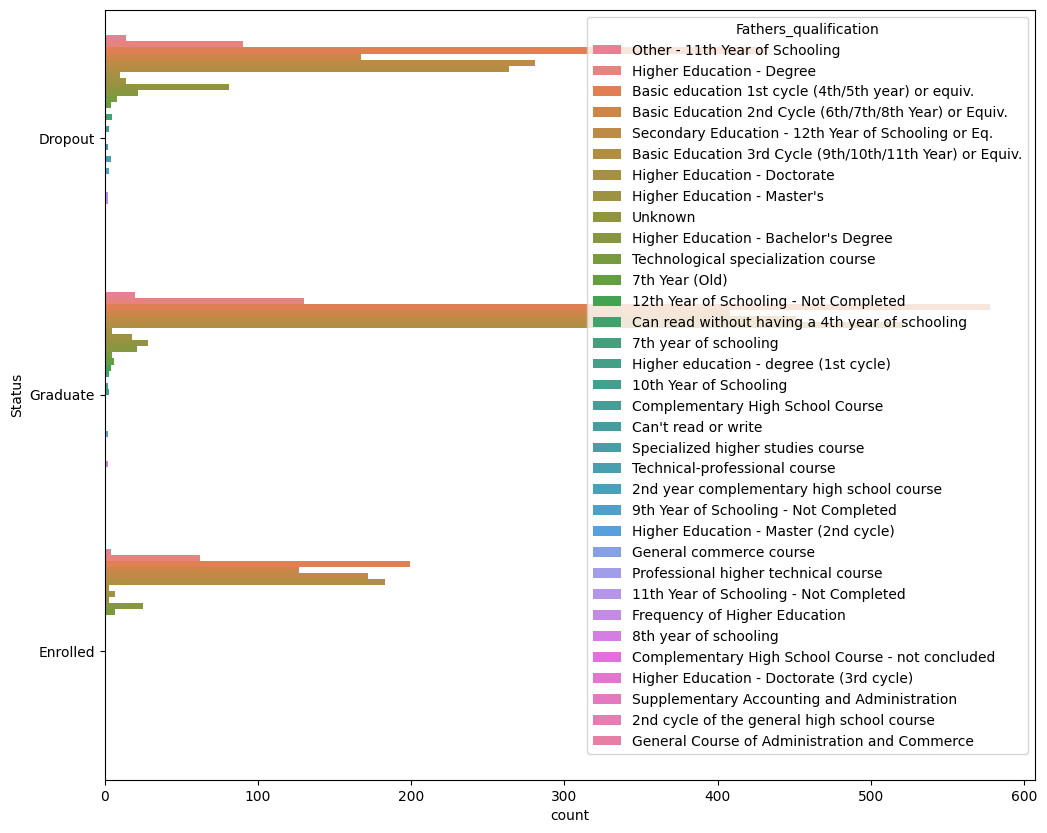

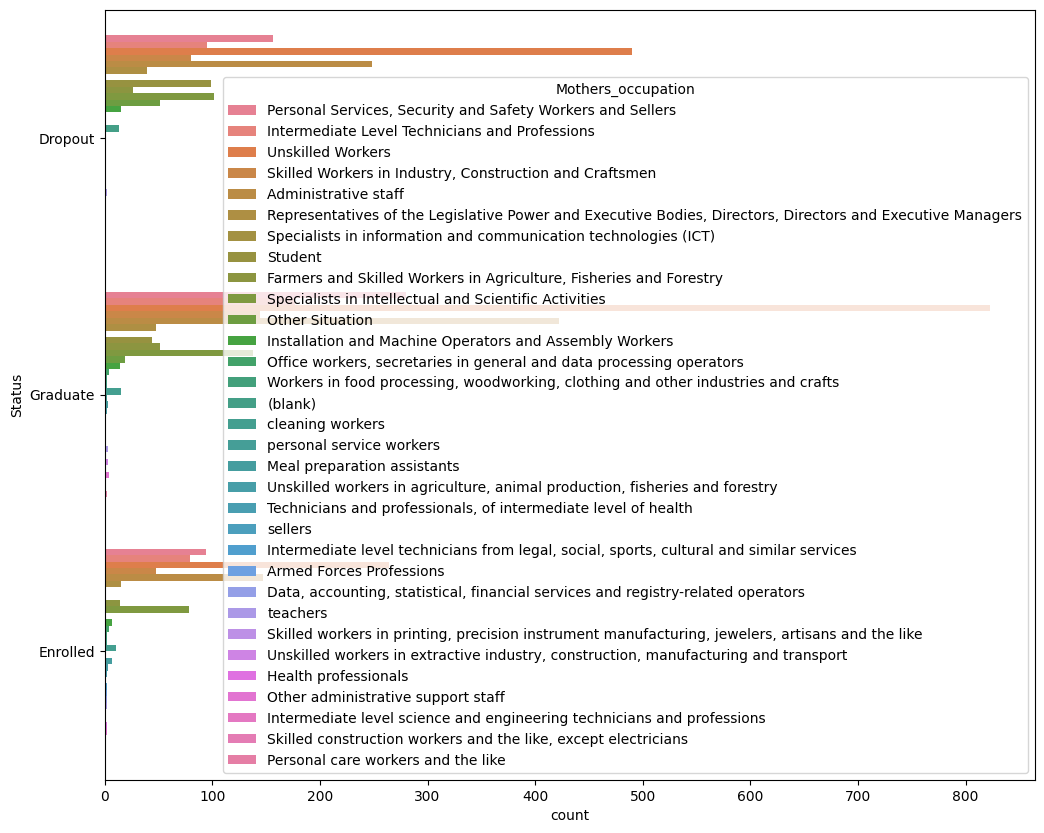

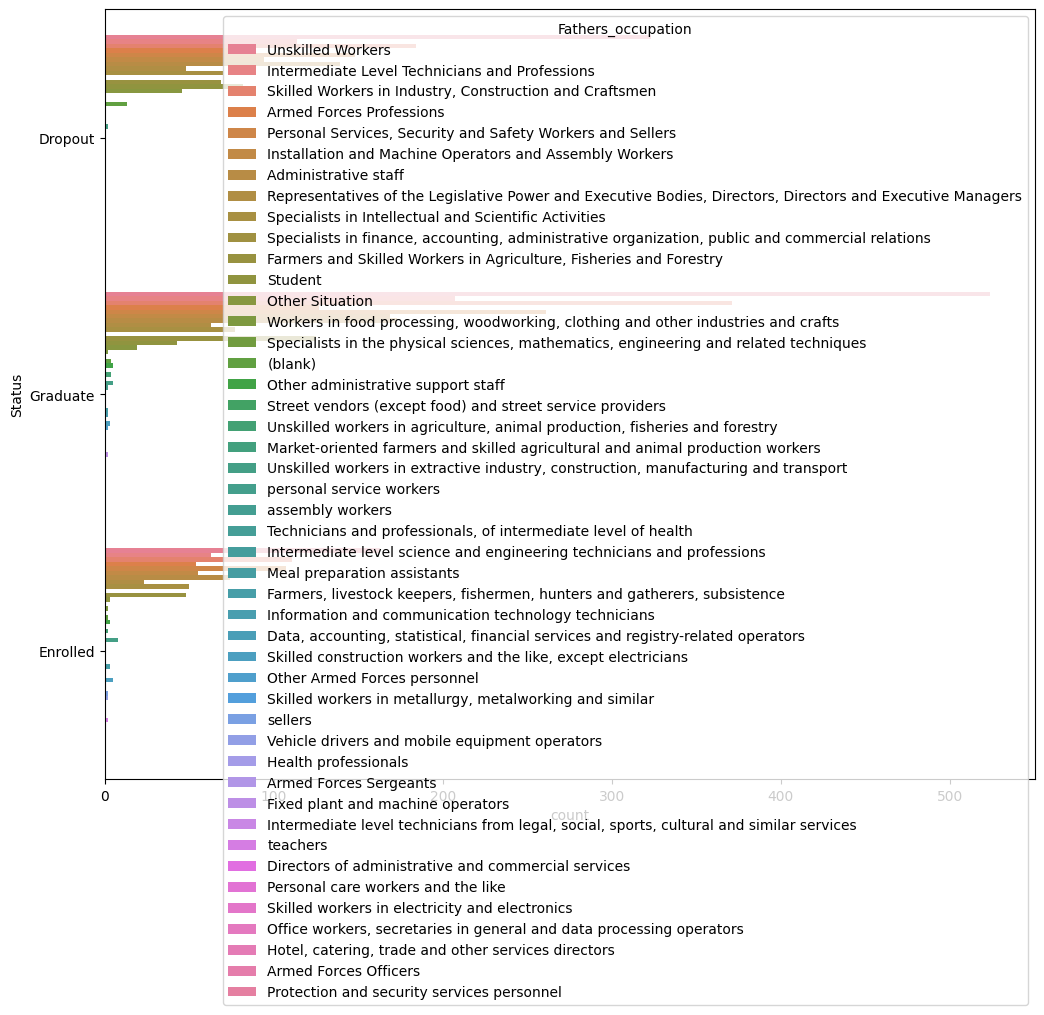

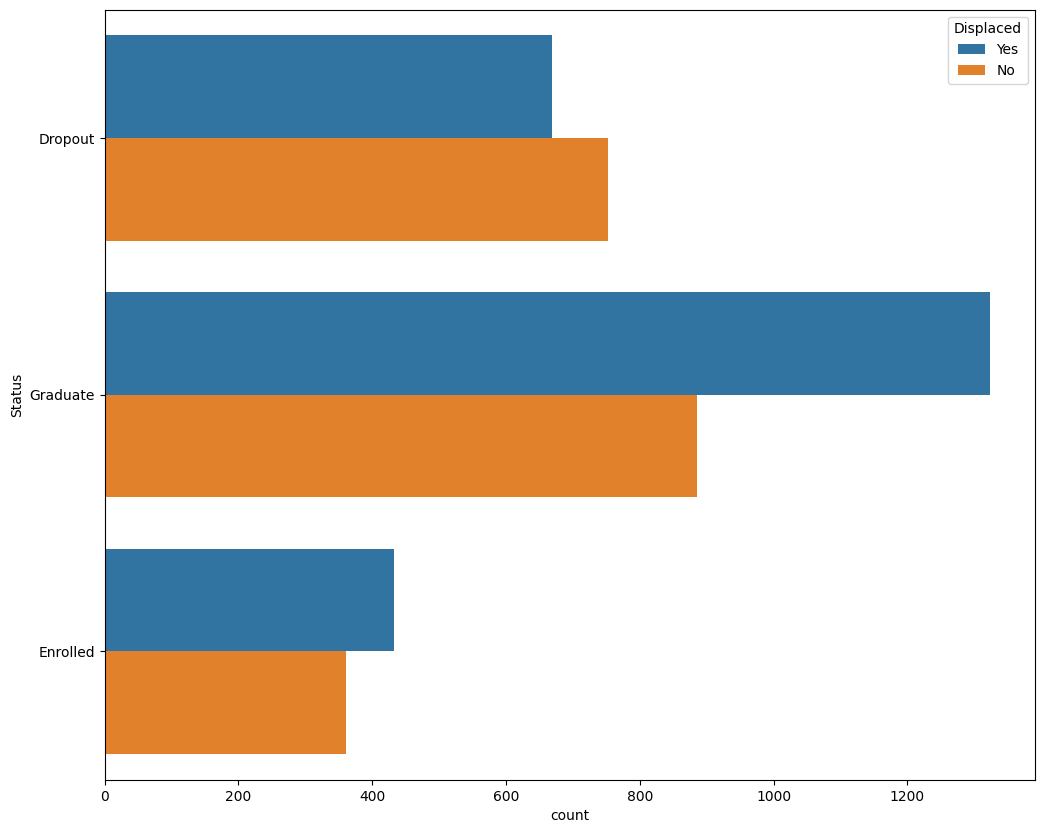

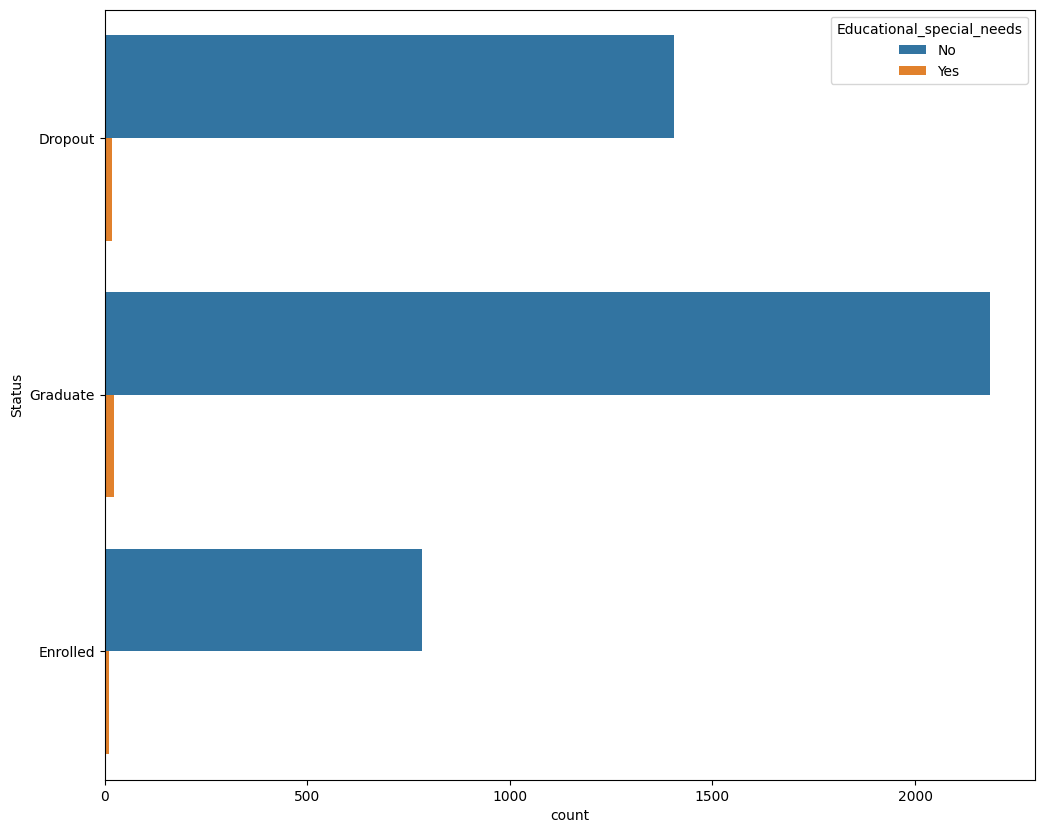

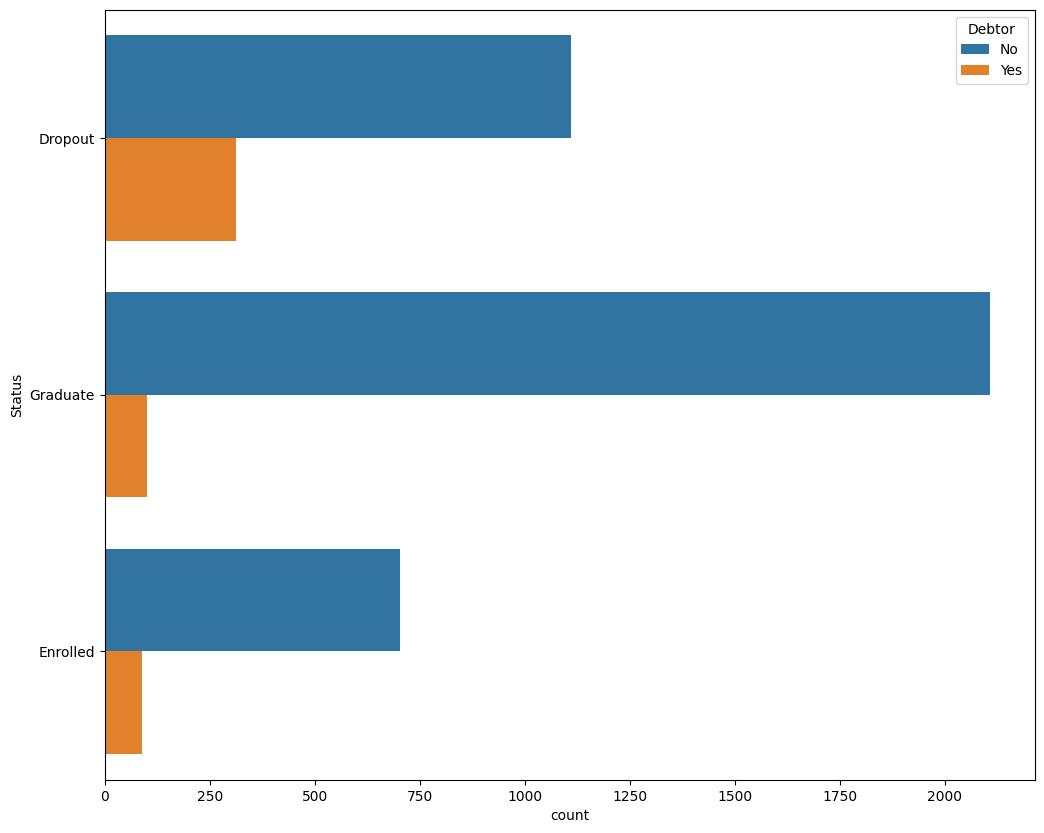

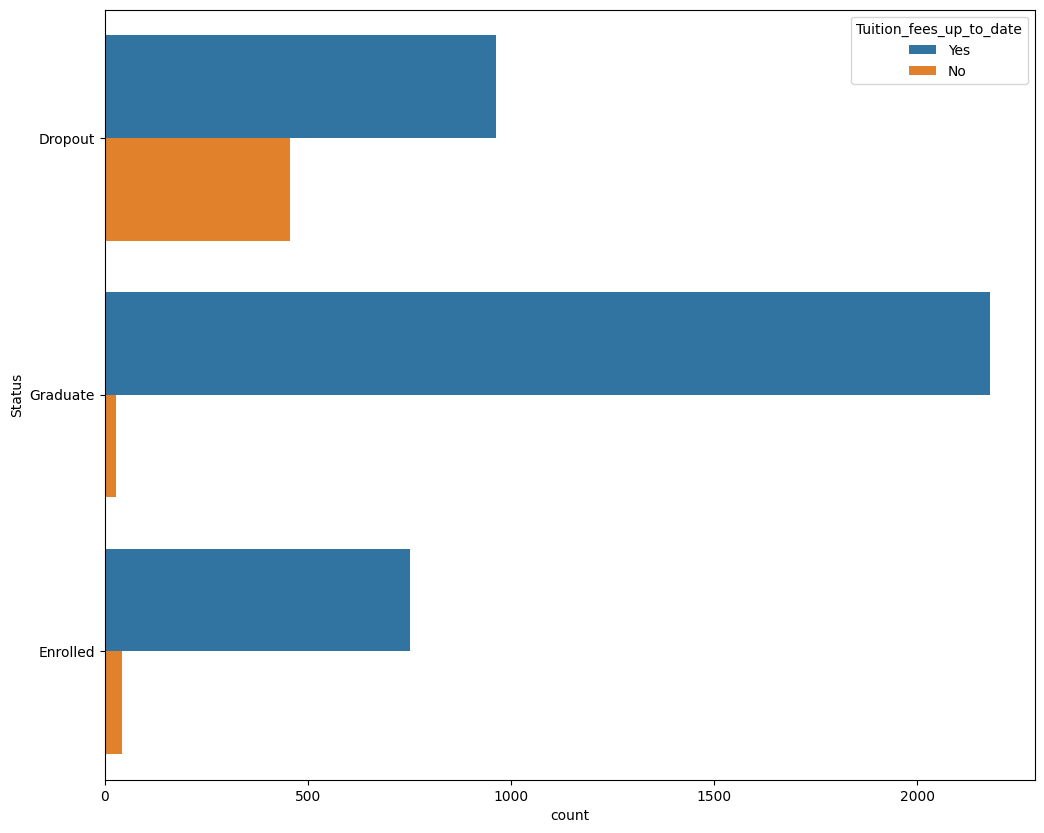

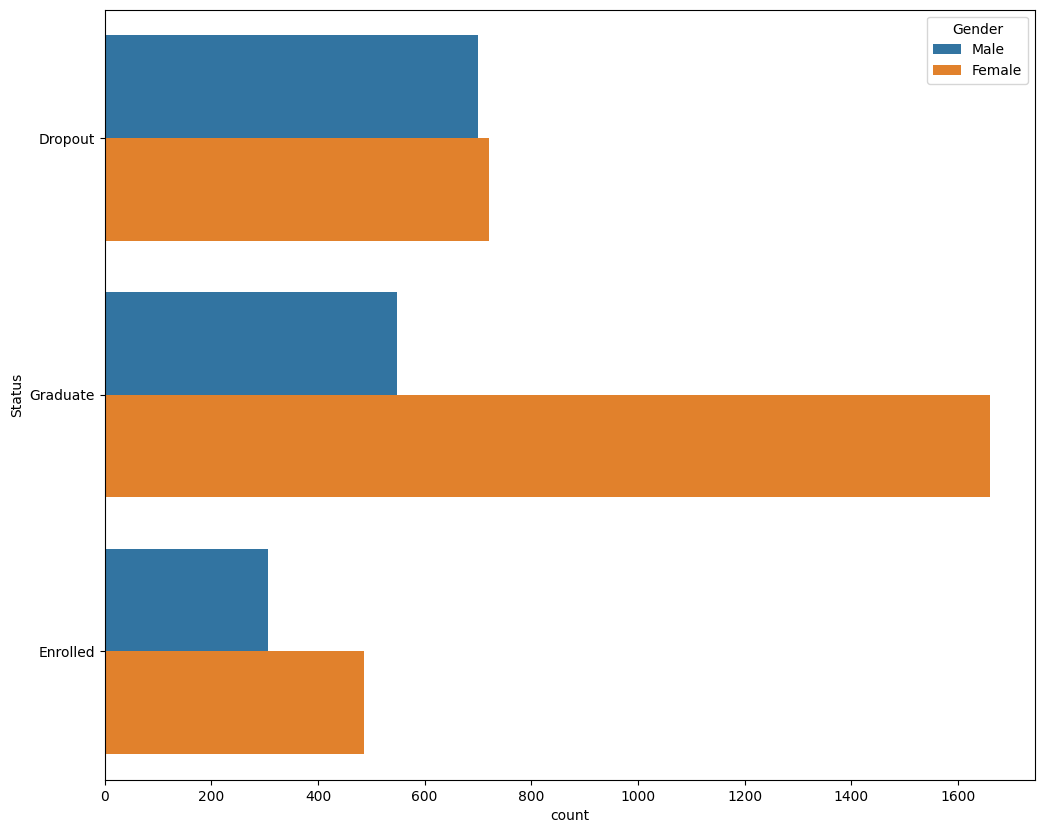

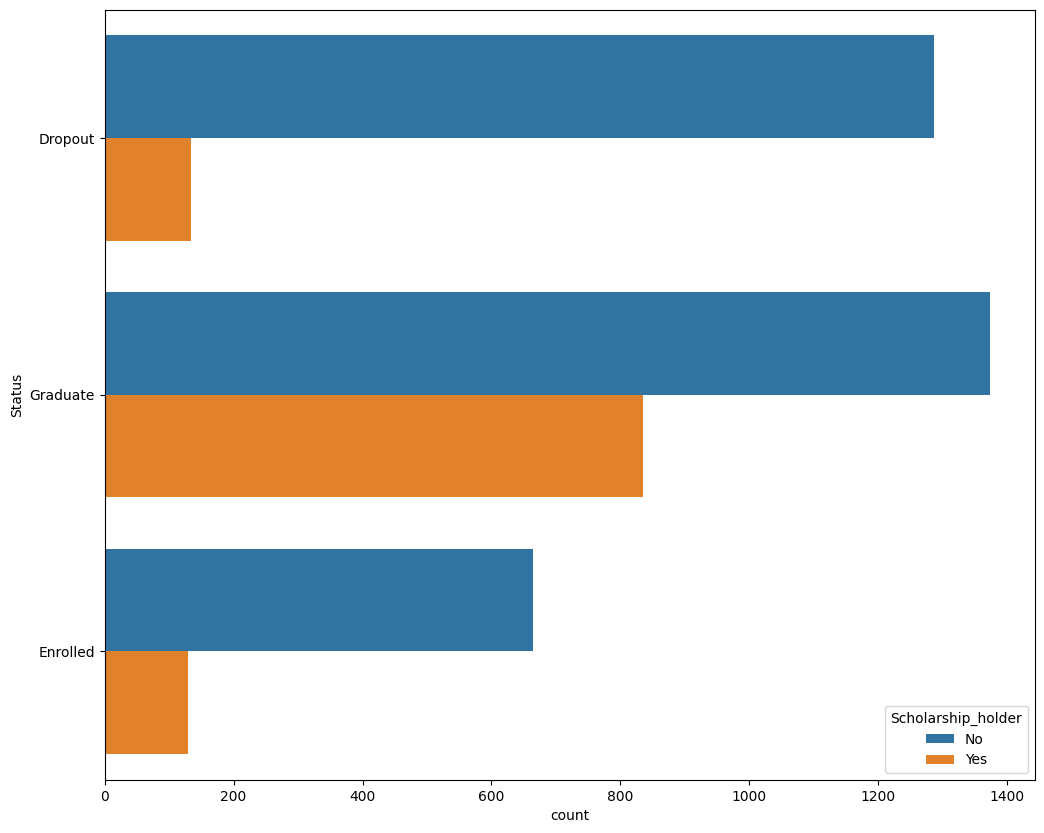

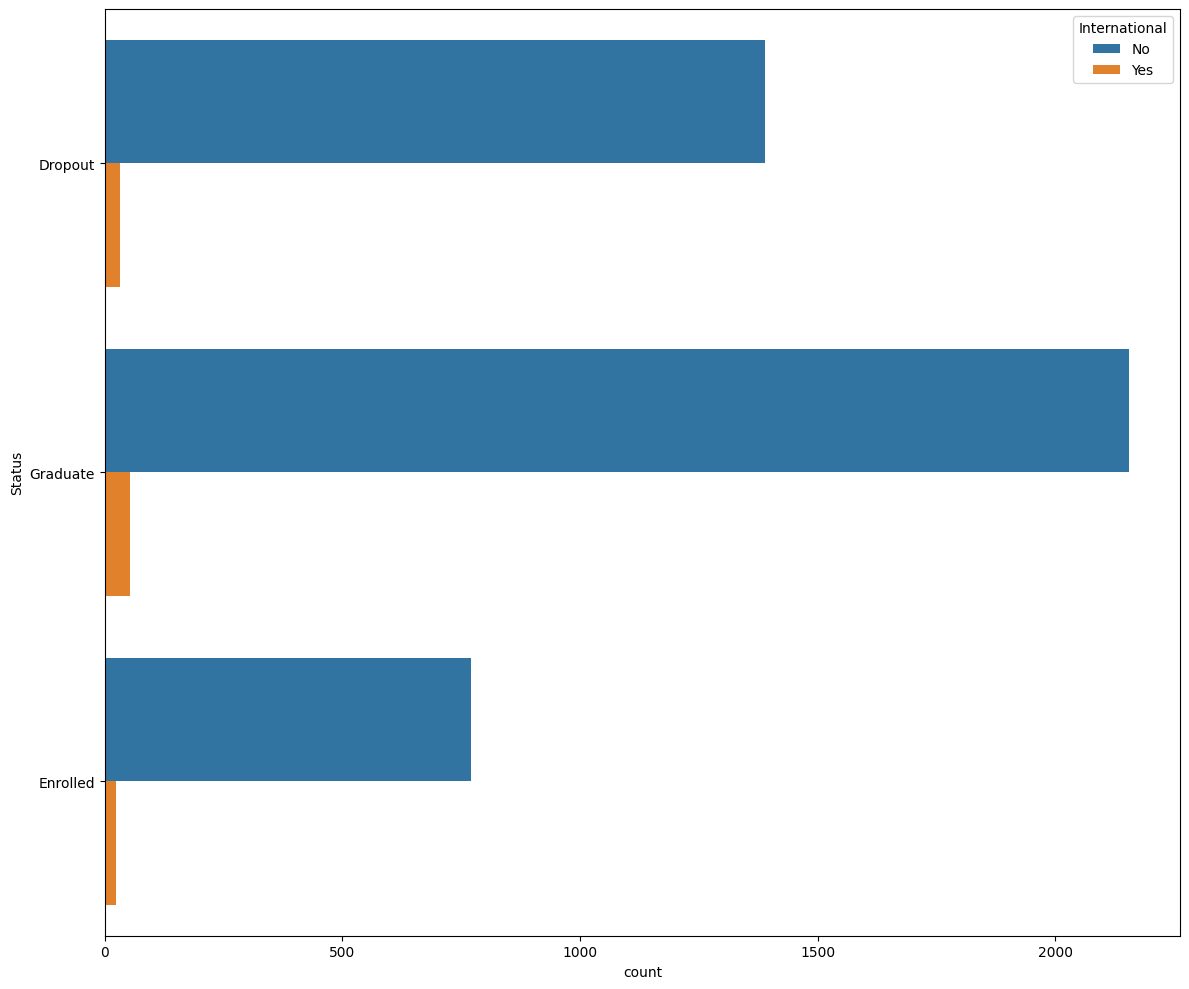

In [12]:
def categorical_plot(features, df, segment_feature=None):
    for feature in features:
        plt.figure(figsize=(12, 10))
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature)
        else:
            sns.countplot(data=df, x=feature)
    plt.tight_layout()
    plt.show()
 
categorical_plot(
    features=categorical_columns[:-1],
    df=modified_df,
    segment_feature="Status"
)

* Mahasiswa yang *Dropout* adalah mereka yang mendaftar melalui jalur khusus untuk usia di atas 23 tahun (`Application_mode (Over 23 years old)`), mengambil jurusan Manajemen (kelas malam) (`Course (Management (evening attendance))`), memiliki ibu dengan pendidikan dasar siklus pertama (setara kelas 4/5) (`Mothers_qualification (Basic education 1st cycle (4th/5th year) or equivalent)`), dan tidak berpindah tempat tinggal (`Displaced (No)`).

* Mahasiswa yang lulus/*Graduate* adalah mereka yang mendaftar pada fase pertama dengan kontingen umum (`Application_mode (1st phase - general contingent)`), mengambil jurusan Keperawatan (`Course (Nursing)`), memiliki ibu dengan pendidikan menengah (setara kelas 12) (`Mothers_qualification (Secondary education - 12th Year of Schooling or Equivalent)`), dan berpindah tempat tinggal (`Displaced (Yes)`).

* Tidak terdapat pola menarik pada variabel-variabel `Marital_status`, `Daytime_evening_attendance`, `Previous_qualification`, `Nacionality`, `Fathers_qualification`, `Mothers_occupation`, `Fathers_occupation`, `Educational_special_needs`, `Debtor`, `Tuition_fees_up_to_date`, `Gender`, `Scholarship_holder`,` international`.

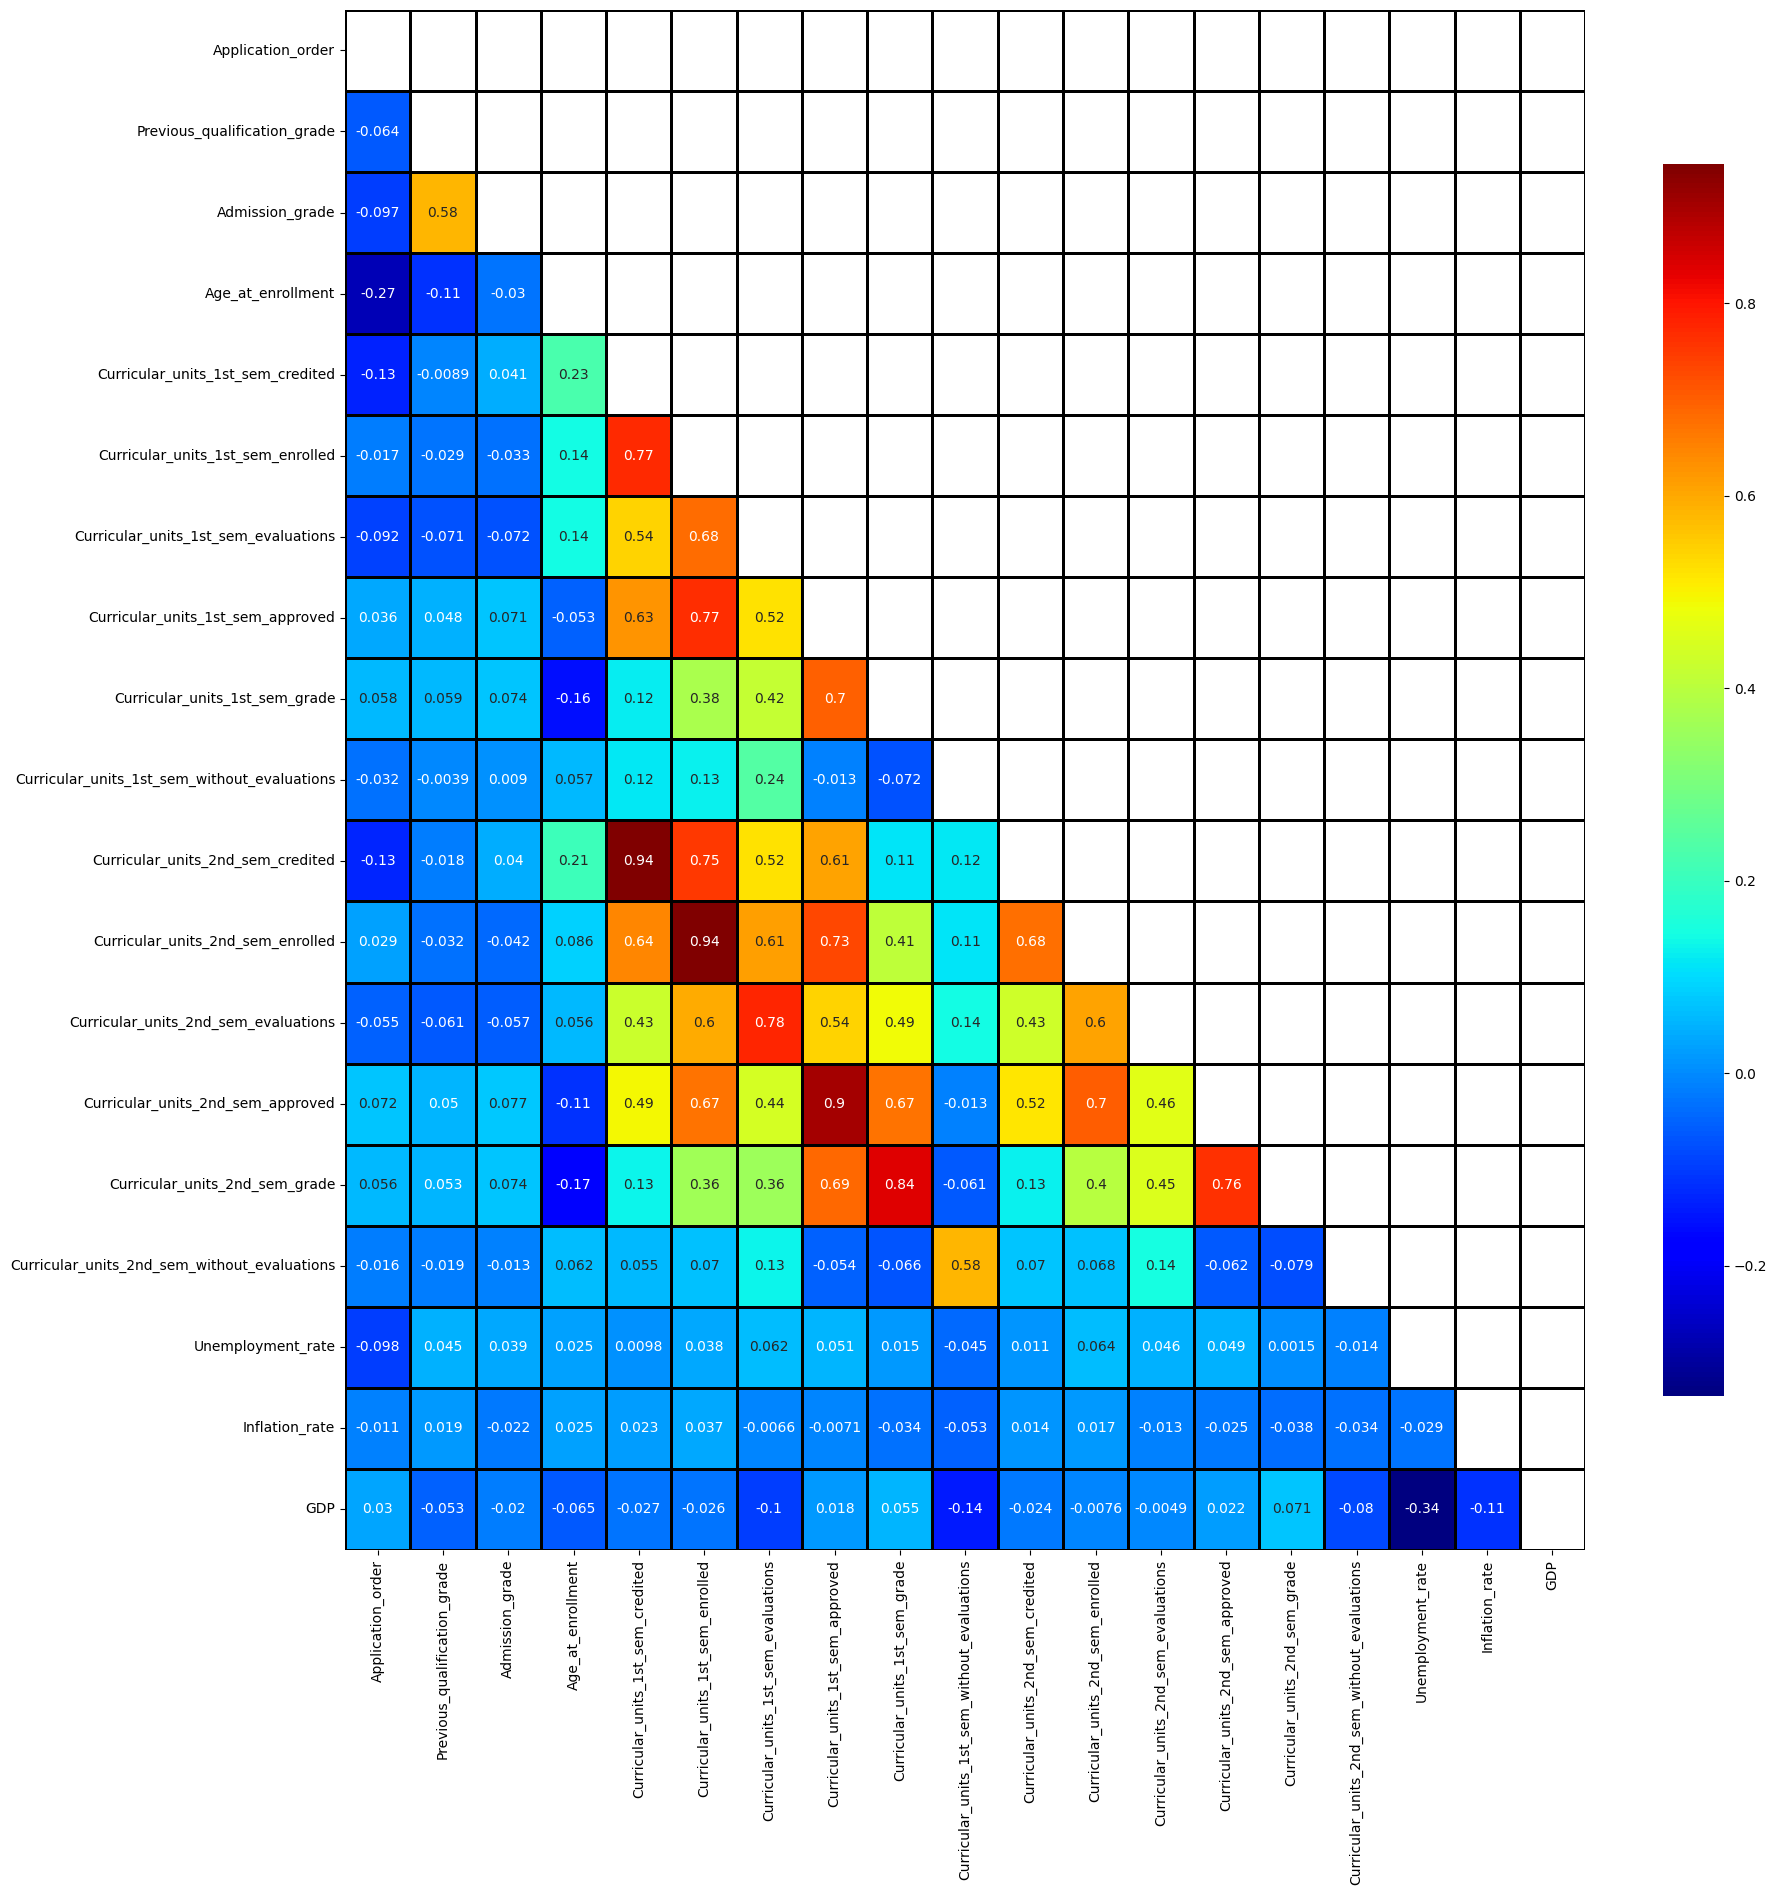

In [13]:
corr = modified_df[numerical_columns].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=mask, annot=True, cmap='jet', linecolor='black', linewidth=1, cbar_kws={"shrink": .8})
plt.show()

In [14]:
corr_matrix = modified_df[numerical_columns].corr()

corr_pairs = corr_matrix.unstack()

filtered_corr_pairs = corr_pairs[(corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1))].drop_duplicates()

sorted_corr_pairs = filtered_corr_pairs.sort_values(ascending=False)

sorted_corr_df = sorted_corr_pairs.reset_index()
sorted_corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

In [15]:
filtered_sorted_corr_df = sorted_corr_df[sorted_corr_df['Correlation'].abs() >= 0.5]
filtered_sorted_corr_df

Variable 1  \
0              Curricular_units_1st_sem_credited   
1              Curricular_units_1st_sem_enrolled   
2              Curricular_units_1st_sem_approved   
3                 Curricular_units_1st_sem_grade   
4           Curricular_units_1st_sem_evaluations   
5              Curricular_units_1st_sem_credited   
6              Curricular_units_1st_sem_enrolled   
7              Curricular_units_2nd_sem_approved   
8              Curricular_units_1st_sem_enrolled   
9              Curricular_units_1st_sem_approved   
10             Curricular_units_2nd_sem_enrolled   
11             Curricular_units_1st_sem_approved   
12             Curricular_units_1st_sem_approved   
13             Curricular_units_1st_sem_enrolled   
14             Curricular_units_2nd_sem_credited   
15             Curricular_units_1st_sem_enrolled   
16                Curricular_units_1st_sem_grade   
17             Curricular_units_1st_sem_credited   
18             Curricular_units_1st_sem_credited   
19          Curricular_units_1st_sem_evaluations   
20             Curricular_units_1st_sem_approved   
21             Curricular_units_2nd_sem_enrolled   
22             Curricular_units_1st_sem_enrolled   
23  Curricular_units_1st_sem_without_evaluations   
24                  Previous_qualification_grade   
25             Curricular_units_1st_sem_credited   
26             Curricular_units_1st_sem_approved   
27          Curricular_units_1st_sem_evaluations   
28          Curricular_units_1st_sem_evaluations   
29             Curricular_units_2nd_sem_credited   

                                      Variable 2  Correlation  
0              Curricular_units_2nd_sem_credited     0.944811  
1              Curricular_units_2nd_sem_enrolled     0.942627  
2              Curricular_units_2nd_sem_approved     0.904002  
3                 Curricular_units_2nd_sem_grade     0.837170  
4           Curricular_units_2nd_sem_evaluations     0.778863  
5              Curricular_units_1st_sem_enrolled     0.774344  
6              Curricular_units_1st_sem_approved     0.769083  
7                 Curricular_units_2nd_sem_grade     0.760804  
8              Curricular_units_2nd_sem_credited     0.753747  
9              Curricular_units_2nd_sem_enrolled     0.733772  
10             Curricular_units_2nd_sem_approved     0.703258  
11                Curricular_units_1st_sem_grade     0.696113  
12                Curricular_units_2nd_sem_grade     0.685560  
13          Curricular_units_1st_sem_evaluations     0.680220  
14             Curricular_units_2nd_sem_enrolled     0.676258  
15             Curricular_units_2nd_sem_approved     0.673341  
16             Curricular_units_2nd_sem_approved     0.673335  
17             Curricular_units_2nd_sem_enrolled     0.644826  
18             Curricular_units_1st_sem_approved     0.628394  
19             Curricular_units_2nd_sem_enrolled     0.611842  
20             Curricular_units_2nd_sem_credited     0.607661  
21          Curricular_units_2nd_sem_evaluations     0.604821  
22          Curricular_units_2nd_sem_evaluations     0.599567  
23  Curricular_units_2nd_sem_without_evaluations     0.583261  
24                               Admission_grade     0.580444  
25          Curricular_units_1st_sem_evaluations     0.542919  
26          Curricular_units_2nd_sem_evaluations     0.539934  
27             Curricular_units_1st_sem_approved     0.522396  
28             Curricular_units_2nd_sem_credited     0.522187  
29             Curricular_units_2nd_sem_approved     0.519081

Dataframe di atas menunjukkan 30 data dengan korelasi tertinggi yang minimum korelasinya adalah 0.5.

# **4. DATA PREPROCESSING**

## **4.1 Data Splitting**

In [16]:
new_modified_df = modified_df.drop(columns=["Marital_status", "Daytime_evening_attendance", 
                                            "Previous_qualification", "Nacionality", "Fathers_qualification", 
                                            "Mothers_occupation", "Fathers_occupation", 
                                            "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", 
                                            "Gender", "Scholarship_holder", "International",
                                            "Application_order", "Curricular_units_1st_sem_credited", 
                                            "Curricular_units_1st_sem_without_evaluations", 
                                            "Curricular_units_2nd_sem_credited", 
                                            "Curricular_units_2nd_sem_without_evaluations", 
                                            "Unemployment_rate", "Inflation_rate", 
                                            "GDP"], axis=1)
new_modified_df

Application_mode                               Course  \
0       2nd phase - general contingent      Animation and Multimedia Design   
1     International student (bachelor)                              Tourism   
2       1st phase - general contingent                 Communication Design   
3       2nd phase - general contingent         Journalism and Communication   
4                    Over 23 years old  Social Service (evening attendance)   
...                                ...                                  ...   
4419    1st phase - general contingent         Journalism and Communication   
4420    1st phase - general contingent         Journalism and Communication   
4421    1st phase - general contingent                              Nursing   
4422    1st phase - general contingent                           Management   
4423            Ordinance No. 854-B/99         Journalism and Communication   

      Previous_qualification_grade  \
0                            122.0   
1                            160.0   
2                            122.0   
3                            122.0   
4                            100.0   
...                            ...   
4419                         125.0   
4420                         120.0   
4421                         154.0   
4422                         180.0   
4423                         152.0   

                                  Mothers_qualification  Admission_grade  \
0     Basic Education 3rd Cycle (9th/10th/11th Year)...            127.3   
1     Secondary Education - 12th Year of Schooling o...            142.5   
2     Basic education 1st cycle (4th/5th year) or eq...            124.8   
3     Basic Education 2nd Cycle (6th/7th/8th Year) o...            119.6   
4     Basic education 1st cycle (4th/5th year) or eq...            141.5   
...                                                 ...              ...   
4419  Secondary Education - 12th Year of Schooling o...            122.2   
4420  Secondary Education - 12th Year of Schooling o...            119.0   
4421  Basic education 1st cycle (4th/5th year) or eq...            149.5   
4422  Basic education 1st cycle (4th/5th year) or eq...            153.8   
4423  Basic Education 2nd Cycle (6th/7th/8th Year) o...            152.0   

     Displaced  Age_at_enrollment  Curricular_units_1st_sem_enrolled  \
0          Yes                 20                                  0   
1          Yes                 19                                  6   
2          Yes                 19                                  6   
3          Yes                 20                                  6   
4           No                 45                                  6   
...        ...                ...                                ...   
4419        No                 19                                  6   
4420       Yes                 18                                  6   
4421       Yes                 30                                  7   
4422       Yes                 20                                  5   
4423       Yes                 22                                  6   

      Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
0                                        0                                  0   
1                                        6                                  6   
2                                        0                                  0   
3                                        8                                  6   
4                                        9                                  5   
...                                    ...                                ...   
4419                                     7                                  5   
4420                                     6                                  6   
4421                                     8                                  7   
4422                        

In [17]:
train_df, test_df = train_test_split(new_modified_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3539, 16)
(885, 16)


## **4.2 Handling Imbalanced Data**

In [18]:
train_df["Status"].value_counts()

Status
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64

In [19]:
df_majority_1 = train_df[(train_df["Status"] == "Graduate")]
df_majority_2 = train_df[(train_df["Status"] == "Dropout")]
df_minority = train_df[(train_df["Status"] == "Enrolled")]

In [20]:
df_majority_2_oversampled = resample(df_majority_2, n_samples=1791, random_state=42)
df_minority_oversampled  = resample(df_minority, n_samples=1791, random_state=42)

In [21]:
oversampled_train_df = pd.concat([df_majority_1, df_majority_2_oversampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_oversampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)

In [22]:
oversampled_train_df

Application_mode                           Course  \
0     2nd phase - general contingent                   Social Service   
1     1st phase - general contingent               Veterinary Nursing   
2     1st phase - general contingent                  Basic Education   
3                   Change of course                          Nursing   
4                  Over 23 years old  Management (evening attendance)   
...                              ...                              ...   
5368                        Transfer                     Oral Hygiene   
5369  1st phase - general contingent                     Equinculture   
5370  1st phase - general contingent                          Tourism   
5371  1st phase - general contingent             Communication Design   
5372  1st phase - general contingent  Animation and Multimedia Design   

      Previous_qualification_grade  \
0                            138.0   
1                            101.0   
2                            133.0   
3                            136.0   
4                            147.0   
...                            ...   
5368                         110.0   
5369                         130.0   
5370                         125.0   
5371                         110.0   
5372                         141.0   

                                  Mothers_qualification  Admission_grade  \
0     Basic education 1st cycle (4th/5th year) or eq...            134.2   
1     Basic education 1st cycle (4th/5th year) or eq...            101.0   
2     Basic Education 3rd Cycle (9th/10th/11th Year)...            130.2   
3     Basic Education 3rd Cycle (9th/10th/11th Year)...            118.4   
4     Basic Education 3rd Cycle (9th/10th/11th Year)...            147.9   
...                                                 ...              ...   
5368  Basic education 1st cycle (4th/5th year) or eq...            140.0   
5369               Higher Education - Bachelor's Degree            117.6   
5370  Secondary Education - 12th Year of Schooling o...            121.5   
5371  Basic education 1st cycle (4th/5th year) or eq...            107.6   
5372  Secondary Education - 12th Year of Schooling o...            136.8   

     Displaced  Age_at_enrollment  Curricular_units_1st_sem_enrolled  \
0          Yes                 18                                  6   
1          Yes                 22                                  6   
2          Yes                 19                                  6   
3          Yes                 21                                  7   
4           No                 28                                  5   
...        ...                ...                                ...   
5368        No                 43                                  7   
5369        No                 19                                  5   
5370       Yes                 18                                  6   
5371       Yes                 22                                  6   
5372       Yes                 18                                  0   

      Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
0                                        6                                  6   
1                                        9                                  5   
2                                        6                                  0   
3                                       12                                  4   
4                                        8                                  4   
...                                    ...                                ...   
5368                                     7                                  0   
5369                                    14                                  2   
5370                                    12                                  5   
5371                                     6                                  6   
5372             

In [23]:
oversampled_train_df["Status"].value_counts()

Status
Graduate    1791
Enrolled    1791
Dropout     1791
Name: count, dtype: int64

## **4.3 Data Transformation**

In [24]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]
 
X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [25]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = StandardScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = StandardScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df
 
def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
            
            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [26]:
numerical_columns = [
    'Age_at_enrollment', 
    'Previous_qualification_grade', 
    'Admission_grade', 
    'Curricular_units_1st_sem_evaluations', 
    'Curricular_units_1st_sem_approved', 
    'Curricular_units_1st_sem_grade', 
    'Curricular_units_2nd_sem_evaluations', 
    'Curricular_units_2nd_sem_approved', 
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_enrolled', 
    'Curricular_units_2nd_sem_enrolled'
]
 
categorical_columns = [
    'Application_mode',
    'Mothers_qualification',
    'Course',
    'Displaced'
]

In [27]:
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

In [28]:
combined_df = pd.concat([new_train_df, new_test_df], axis=0)

combined_df = encoding(categorical_columns, combined_df)

new_train_df = combined_df.iloc[:len(new_train_df)]
new_test_df = combined_df.iloc[len(new_train_df):]

In [29]:
new_train_df.shape, new_test_df.shape

((5373, 15), (885, 15))

In [30]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")
 
new_y_test = encoder.transform(y_test)

## **4.4 Dimensionality Reduction**

In [31]:
pca_numerical_columns = ['Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 
                           'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_evaluations', 
                           'Previous_qualification_grade',
                           'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 
                           'Curricular_units_2nd_sem_evaluations', 
                           'Curricular_units_2nd_sem_enrolled', 'Admission_grade']

Variabel-variabel yang diterapkan PCA/*dimensionality reduction* adalah variabel-variabel yang bersifat multikolinieritas jika diamati berdasarkan *correlation heatmap* yang ada di step *Data Understanding*.

In [32]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

In [33]:
train_pca_df

Application_mode  Course  Previous_qualification_grade  \
0                    3      13                      0.439482   
1                    0      16                     -2.340294   
2                    0       3                      0.063837   
3                    5      11                      0.289224   
4                   14      10                      1.115644   
...                ...     ...                           ...   
5368                17      12                     -1.664132   
5369                 0       6                     -0.161551   
5370                 0      15                     -0.537196   
5371                 0       5                     -1.664132   
5372                 0       2                      0.664869   

      Mothers_qualification  Admission_grade  Displaced  Age_at_enrollment  \
0                         9         0.550014          1          -0.728993   
1                         9        -1.713717          1          -0.202177   
2                         8         0.277275          1          -0.597289   
3                         8        -0.527304          1          -0.333881   
4                         8         1.484144          0           0.588048   
...                     ...              ...        ...                ...   
5368                      9         0.945485          0           2.563611   
5369                     14        -0.581851          0          -0.597289   
5370                     23        -0.315931          1          -0.728993   
5371                      9        -1.263698          1          -0.202177   
5372                     23         0.727294          1          -0.728993   

      Curricular_units_1st_sem_enrolled  Curricular_units_1st_sem_evaluations  \
0                             -0.048223                             -0.561369   
1                             -0.048223                              0.143249   
2                             -0.048223                             -0.561369   
3                              0.372398                              0.847867   
4                             -0.468844                             -0.091624   
...                                 ...                                   ...   
5368                           0.372398                             -0.326496   
5369                          -0.468844                              1.317613   
5370                          -0.048223                              0.847867   
5371                          -0.048223                             -0.561369   
5372                          -2.571946                             -1.970605   

      Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                              0.549832                        0.989861   
1                              0.215792                        0.618269   
2                             -1.454406                       -2.084218   
3                             -0.118247                        0.576042   
4                             -0.118247                        0.246677   
...                                 ...                             ...   
5368                          -1.454406                       -2.084218   
5369                          -0.786327                        0.246677   
5370                           0.215792                        0.145334   
5371                           0.549832                        0.280458   
5372                          -1.454406                       -2.084218   

      Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                             -0.040910                             -0.289923   
1                             -0.040910                              2.142169   
2                             -0.040910                             -1.992387   
3                              0.429776                             -0.046714   
4                    

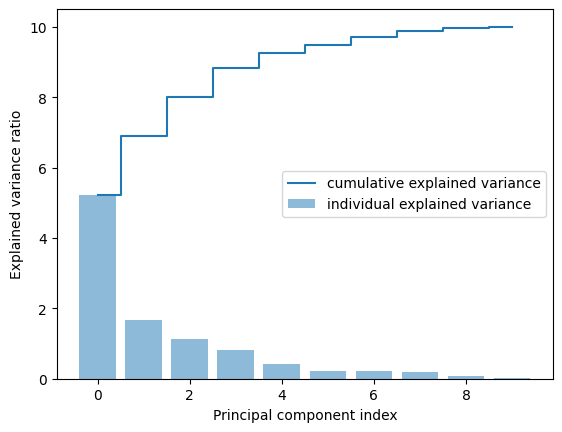

In [34]:
pca = PCA(n_components=len(pca_numerical_columns), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns])
 
eigenvalues = pca.explained_variance_.round(3)
cum_eigenvalues = np.cumsum(eigenvalues)
 
plt.bar(range(len(pca_numerical_columns)), eigenvalues, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns)), cum_eigenvalues, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [35]:
eigenvalues_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalue': eigenvalues
})

eigenvalues_df

Principal Component  Eigenvalue
0                 PC1       5.216
1                 PC2       1.668
2                 PC3       1.119
3                 PC4       0.816
4                 PC5       0.429
5                 PC6       0.230
6                 PC7       0.224
7                 PC8       0.180
8                 PC9       0.089
9                PC10       0.030

Karena *eigenvalue* yang lebih dari 1 ada dari PC1 sampai PC3, maka dapat ditarik kesimpulan bahwa kompinen yang terpilih adalah sebanyak 3 komponen.

In [36]:
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(train_pca_df[pca_numerical_columns])
loadings = fa.loadings_

# Apply Varimax rotation
rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(loadings)

rotated_component_matrix_df = pd.DataFrame(rotated_loadings, index=pca_numerical_columns, 
                                           columns=[f'PC{i+1}' for i in range(rotated_loadings.shape[1])])

rotated_component_matrix_df

PC1       PC2       PC3
Curricular_units_1st_sem_enrolled     0.975263 -0.010918 -0.190310
Curricular_units_1st_sem_approved     0.604861  0.095844 -0.660742
Curricular_units_1st_sem_grade        0.261983  0.027385 -0.824297
Curricular_units_1st_sem_evaluations  0.637286 -0.135911 -0.309049
Previous_qualification_grade         -0.044129  0.723482 -0.015192
Curricular_units_2nd_sem_approved     0.513530  0.092445 -0.695246
Curricular_units_2nd_sem_grade        0.194406  0.012452 -0.921036
Curricular_units_2nd_sem_evaluations  0.572415 -0.130558 -0.394980
Curricular_units_2nd_sem_enrolled     0.892213 -0.015520 -0.238696
Admission_grade                      -0.046859  0.762862 -0.043279

Diketahui pada *Rotated Component Matrix* di atas bahwa:

* Variabel `Curricular_units_1st_sem_enrolled` memiliki bobot yang terbesar untuk faktor `PC1`, yang berarti faktor `PC1` sangat dipengaruhi oleh jumlah unit kurikuler yang diambil oleh mahasiswa pada semester pertama.

* Variabel `Admission_grade` memiliki bobot yang terbesar untuk faktor `PC2`, yang berarti faktor `PC2` sangat dipengaruhi oleh nilai masuknya mahasiswa ke suatu perguruan tinggi.

* Variabel `Curricular_units_2nd_sem_grade` memiliki bobot yang terbesar untuk faktor `PC3`, yang berarti faktor `PC3` sangat dipengaruhi oleh nilai unit kurikuler mahasiswa pada semester kedua dalam arah yang berlawanan.

In [37]:
pca = PCA(n_components=3, random_state=123)
pca.fit(train_pca_df[pca_numerical_columns])
joblib.dump(pca, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca.transform(train_pca_df[pca_numerical_columns])
train_pca_df[["pc_1", "pc_2", "pc_3"]] = pd.DataFrame(princ_comp_1, columns=["pc_1", "pc_2", "pc_3"])
train_pca_df.drop(columns=pca_numerical_columns, axis=1, inplace=True)
train_pca_df

Application_mode  Course  Mothers_qualification  Displaced  \
0                    3      13                      9          1   
1                    0      16                      9          1   
2                    0       3                      8          1   
3                    5      11                      8          1   
4                   14      10                      8          0   
...                ...     ...                    ...        ...   
5368                17      12                      9          0   
5369                 0       6                     14          0   
5370                 0      15                     23          1   
5371                 0       5                      9          1   
5372                 0       2                     23          1   

      Age_at_enrollment      pc_1      pc_2      pc_3  
0             -0.728993  0.757929  1.241160 -0.966747  
1             -0.202177  1.153054 -2.752143 -1.196060  
2             -0.597289 -3.272171 -0.383120  1.743403  
3             -0.333881  1.110976 -0.145680 -0.111446  
4              0.588048 -0.335204  1.954027 -0.034887  
...                 ...       ...       ...       ...  
5368           2.563611 -0.566617 -1.184938  1.150024  
5369          -0.597289  0.059357 -0.539050 -0.442317  
5370          -0.728993  0.512223 -0.766738  0.012974  
5371          -0.202177  0.358700 -1.432617 -1.596656  
5372          -0.728993 -5.684065  1.192042 -0.371133  

[5373 rows x 8 columns]

In [38]:
test_princ_comp = pca.transform(test_pca_df[pca_numerical_columns])
test_pca_df[["pc_1", "pc_2", "pc_3"]] = pd.DataFrame(test_princ_comp, columns=["pc_1", "pc_2", "pc_3"])
test_pca_df.drop(columns=pca_numerical_columns, axis=1, inplace=True)
test_pca_df

Application_mode  Course  Mothers_qualification  Displaced  \
0                  14       6                     15          1   
1                   3      13                     19          0   
2                   3       3                      7          0   
3                   3       0                     23          1   
4                  14      11                      9          1   
..                ...     ...                    ...        ...   
880                 0      11                      8          1   
881                 8      14                     11          0   
882                 3      15                      8          0   
883                 0      11                     23          1   
884                 0      11                      9          1   

     Age_at_enrollment      pc_1      pc_2      pc_3  
0             0.851457 -1.158166 -1.489828  1.101304  
1            -0.728993  0.584735 -0.401679 -0.740428  
2            -0.728993  1.145138  0.489845 -0.507030  
3            -0.597289  0.738432 -1.188678 -1.452199  
4             0.456344 -1.208825 -2.507579  2.671026  
..                 ...       ...       ...       ...  
880          -0.597289  1.860690  0.374668 -0.403840  
881           4.670877  4.628273  0.025394  1.856160  
882          -0.465585  0.248762 -0.690549 -0.636689  
883          -0.728993  1.573622 -0.088689 -0.124403  
884          -0.728993  1.727201  0.498566 -0.144262  

[885 rows x 8 columns]

# **5. DATA MODELLING**

In [39]:
param_grid = {
    "penalty": ["l1","l2"],
    "C": [0.01, 0.1, 1],
    "solver": ["liblinear", "saga"]
}
 
log_model = LogisticRegression(random_state=123)
 
CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, new_y_train)

c:\Users\logar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [40]:
CV_lr.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [41]:
log_model = LogisticRegression(
    random_state=123,
    C=1,
    penalty="l1",
    solver="saga"
)
 
log_model.fit(train_pca_df, new_y_train)
joblib.dump(log_model, "model/log_model.joblib")

c:\Users\logar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['model/log_model.joblib']

In [42]:
tree_model = DecisionTreeClassifier(random_state=123)
 
param_grid = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [43]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


In [44]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini', 
    max_depth=8, 
    max_features='log2'
)
 
tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

In [45]:
rdf_model = RandomForestClassifier(random_state=123)
 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [46]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [47]:
rdf_model = RandomForestClassifier(
    random_state=123, 
    max_depth=8, 
    n_estimators=500, 
    max_features='sqrt', 
    criterion='entropy', 
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

In [48]:
gboost_model = GradientBoostingClassifier(random_state=123)
 
param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['sqrt', 'log2']
}
 
CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [49]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 300}


In [50]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1, 
    max_depth=8, 
    max_features='log2',
    n_estimators=300
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

# **6. MODEL EVALUATION**

In [51]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels = np.unique(y_true)
    
    print(classification_report(y_pred=y_pred, y_true=y_true))
    
    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    
    return confusion_matrix_df

## **6.1 Logistic Regression**

              precision    recall  f1-score   support

     Dropout       0.80      0.63      0.70       316
    Enrolled       0.36      0.50      0.42       151
    Graduate       0.79      0.80      0.80       418

    accuracy                           0.69       885
   macro avg       0.65      0.65      0.64       885
weighted avg       0.72      0.69      0.70       885



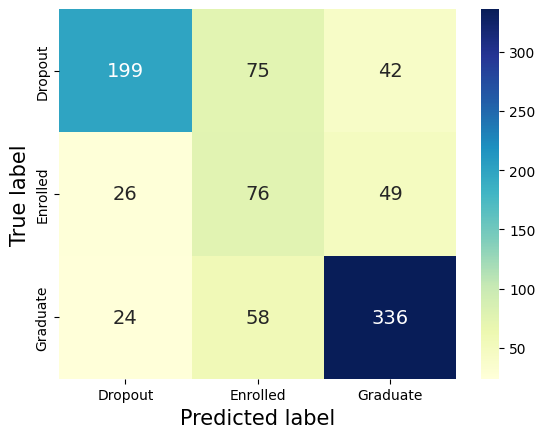

Dropout  Enrolled  Graduate
Dropout       199        75        42
Enrolled       26        76        49
Graduate       24        58       336

In [52]:
y_pred_test = log_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred_test, y_test)

## **6.2 Decision Tree**

              precision    recall  f1-score   support

     Dropout       0.73      0.58      0.65       316
    Enrolled       0.27      0.44      0.33       151
    Graduate       0.75      0.70      0.72       418

    accuracy                           0.61       885
   macro avg       0.58      0.57      0.57       885
weighted avg       0.66      0.61      0.63       885



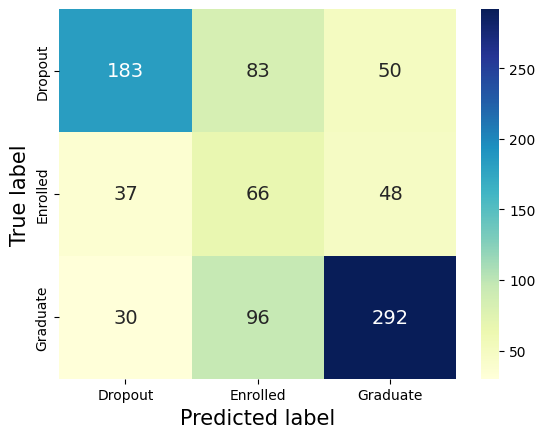

Dropout  Enrolled  Graduate
Dropout       183        83        50
Enrolled       37        66        48
Graduate       30        96       292

In [53]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred_test, y_test)

## **6.3 Random Forest**

              precision    recall  f1-score   support

     Dropout       0.83      0.59      0.69       316
    Enrolled       0.37      0.49      0.42       151
    Graduate       0.77      0.85      0.81       418

    accuracy                           0.69       885
   macro avg       0.66      0.64      0.64       885
weighted avg       0.72      0.69      0.70       885



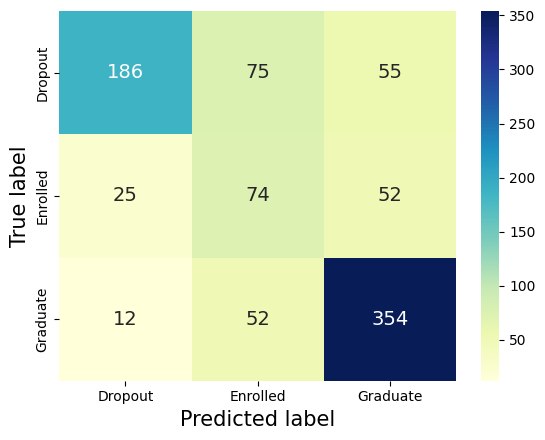

Dropout  Enrolled  Graduate
Dropout       186        75        55
Enrolled       25        74        52
Graduate       12        52       354

In [54]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred_test, y_test)

## **6.4 Gradient Boosting**

              precision    recall  f1-score   support

     Dropout       0.80      0.65      0.72       316
    Enrolled       0.44      0.31      0.36       151
    Graduate       0.74      0.92      0.82       418

    accuracy                           0.72       885
   macro avg       0.66      0.63      0.63       885
weighted avg       0.71      0.72      0.70       885



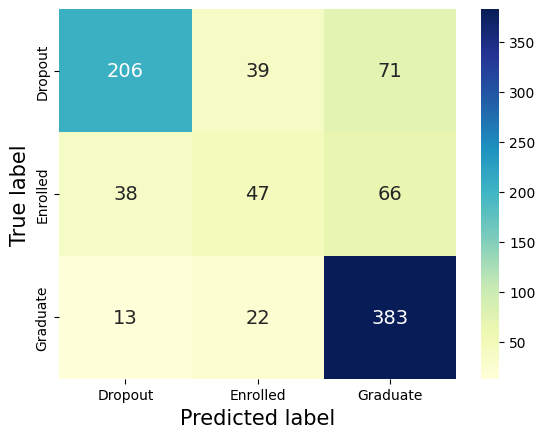

Dropout  Enrolled  Graduate
Dropout       206        39        71
Enrolled       38        47        66
Graduate       13        22       383

In [55]:
y_pred_test = gboost_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred_test, y_test)

In [56]:
def evaluate_model(model, test_df, y_test):
    y_pred = model.predict(test_df)
    accuracy = np.mean(y_pred == y_test)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    return accuracy, f1_macro

log_accuracy, log_f1_macro = evaluate_model(log_model, test_pca_df, new_y_test)

tree_accuracy, tree_f1_macro = evaluate_model(tree_model, test_pca_df, new_y_test)

rdf_accuracy, rdf_f1_macro = evaluate_model(rdf_model, test_pca_df, new_y_test)

gboost_accuracy, gboost_f1_macro = evaluate_model(gboost_model, test_pca_df, new_y_test)

model_evaluation_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_accuracy, tree_accuracy, rdf_accuracy, gboost_accuracy],
    'F1-Macro': [log_f1_macro, tree_f1_macro, rdf_f1_macro, gboost_f1_macro]
})

model_evaluation_df

Model  Accuracy  F1-Macro
0  Logistic Regression  0.690395  0.640638
1        Decision Tree  0.611299  0.567583
2        Random Forest  0.693785  0.638694
3    Gradient Boosting  0.718644  0.632863

Diketahui dari 4 model yang telah dicoba di atas, model yang terbaik adalah model *Gradient Boosting* dengan akurasi sekitar 71.86%, F1-Macro sebesasr 63.28%, dan untuk memonitor *dropout* dari mahasiswa, F1 dari model tersebut juga yang terbaik dengan F1-Score untuk label *Dropout* sebesar 72%.

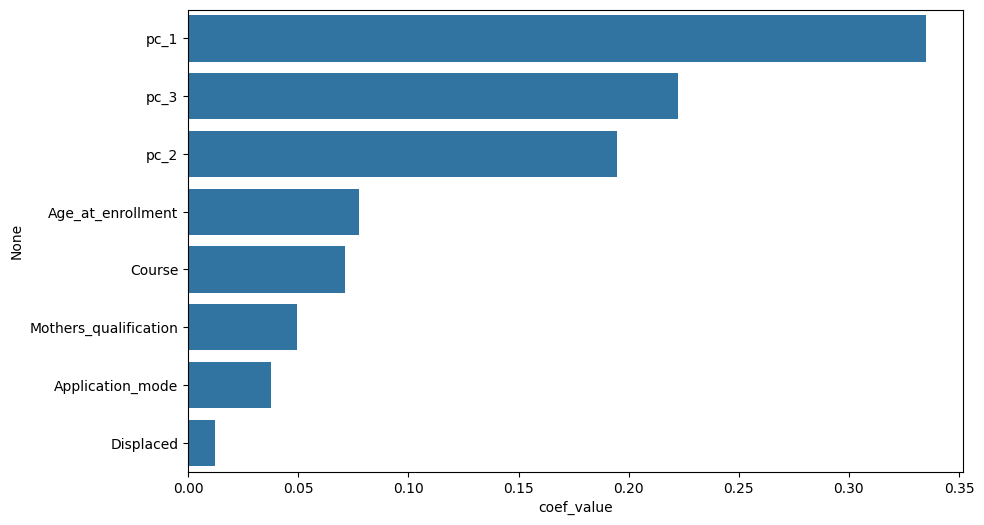

coef_value
pc_1                     0.335129
pc_3                     0.222488
pc_2                     0.194616
Age_at_enrollment        0.077655
Course                   0.071068
Mothers_qualification    0.049539
Application_mode         0.037488
Displaced                0.012016

In [57]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features
 
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features
 
plot_feature_importances(gboost_model.feature_importances_, train_pca_df.columns)

Berdasarkan visualisasi *feature importances* di atas, diketahui bahwa model *Gradient Boosting* menggunakan faktor `pc_1` sebagai fitur utama dalam menghasilkan sebuah prediksi.

# **7. KESIMPULAN**

Model *Gradient Boosting* yang saya buat berhasil memberikan prediksi yang cukup baik dalam mendeteksi mahasiswa yang kemungkinan besar akan *dropout*. Faktor terpenting dalam memonitor performa mahasiswa di Jaya Jaya Institut adalah faktor `PC1`, yang mana faktor tersebut sangat dipengaruhi oleh variabel jumlah unit kurikuler yang diambil oleh mahasiswa pada semester pertama. Hal tersebut menunjukkan bahwa mahasiswa yang mengambil lebih banyak unit kurikuler pada semester pertama cenderung memiliki performa akademik yang lebih baik dan kemungkinan lebih kecil untuk *dropout*.

# **8. REKOMENDASI *ACTION ITEMS***

1. **Peningkatan Dukungan Akademis**: Menyediakan layanan konseling akademis, tutor, dan mentor untuk membantu mahasiswa dalam mengelola beban studi mereka, khususnya pada semester pertama yang krusial.

2. **Penyesuaian Kurikulum dan Beban Studi**: Meninjau dan menyesuaikan kurikulum agar lebih fleksibel dan sesuai dengan kemampuan serta kebutuhan mahasiswa dengan mempertimbangkan beban studi yang optimal untuk mendukung kesuksesan akademis mereka.

3. **Pemantauan Berkelanjutan dan Evaluasi**: Melakukan pemantauan berkelanjutan terhadap performa akademik mahasiswa dan secara berkala mengevaluasi efektivitas intervensi yang telah dilakukan dengan tujuan untuk terus meningkatkan strategi dukungan akademis.